# *E. coli* transcriptome

In [4]:
import pandas as pd
from pathlib import Path
import re
from IPython.display import HTML


In [5]:
data_dir = Path('../data/')
ecoli_xls = data_dir/'Sastry_etal_Ecoli_transcriptome.xlsx'
ecoli_metadata = pd.read_excel(ecoli_xls, sheet_name='Metadata',index_col='Sample ID')
ecoli_metadata

,Study,Project ID,Condition ID,Replicate #,Strain Description,Strain,Base Media,Carbon Source (g/L),Nitrogen Source (g/L),Electron Acceptor,...,Culture Type,Growth Rate (1/hr),Evolved Sample,Isolate Type,Sequencing Machine,Additional Details,Biological Replicates,Alignment,DOI,GEO
Sample ID,,,,,,,,,,,,,,,,,,,,,
control__wt_glc__1,Control,control,wt_glc,1,Escherichia coli K-12 MG1655,MG1655,M9,glucose(2),NH4Cl(1),O2,...,Batch,NaN,No,NaN,MiSeq,NaN,2,94.33,doi.org/10.1101/080929,GSE65643
control__wt_glc__2,Control,control,wt_glc,2,Escherichia coli K-12 MG1655,MG1655,M9,glucose(2),NH4Cl(1),O2,...,Batch,NaN,No,NaN,MiSeq,NaN,2,94.24,doi.org/10.1101/080929,GSE65643
fur__wt_dpd__1,Fur,fur,wt_dpd,1,Escherichia coli K-12 MG1655,MG1655,M9,glucose(2),NH4Cl(1),O2,...,Batch,0.000000,No,NaN,MiSeq,NaN,2,98.04,doi.org/10.1038/ncomms5910,GSE54900
fur__wt_dpd__2,Fur,fur,wt_dpd,2,Escherichia coli K-12 MG1655,MG1655,M9,glucose(2),NH4Cl(1),O2,...,Batch,0.000000,No,NaN,MiSeq,NaN,2,98.30,doi.org/10.1038/ncomms5910,GSE54900
fur__wt_fe__1,Fur,fur,wt_fe,1,Escherichia coli K-12 MG1655,MG1655,M9,glucose(2),NH4Cl(1),O2,...,Batch,1.060606,No,NaN,MiSeq,NaN,2,93.35,doi.org/10.1038/ncomms5910,GSE54900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
efeU__menFentCubiC_ale36__2,Pseudogene Repair,efeU,menFentCubiC_ale36,2,Escherichia coli EEP_menF_entC_ubiC.36.86.1,MG1655,M9,glucose(4),NH4Cl(1),O2,...,Batch,0.580000,Endpoint,Clonal,HiSeq 4000,NaN,2,93.44,doi.org/10.1038/s41564-018-0340-2,GSE122779
efeU__menFentCubiC_ale37__1,Pseudogene Repair,efeU,menFentCubiC_ale37,1,Escherichia coli EEP_menF_entC_ubiC.37.25.1,MG1655,M9,glucose(4),NH4Cl(1),O2,...,Batch,0.460000,Endpoint,Clonal,HiSeq 4000,NaN,2,94.89,doi.org/10.1038/s41564-018-0340-2,GSE122779
efeU__menFentCubiC_ale37__2,Pseudogene Repair,efeU,menFentCubiC_ale37,2,Escherichia coli EEP_menF_entC_ubiC.37.25.1,MG1655,M9,glucose(4),NH4Cl(1),O2,...,Batch,0.460000,Endpoint,Clonal,HiSeq 4000,NaN,2,94.62,doi.org/10.1038/s41564-018-0340-2,GSE122779


In [6]:
def convert_to_upper(match_obj):
    if match_obj.group() is not None:
        return match_obj.group().upper()

upcase_re = re.compile(r'[a-z]$')

ko_re = re.compile(r'del([^_]+)')
kos = set()
for cond in ecoli_metadata['Condition ID'].values:
    m = ko_re.search(cond)
    if m:
        ko = m.group(1)
        if len(ko) == 4:
            ko = upcase_re.sub(convert_to_upper, ko)
        if len(ko) > 4:
            ko = ko[:len(ko)//2] + ' // ' + ko[len(ko)//2:]
        kos.add(ko)
print('\n'.join(sorted(kos)))



ar1
ar1 // ar2
ar2
cbl
cra
crp
fabR
fadR
fur
gadE
gadW
gadX
menF // entC
mntR
nac
ompR
oxyR
pgi
purR
soxR
soxS
yafC
ybaO
ybaQ
ybiH
ydcI
yddM
yeiE
yheO
yiaJ
yieP


In [7]:
upcase_re = re.compile('[A-Z]')
regulators = [ str(regulator) for regulator in pd.read_csv(data_dir / 'KO-regulators.txt', sep='\t').KOs.values if upcase_re.search(str(regulator))]
print("'({})".format(" ".join(regulators)))

'(EG10359 EG12243 EG12242 EG11544 EG10681 EG10957 EG10958 G7072 G7071 EG11394 EG10281 EG10672 EG10338 G6420 G7072 EG10164 EG10702 EG10800 EG11649 EG12105 EG12278 EG11733 G6247 G6259 EG12406 G6737 G6774 G7715 EG12362 // EG10261)


# Falsification

In [8]:
from y0.algorithm import falsification
from y0.graph import ADMG, NxMixedGraph

import networkx as nx
import pandas as pd

import seaborn as sns
from itertools import chain
from tqdm import tqdm
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [9]:
from scipy.stats import zscore

ecoli_rna = pd.read_excel(ecoli_xls, sheet_name='Expression Data',index_col='log-TPM')
ecoli_rna

,control__wt_glc__1,control__wt_glc__2,fur__wt_dpd__1,fur__wt_dpd__2,fur__wt_fe__1,fur__wt_fe__2,fur__delfur_dpd__1,fur__delfur_dpd__2,fur__delfur_fe2__1,fur__delfur_fe2__2,...,efeU__menFentC_ale29__1,efeU__menFentC_ale29__2,efeU__menFentC_ale30__1,efeU__menFentC_ale30__2,efeU__menFentCubiC_ale36__1,efeU__menFentCubiC_ale36__2,efeU__menFentCubiC_ale37__1,efeU__menFentCubiC_ale37__2,efeU__menFentCubiC_ale38__1,efeU__menFentCubiC_ale38__2
log-TPM,,,,,,,,,,,,,,,,,,,,,
b0002,11.006653,11.130196,11.704951,11.888217,11.064810,10.779071,9.976401,10.291135,11.229767,11.214065,...,10.271327,10.276565,11.148538,11.170578,11.676604,11.726097,11.881529,11.923237,11.496410,11.552762
b0003,10.415654,10.523138,11.423835,11.803781,10.776984,10.597810,9.596833,10.191503,10.897938,10.861157,...,10.160291,10.116861,10.314322,10.392251,10.916426,10.909277,11.023924,11.038426,10.624301,10.764195
b0004,10.594871,10.725062,10.457270,10.779162,10.394971,10.113950,8.741617,9.082231,10.185151,10.164655,...,10.475069,10.434352,10.679541,10.723953,11.143310,11.112721,11.184795,11.241845,10.953206,11.001006
b0005,6.316102,6.258499,5.422129,5.336121,6.716069,6.410864,4.626949,4.756153,6.527653,6.136168,...,5.979079,5.705586,6.306120,6.291340,5.058537,4.835550,5.448097,5.757951,5.873964,5.808618
b0006,6.915771,6.897597,6.775645,6.782605,6.761813,6.816532,6.686767,6.860036,6.862147,6.817480,...,8.371287,8.322390,8.137515,8.071837,7.354131,7.365536,7.328101,7.314761,8.057750,8.105213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b4688,2.473165,2.995816,1.308909,0.000000,2.916383,3.248885,0.790543,0.741789,2.800527,2.039165,...,1.849193,2.272005,0.000000,1.283342,1.355421,1.167070,1.734880,1.007913,0.000000,1.545422
b4693,0.868914,1.426733,2.509185,2.168134,1.755932,2.136364,3.706239,3.290548,4.268691,4.252711,...,0.772861,2.004397,0.000000,0.333735,3.202295,3.001444,3.105540,3.091406,3.380939,3.171579
b4696_1,2.646501,2.545448,3.762411,3.639348,2.064534,2.014348,3.510030,3.327140,2.468705,2.431928,...,2.857578,2.874401,2.797063,2.578195,2.734153,2.718261,3.100377,3.021188,3.225358,3.401920


In [10]:
ecoli_zscore = ecoli_rna.T.apply(zscore).T
ecoli_zscore

,control__wt_glc__1,control__wt_glc__2,fur__wt_dpd__1,fur__wt_dpd__2,fur__wt_fe__1,fur__wt_fe__2,fur__delfur_dpd__1,fur__delfur_dpd__2,fur__delfur_fe2__1,fur__delfur_fe2__2,...,efeU__menFentC_ale29__1,efeU__menFentC_ale29__2,efeU__menFentC_ale30__1,efeU__menFentC_ale30__2,efeU__menFentCubiC_ale36__1,efeU__menFentCubiC_ale36__2,efeU__menFentCubiC_ale37__1,efeU__menFentCubiC_ale37__2,efeU__menFentCubiC_ale38__1,efeU__menFentCubiC_ale38__2
log-TPM,,,,,,,,,,,,,,,,,,,,,
b0002,0.513433,0.589136,0.941325,1.053623,0.549070,0.373980,-0.117867,0.074991,0.650149,0.640528,...,0.062853,0.066063,0.600375,0.613880,0.923955,0.954282,1.049525,1.075082,0.813539,0.848069
b0003,0.541289,0.652554,1.584941,1.978255,0.915331,0.729854,-0.306342,0.309251,1.040541,1.002466,...,0.276941,0.231983,0.436391,0.517063,1.059680,1.052279,1.170959,1.185972,0.757276,0.902093
b0004,0.697023,0.826063,0.560639,0.879684,0.498891,0.220355,-1.139842,-0.802241,0.290927,0.270611,...,0.578280,0.537924,0.780945,0.824964,1.240612,1.210293,1.281730,1.338276,1.052189,1.099567
b0005,0.975271,0.915895,0.053786,-0.034869,1.387548,1.072950,-0.765865,-0.632685,1.193333,0.789800,...,0.627876,0.345967,0.964982,0.949747,-0.320995,-0.550844,0.080553,0.399944,0.519527,0.452170
b0006,0.094158,0.046722,-0.271596,-0.253429,-0.307698,-0.164873,-0.503584,-0.051320,-0.045810,-0.162398,...,3.893320,3.765690,3.283131,3.111702,1.238358,1.268126,1.170416,1.135596,3.074932,3.198818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b4688,0.403624,0.742023,-0.350191,-1.197664,0.690593,0.905877,-0.685815,-0.717381,0.615580,0.122625,...,-0.000375,0.273381,-1.197664,-0.366744,-0.320076,-0.442027,-0.074389,-0.545075,-1.197664,-0.197057
b4693,-1.333043,-0.703070,0.519400,0.134233,-0.331289,0.098354,1.871295,1.401833,2.506500,2.488453,...,-1.441521,-0.050683,-2.314353,-1.937449,1.302164,1.075332,1.192894,1.176931,1.503916,1.267475
b4696_1,-0.401654,-0.573017,1.490680,1.281993,-1.388540,-1.473643,1.062698,0.752558,-0.703155,-0.765521,...,-0.043714,-0.015187,-0.146333,-0.517486,-0.253015,-0.279964,0.368019,0.233732,0.579958,0.879368


In [11]:
import numpy as np
ecoli_ternary = pd.DataFrame(0.0, columns = ecoli_zscore.columns, index= ecoli_zscore.index)


ecoli_ternary[ecoli_zscore < -1.96] = -1
ecoli_ternary[ecoli_zscore > 1.96] = 1
ecoli_ternary

,control__wt_glc__1,control__wt_glc__2,fur__wt_dpd__1,fur__wt_dpd__2,fur__wt_fe__1,fur__wt_fe__2,fur__delfur_dpd__1,fur__delfur_dpd__2,fur__delfur_fe2__1,fur__delfur_fe2__2,...,efeU__menFentC_ale29__1,efeU__menFentC_ale29__2,efeU__menFentC_ale30__1,efeU__menFentC_ale30__2,efeU__menFentCubiC_ale36__1,efeU__menFentCubiC_ale36__2,efeU__menFentCubiC_ale37__1,efeU__menFentCubiC_ale37__2,efeU__menFentCubiC_ale38__1,efeU__menFentCubiC_ale38__2
log-TPM,,,,,,,,,,,,,,,,,,,,,
b0002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
b0003,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
b0004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
b0005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
b0006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b4688,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
b4693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
b4696_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
ecoli_zscore > 1.96

,control__wt_glc__1,control__wt_glc__2,fur__wt_dpd__1,fur__wt_dpd__2,fur__wt_fe__1,fur__wt_fe__2,fur__delfur_dpd__1,fur__delfur_dpd__2,fur__delfur_fe2__1,fur__delfur_fe2__2,...,efeU__menFentC_ale29__1,efeU__menFentC_ale29__2,efeU__menFentC_ale30__1,efeU__menFentC_ale30__2,efeU__menFentCubiC_ale36__1,efeU__menFentCubiC_ale36__2,efeU__menFentCubiC_ale37__1,efeU__menFentCubiC_ale37__2,efeU__menFentCubiC_ale38__1,efeU__menFentCubiC_ale38__2
log-TPM,,,,,,,,,,,,,,,,,,,,,
b0002,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
b0003,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
b0004,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
b0005,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
b0006,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b4688,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
b4693,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
b4696_1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:

def process_multi_entry_file(file, multi_entries = None, multi_sep = ' // ', sep='\t'):
    df = pd.read_csv(file, sep=sep).dropna()
    if len(df.index) > 0:
        if multi_entries:
            for multi in multi_entries:
                df[multi] = df[multi].str.split(multi_sep)
                df = df.explode(multi)
    return df.reset_index(drop=True)

# Napkin

## Napkin motifs

In [14]:
napkin_genes = {}
for napkin_file in data_dir.glob('*-napkin.tab'):
    napkin_genes[napkin_file.stem.split('-')[0]] = process_multi_entry_file( napkin_file, multi_entries = ['V'])
HTML(napkin_genes['cra'].to_html())

,R,U,V,W,X,Y
0,b0399,b3868,b1334,b1988,b0080,b0734
1,b0399,b3868,b1334,b1988,b0080,b0733
2,b0399,b3868,b1334,b1988,b0080,b0871
3,b0399,b3868,b0683,b1988,b0080,b1852
4,b0399,b3868,b1334,b1988,b0080,b1852
5,b0399,b3868,b0683,b1988,b0080,b0428
6,b0399,b3868,b1334,b1988,b0080,b0428
7,b0399,b3868,b0683,b1988,b0080,b0429
8,b0399,b3868,b1334,b1988,b0080,b0429
9,b0399,b3868,b0683,b1988,b0080,b0430


## Graph

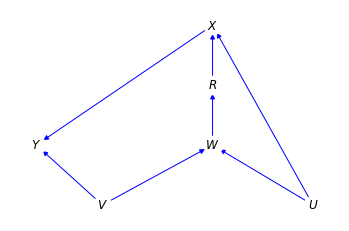

In [15]:
napkin_g = NxMixedGraph.from_edges(directed=[('X', 'Y'), ('R', 'X'),('W', 'R'), ('U', 'W'), ('U', 'X'), ('V', 'W'), ('V', 'Y')])
napkin_g.draw()

In [16]:
napkin_genes['cra'].loc[0]

R    b0399
U    b3868
V    b1334
W    b1988
X    b0080
Y    b0734
Name: 0, dtype: object

In [17]:
def map_genes_to_nodes(node_to_genes, expression_df):
    if len(set(node_to_genes.values) - set(expression_df.index)) > 0:
        raise KeyError
    return expression_df.loc[node_to_genes.values].T.rename(columns=dict(map(reversed, node_to_genes.to_dict().items()))).reset_index()

## Falsify Napkin genes

In [18]:
napkin_data = {}
issues = {}
for gene in napkin_genes:
    issues[gene] = {}
    napkin_data[gene] = {}
    print(f"{len(napkin_genes[gene].index)} motifs with {gene}")
    for i in napkin_genes[gene].index:
        try:
            napkin_data[gene][i] = map_genes_to_nodes(napkin_genes[gene].loc[i], ecoli_ternary)
            issues[gene][i] = falsification.falsifications(napkin_g, napkin_data[gene][i], max_given=2, verbose=True)
        except KeyError:
            pass
    

yieP
fadR
single
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
2

d-separation check: 15it [00:00, 444.34it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 220.52it/s]
d-separation check: 0it [00:00, ?it/s]


326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
yddM
ydcI
0
1
2
3
fabR
mntR
0


d-separation check: 15it [00:00, 429.85it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 177.78it/s]
d-separation check: 15it [00:00, 460.15it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 189.75it/s]
d-separation check: 15it [00:00, 455.95it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 184.39it/s]
d-separation check: 15it [00:00, 459.31it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 190.30it/s]
d-separation check: 15it [00:00, 423.01it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

1
2
3
4
5
6
7
8
9
10
11


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 166.09it/s]
d-separation check: 15it [00:00, 421.21it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 171.37it/s]
d-separation check: 15it [00:00, 459.37it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 170.82it/s]
d-separation check: 15it [00:00, 410.00it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 180.09it/s]
d-separation check: 0it [00:00, ?it/s]

12
13
14
menF
gadE
0


d-separation check: 15it [00:00, 443.81it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 169.64it/s]
d-separation check: 15it [00:00, 445.33it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 199.66it/s]
d-separation check: 15it [00:00, 440.35it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 191.80it/s]
d-separation check: 15it [00:00, 412.25it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 176.97it/s]
d-separation check: 15it [00:00, 463.22it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

1
2
3
4


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 161.85it/s]
d-separation check: 15it [00:00, 459.11it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 146.91it/s]
d-separation check: 15it [00:00, 436.02it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 168.36it/s]
d-separation check: 15it [00:00, 401.80it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 155.29it/s]
d-separation check: 0it [00:00, ?it/s]

5
6
7
8


d-separation check: 15it [00:00, 435.87it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 180.58it/s]
d-separation check: 15it [00:00, 444.06it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 202.51it/s]
d-separation check: 15it [00:00, 429.53it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 190.17it/s]
d-separation check: 15it [00:00, 424.64it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 180.87it/s]
d-separation check: 15it [00:00, 440.55it/s]

9
10
11
12



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 237.41it/s]
d-separation check: 15it [00:00, 433.75it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 227.86it/s]
d-separation check: 15it [00:00, 453.67it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 253.55it/s]
d-separation check: 15it [00:00, 460.86it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 264.88it/s]
d-separation check: 15it [00:00, 467.94it/s]

13
14
15
16



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 246.71it/s]
d-separation check: 15it [00:00, 464.98it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 267.22it/s]
d-separation check: 15it [00:00, 470.97it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 214.64it/s]
d-separation check: 15it [00:00, 160.95it/s]

17
18
19
20



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 183.72it/s]
d-separation check: 15it [00:00, 430.82it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 184.39it/s]
d-separation check: 15it [00:00, 418.43it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 181.95it/s]
d-separation check: 15it [00:00, 424.50it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 183.91it/s]
d-separation check: 15it [00:00, 424.34it/s]

21
22
23
24



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 180.77it/s]
d-separation check: 15it [00:00, 421.29it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 139.06it/s]
d-separation check: 15it [00:00, 402.42it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 168.28it/s]
d-separation check: 15it [00:00, 418.16it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 184.00it/s]
d-separation check: 0it [00:00, ?it/s]

25
26
27
28


d-separation check: 15it [00:00, 439.17it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 190.44it/s]
d-separation check: 15it [00:00, 440.26it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 190.52it/s]
d-separation check: 15it [00:00, 434.72it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 183.35it/s]
d-separation check: 15it [00:00, 420.25it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 253.57it/s]
d-separation check: 15it [00:00, 418.23it/s]

29
30
31
32



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 228.21it/s]
d-separation check: 15it [00:00, 407.07it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 227.31it/s]
d-separation check: 15it [00:00, 423.51it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 224.90it/s]
d-separation check: 15it [00:00, 424.99it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 251.63it/s]
d-separation check: 15it [00:00, 429.16it/s]

33
34
35
36



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 234.34it/s]
d-separation check: 15it [00:00, 412.19it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 231.85it/s]
d-separation check: 15it [00:00, 432.11it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 242.83it/s]
d-separation check: 15it [00:00, 435.38it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 250.94it/s]
d-separation check: 15it [00:00, 430.35it/s]

37
38
39
40



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 225.99it/s]
d-separation check: 15it [00:00, 437.69it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 256.47it/s]
d-separation check: 15it [00:00, 432.37it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 238.36it/s]
d-separation check: 15it [00:00, 420.84it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 247.17it/s]
d-separation check: 15it [00:00, 447.25it/s]

41
42
43
44



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 245.56it/s]
d-separation check: 15it [00:00, 454.16it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 267.86it/s]
d-separation check: 15it [00:00, 455.57it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 239.16it/s]
d-separation check: 15it [00:00, 448.44it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 257.22it/s]
d-separation check: 15it [00:00, 457.26it/s]

45
46
47
48
49
50



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 273.98it/s]
d-separation check: 15it [00:00, 461.82it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 269.78it/s]
d-separation check: 15it [00:00, 454.44it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 247.28it/s]
d-separation check: 15it [00:00, 465.13it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 224.65it/s]
d-separation check: 15it [00:00, 443.75it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

51
52
53
54


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 233.83it/s]
d-separation check: 15it [00:00, 448.15it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 250.38it/s]
d-separation check: 15it [00:00, 451.33it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 252.74it/s]
d-separation check: 15it [00:00, 439.62it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 257.60it/s]
d-separation check: 15it [00:00, 467.58it/s]

55
56
57
58



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 230.76it/s]
d-separation check: 15it [00:00, 459.43it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 273.82it/s]
d-separation check: 15it [00:00, 460.76it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 267.52it/s]
d-separation check: 15it [00:00, 462.32it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 238.04it/s]
d-separation check: 15it [00:00, 467.80it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 275.53it/s]

59
60
61
62



d-separation check: 15it [00:00, 428.05it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 247.97it/s]
d-separation check: 15it [00:00, 458.74it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 253.74it/s]
d-separation check: 15it [00:00, 452.08it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 249.05it/s]
d-separation check: 15it [00:00, 437.09it/s]

63
64
65
66



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 258.98it/s]
d-separation check: 15it [00:00, 461.75it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 254.07it/s]
d-separation check: 15it [00:00, 472.36it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 263.66it/s]
d-separation check: 15it [00:00, 477.07it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 264.20it/s]
d-separation check: 15it [00:00, 452.28it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

67
68
69
70


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 253.32it/s]
d-separation check: 15it [00:00, 465.48it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 266.48it/s]
d-separation check: 15it [00:00, 485.14it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 269.90it/s]
d-separation check: 15it [00:00, 452.38it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 240.50it/s]
d-separation check: 15it [00:00, 461.19it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

71
72
73
74


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 287.11it/s]
d-separation check: 15it [00:00, 454.32it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 238.30it/s]
d-separation check: 15it [00:00, 447.60it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 238.68it/s]
d-separation check: 15it [00:00, 447.05it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 264.20it/s]
d-separation check: 15it [00:00, 446.63it/s]

75
76
77
78



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 248.58it/s]
d-separation check: 15it [00:00, 458.15it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 242.92it/s]
d-separation check: 15it [00:00, 415.50it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 256.58it/s]
d-separation check: 15it [00:00, 457.92it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 259.40it/s]
d-separation check: 15it [00:00, 436.63it/s]

79
80
81
82



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 222.80it/s]
d-separation check: 15it [00:00, 448.84it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 257.78it/s]
d-separation check: 15it [00:00, 484.87it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 253.31it/s]
d-separation check: 15it [00:00, 470.01it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 274.70it/s]
d-separation check: 15it [00:00, 468.12it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

83
84
85
86


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 259.52it/s]
d-separation check: 15it [00:00, 455.24it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 246.79it/s]
d-separation check: 15it [00:00, 453.68it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 269.64it/s]
d-separation check: 15it [00:00, 468.67it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 236.09it/s]
d-separation check: 15it [00:00, 460.84it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

87
88
89
90


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 257.76it/s]
d-separation check: 15it [00:00, 480.72it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 258.01it/s]
d-separation check: 15it [00:00, 449.77it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 282.91it/s]
d-separation check: 15it [00:00, 493.39it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 278.76it/s]
d-separation check: 15it [00:00, 480.03it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 273.80it/s]

91
92
93
94



d-separation check: 15it [00:00, 490.69it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 293.75it/s]
d-separation check: 15it [00:00, 480.08it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 270.32it/s]
d-separation check: 15it [00:00, 491.97it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 276.64it/s]
d-separation check: 15it [00:00, 482.38it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 286.76it/s]
d-separation check: 0it [00:00, ?it/s]

95
96
97
98
99


d-separation check: 15it [00:00, 497.29it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 261.46it/s]
d-separation check: 15it [00:00, 509.79it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 273.32it/s]
d-separation check: 15it [00:00, 496.83it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 281.06it/s]
d-separation check: 15it [00:00, 510.38it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 285.61it/s]
d-separation check: 15it [00:00, 506.86it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 269.86it/s]
d-separation check: 0it [00:00, ?it/s]

100
101
102
103
104


d-separation check: 15it [00:00, 514.87it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 250.27it/s]
d-separation check: 15it [00:00, 508.85it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 299.52it/s]
d-separation check: 15it [00:00, 518.33it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 275.77it/s]
d-separation check: 15it [00:00, 492.87it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 302.52it/s]
d-separation check: 15it [00:00, 512.12it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 303.06it/s]
d-separation check: 0it [00:00, ?it/s]

105
106
107
108
109


d-separation check: 15it [00:00, 511.14it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 261.01it/s]
d-separation check: 15it [00:00, 510.27it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 285.66it/s]
d-separation check: 15it [00:00, 518.93it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 238.17it/s]
d-separation check: 15it [00:00, 483.21it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 296.74it/s]
d-separation check: 15it [00:00, 493.22it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 226.26it/s]
d-separation check: 0it [00:00, ?it/s]

110
111
112
113
114


d-separation check: 15it [00:00, 478.01it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 251.19it/s]
d-separation check: 15it [00:00, 519.99it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 320.82it/s]
d-separation check: 15it [00:00, 523.69it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 276.45it/s]
d-separation check: 15it [00:00, 497.08it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 271.52it/s]
d-separation check: 15it [00:00, 503.40it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 258.35it/s]
d-separation check: 0it [00:00, ?it/s]

115
116
117
118
119


d-separation check: 15it [00:00, 515.46it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 243.87it/s]
d-separation check: 15it [00:00, 480.28it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 245.44it/s]
d-separation check: 15it [00:00, 464.00it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 248.86it/s]
d-separation check: 15it [00:00, 464.57it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 272.85it/s]
d-separation check: 15it [00:00, 484.28it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

120
121
122
123


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 261.98it/s]
d-separation check: 15it [00:00, 467.78it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 274.98it/s]
d-separation check: 15it [00:00, 481.11it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 240.46it/s]
d-separation check: 15it [00:00, 470.19it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 276.91it/s]
d-separation check: 15it [00:00, 448.95it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 247.58it/s]

124
125
126
127



d-separation check: 15it [00:00, 467.05it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 294.90it/s]
d-separation check: 15it [00:00, 512.25it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 259.15it/s]
d-separation check: 15it [00:00, 498.34it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 265.39it/s]
d-separation check: 15it [00:00, 468.97it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 256.45it/s]


128
129
130
131
132

d-separation check: 15it [00:00, 463.09it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 270.08it/s]
d-separation check: 15it [00:00, 471.19it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 276.92it/s]
d-separation check: 15it [00:00, 474.13it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 281.11it/s]
d-separation check: 15it [00:00, 482.54it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 284.66it/s]
d-separation check: 15it [00:00, 482.02it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 265.62it/s]


133
134
135
136
137


d-separation check: 15it [00:00, 475.36it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 274.29it/s]
d-separation check: 15it [00:00, 174.38it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 241.14it/s]
d-separation check: 15it [00:00, 439.52it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 238.51it/s]
d-separation check: 15it [00:00, 464.93it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]


138
139
140


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 258.77it/s]
d-separation check: 15it [00:00, 480.37it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 255.27it/s]
d-separation check: 15it [00:00, 487.85it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 290.62it/s]
d-separation check: 15it [00:00, 515.94it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 294.87it/s]
d-separation check: 15it [00:00, 508.11it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 294.90it/s]
d-separation check: 0it [00:00, ?it/s]

141
142
143
144
145


d-separation check: 15it [00:00, 516.45it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 298.65it/s]
d-separation check: 15it [00:00, 506.44it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 279.93it/s]
d-separation check: 15it [00:00, 539.63it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 303.55it/s]
d-separation check: 15it [00:00, 510.88it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 260.42it/s]
d-separation check: 15it [00:00, 535.81it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 298.35it/s]
d-separation check: 15it [00:00, 512.77it/s]

146
147
148
149
150



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 290.84it/s]
d-separation check: 15it [00:00, 534.70it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 295.13it/s]
d-separation check: 15it [00:00, 569.17it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 280.52it/s]
d-separation check: 15it [00:00, 511.77it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 269.06it/s]
d-separation check: 15it [00:00, 479.80it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 283.61it/s]
d-separation check: 15it [00:00, 492.45it/s]

151
152
153
154
155



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 244.60it/s]
d-separation check: 15it [00:00, 464.17it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 248.63it/s]
d-separation check: 15it [00:00, 515.43it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 325.17it/s]
d-separation check: 15it [00:00, 528.07it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 307.57it/s]
d-separation check: 15it [00:00, 527.67it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 275.56it/s]

156
157
158
159



d-separation check: 15it [00:00, 560.00it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 252.02it/s]
d-separation check: 15it [00:00, 504.75it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 294.87it/s]
d-separation check: 15it [00:00, 517.89it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 318.98it/s]
d-separation check: 15it [00:00, 504.34it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 313.16it/s]
d-separation check: 15it [00:00, 514.07it/s]

160
161
162
163
164



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 239.29it/s]
d-separation check: 15it [00:00, 480.15it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 288.93it/s]
d-separation check: 15it [00:00, 520.65it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 333.97it/s]
d-separation check: 15it [00:00, 531.95it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 230.77it/s]
d-separation check: 15it [00:00, 518.19it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 245.16it/s]
d-separation check: 15it [00:00, 483.96it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

165
166
167
168
169


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 269.90it/s]
d-separation check: 15it [00:00, 459.42it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 221.78it/s]
d-separation check: 15it [00:00, 535.39it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 168.08it/s]
d-separation check: 15it [00:00, 493.73it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 233.64it/s]
d-separation check: 15it [00:00, 530.84it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

170
171
172
173


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 195.67it/s]
d-separation check: 15it [00:00, 482.79it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 190.90it/s]
d-separation check: 15it [00:00, 497.00it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 192.75it/s]
d-separation check: 15it [00:00, 532.22it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 312.74it/s]
d-separation check: 15it [00:00, 509.36it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

174
175
176
177


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 232.81it/s]
d-separation check: 15it [00:00, 502.82it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 274.45it/s]
d-separation check: 15it [00:00, 532.11it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 309.50it/s]
d-separation check: 15it [00:00, 562.66it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 311.69it/s]
d-separation check: 15it [00:00, 593.31it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 308.44it/s]
d-separation check: 15it [00:00, 591.07it/s]

178
179
180
181
182



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 307.44it/s]
d-separation check: 15it [00:00, 583.68it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 317.29it/s]
d-separation check: 15it [00:00, 619.07it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 272.10it/s]
d-separation check: 15it [00:00, 558.06it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 307.63it/s]
d-separation check: 15it [00:00, 543.91it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 294.47it/s]
d-separation check: 15it [00:00, 547.41it/s]

183
184
185
186
187



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 317.18it/s]
d-separation check: 15it [00:00, 538.10it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 288.57it/s]
d-separation check: 15it [00:00, 533.68it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 266.88it/s]
d-separation check: 15it [00:00, 522.91it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 273.30it/s]
d-separation check: 15it [00:00, 517.82it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 286.04it/s]
d-separation check: 15it [00:00, 519.80it/s]

188
189
190
191
192



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 270.83it/s]
d-separation check: 15it [00:00, 516.83it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 290.93it/s]
d-separation check: 15it [00:00, 541.16it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 298.65it/s]
d-separation check: 15it [00:00, 524.18it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 308.46it/s]
d-separation check: 15it [00:00, 515.68it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 266.05it/s]
d-separation check: 15it [00:00, 531.84it/s]

193
194
195
196
197



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 269.81it/s]
d-separation check: 15it [00:00, 508.73it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 283.74it/s]
d-separation check: 15it [00:00, 533.11it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 227.93it/s]
d-separation check: 15it [00:00, 521.37it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 225.97it/s]
d-separation check: 15it [00:00, 520.27it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 223.97it/s]

198
199
200
201
202
203
204
205
206
207
208
209
210
211
212



d-separation check: 15it [00:00, 530.30it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 236.95it/s]
d-separation check: 15it [00:00, 516.73it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 224.51it/s]
d-separation check: 15it [00:00, 519.84it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 240.34it/s]
d-separation check: 15it [00:00, 531.18it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 233.01it/s]
d-separation check: 0it [00:00, ?it/s]

213
214
215
216
217


d-separation check: 15it [00:00, 524.52it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 219.24it/s]
d-separation check: 15it [00:00, 517.31it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 232.48it/s]
d-separation check: 15it [00:00, 539.90it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 231.97it/s]
d-separation check: 15it [00:00, 526.59it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 244.54it/s]
d-separation check: 15it [00:00, 523.52it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 243.96it/s]
d-separation check: 0it [00:00, ?it/s]

218
219
220
221
222


d-separation check: 15it [00:00, 539.77it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 247.51it/s]
d-separation check: 15it [00:00, 555.78it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 234.94it/s]
d-separation check: 15it [00:00, 573.92it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 252.85it/s]
d-separation check: 15it [00:00, 583.90it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 232.90it/s]
d-separation check: 15it [00:00, 581.87it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 237.04it/s]
d-separation check: 15it [00:00, 439.10it/s]

223
224
225
226
227



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 189.00it/s]
d-separation check: 15it [00:00, 532.08it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 247.96it/s]
d-separation check: 15it [00:00, 521.72it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 231.13it/s]
d-separation check: 15it [00:00, 524.68it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 223.01it/s]
d-separation check: 15it [00:00, 532.26it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 246.04it/s]
d-separation check: 0it [00:00, ?it/s]

228
229
230
231
232
233
234
235
236
237
238
239
240
241


d-separation check: 15it [00:00, 528.71it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 232.45it/s]
d-separation check: 15it [00:00, 520.47it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 230.59it/s]
d-separation check: 15it [00:00, 519.14it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 219.41it/s]
d-separation check: 15it [00:00, 527.22it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 542.58it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 556.15it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

242
243
244
245
246
247



d-separation check: 15it [00:00, 531.38it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 548.81it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 552.44it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 554.10it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 531.22it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 540.33it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 0it [00:00, ?it/s]

248
249
250
251
252
253
254
255


d-separation check: 15it [00:00, 544.51it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 537.92it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 546.31it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 545.51it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 525.58it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 542.09it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 537.60it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 0it [00:00, ?it/s]

256
257
258
259
260
261
262


d-separation check: 15it [00:00, 541.28it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 513.93it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 505.79it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 552.65it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 552.83it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 550.72it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 562.71it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

263
264
265
266
267
268


Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 539.53it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 544.40it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 574.98it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 603.55it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 599.42it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 607.64it/s]

269
270
271
272
273
274



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 566.25it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 593.25it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 587.93it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 527.50it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 524.84it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 560.69it/s]

275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 505.80it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 484.20it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 484.12it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 471.27it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 490.34it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 486.38it/s]

312
313
314
315
316
317



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 481.47it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 478.22it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 492.05it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 495.31it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 485.47it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 481.26it/s]

318
319
320
321
322
323



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 486.66it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 478.83it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 488.24it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 484.60it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 483.47it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 489.96it/s]

324
325
326
327
328
329



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 478.62it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 493.76it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 490.24it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 162.69it/s]

330
331
332
333



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 431.63it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 446.71it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 470.75it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 486.54it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 483.82it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 0it [00:00, ?it/s]

334
335
336
337
338
339


d-separation check: 15it [00:00, 467.72it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 488.49it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 499.12it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 491.85it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 537.73it/s]

340
341
342
343



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 580.45it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 568.62it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 585.48it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 533.09it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 550.76it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 528.23it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 528.32it/s]

344
345
346
347
348
349
350



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 511.00it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 512.63it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 543.36it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 529.74it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 541.50it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 532.40it/s]

351
352
353
354
355
356



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 529.92it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 541.99it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 535.68it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 565.48it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 535.10it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 511.56it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 0it [00:00, ?it/s]

357
358
359
360
361
362
363


d-separation check: 15it [00:00, 513.19it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 536.85it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 543.54it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 511.09it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 529.46it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 540.00it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 535.47it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

364
365
366
367
368
369


Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 545.67it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 543.19it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 505.95it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 508.03it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 531.55it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 535.58it/s]

370
371
372
373
374
375



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 515.84it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 531.26it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 504.80it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 537.41it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 532.37it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 510.81it/s]

376
377
378
379
380
381



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 495.36it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 476.52it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 500.20it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 487.49it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 496.82it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 509.20it/s]

382
383
384
385
386
387



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 543.67it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 506.67it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 506.00it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 498.42it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 493.32it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 458.71it/s]

388
389
390
391
392
393



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 448.66it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 446.97it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 432.41it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 410.13it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 449.63it/s]

394
395
396
397
398



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 413.17it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 443.91it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 435.72it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 461.24it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 445.58it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

399
400
401
402
403



d-separation check: 15it [00:00, 444.58it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 434.77it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 449.05it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 437.36it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 419.64it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

404
405
406
407
408


Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 431.43it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 438.69it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 438.35it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 434.44it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 439.37it/s]

409
410
411
412
413



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 448.09it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 457.78it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 444.54it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 427.47it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 480.46it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 0it [00:00, ?it/s]

414
415
416
417
418
419


d-separation check: 15it [00:00, 457.16it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 504.54it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 482.11it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 489.79it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 501.10it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 509.48it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 514.15it/s]

420
421
422
423
424
425
426



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 508.66it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 495.07it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 492.27it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 501.52it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 502.53it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 489.79it/s]

427
428
429
430
431
432



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 494.36it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 468.41it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 491.35it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 496.56it/s]

433
434
435
436



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 485.42it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 488.62it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 510.71it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 497.63it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 489.97it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 497.83it/s]

437
438
439
440
441
442



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 509.89it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 521.74it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 435.16it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 408.29it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 448.16it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 0it [00:00, ?it/s]

443
444
445
446
447
448
449


d-separation check: 15it [00:00, 479.49it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 465.91it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 495.80it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 479.65it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 447.13it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 456.24it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 446.75it/s]

450
451
452
453
454
455



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 376.75it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 443.88it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 454.61it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 462.00it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 440.87it/s]

456
457
458
459
460



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 295.22it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 424.89it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 429.38it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 463.45it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 486.35it/s]

461
462
463
464
465



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 467.93it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 451.64it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 424.92it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 440.88it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 441.47it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 0it [00:00, ?it/s]

466
467
468
469
470
471


d-separation check: 15it [00:00, 463.01it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 449.96it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 462.66it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 413.92it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 432.84it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 443.42it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

472
473
474
475
476


Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 428.41it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 446.48it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 456.83it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 469.82it/s]

477
478
479
480



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 433.94it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 468.78it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 477.28it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 479.71it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 491.35it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 482.97it/s]

481
482
483
484
485
486



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 496.52it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 493.33it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 486.65it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 487.93it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 488.30it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 469.57it/s]

487
488
489
490
491
492



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 462.91it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 495.38it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 487.54it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 490.86it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 498.87it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 506.79it/s]

493
494
495
496
497
498



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 501.26it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 494.98it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 505.37it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 488.27it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 477.57it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 456.22it/s]

499
500
501
502
503
504



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 472.54it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 481.76it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 485.82it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 475.24it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 476.82it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 488.23it/s]

505
506
507
508
509
510



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 485.85it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 484.85it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 492.77it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 492.14it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 485.47it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 484.85it/s]

511
512
513
514
515
516



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 506.74it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 487.20it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 487.88it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 476.20it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 490.71it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 477.27it/s]

517
518
519
520
521
522



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 480.36it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 505.41it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 494.54it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 496.46it/s]

523
524
525
526



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 469.95it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 465.05it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 486.54it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 0it [00:00, ?it/s]

527
528
529
530


d-separation check: 15it [00:00, 162.51it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 403.28it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 470.63it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 472.12it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 500.28it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 502.63it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 0it [00:00, ?it/s]

531
532
533
534
535
536


d-separation check: 15it [00:00, 479.20it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 467.86it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 470.94it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 459.52it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 495.32it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 480.43it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 480.49it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

537
538
539
540
541
542



d-separation check: 15it [00:00, 468.19it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 454.58it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 459.45it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 455.43it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 449.03it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 0it [00:00, ?it/s]

543
544
545
546
547
548


d-separation check: 15it [00:00, 477.17it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 449.99it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 444.95it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 463.02it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 472.59it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 438.42it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 0it [00:00, ?it/s]

549
550
551
552
553
554


d-separation check: 15it [00:00, 462.02it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 438.58it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 430.84it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 439.74it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 453.52it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 493.06it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

555
556
557
558
559


Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 481.35it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 427.00it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 488.73it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 481.87it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 0it [00:00, ?it/s]

560
561
562
563
564


d-separation check: 15it [00:00, 419.66it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 473.92it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 472.04it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 432.23it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 369.31it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 454.78it/s]


565
566
567
568
569


Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 390.37it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 408.26it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 452.76it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 446.87it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 0it [00:00, ?it/s]

570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587


d-separation check: 15it [00:00, 425.36it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 466.80it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 458.49it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 446.20it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 392.85it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 431.14it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

588
589
590
591
592


Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 433.21it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 371.68it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 434.95it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 459.33it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 425.19it/s]


593
594
595
596
597


Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 442.48it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 441.96it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 443.03it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 442.65it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 447.55it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 0it [00:00, ?it/s]

598
599
600
601
602
603


d-separation check: 15it [00:00, 437.90it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 452.45it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 445.43it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 439.57it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 472.91it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 484.48it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 0it [00:00, ?it/s]

604
605
606
607
608
609


d-separation check: 15it [00:00, 492.95it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 506.33it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 487.37it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 502.77it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 517.54it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 513.17it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 499.79it/s]

610
611
612
613
614
615



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 483.81it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 478.20it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 476.62it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 495.46it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 490.42it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 479.75it/s]

616
617
618
619
620
621



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 490.85it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 492.96it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 482.33it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 491.51it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 495.64it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 514.45it/s]

622
623
624
625
626
627



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 510.29it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 501.76it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 497.13it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 503.47it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 488.25it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 493.75it/s]

628
629
630
631
632
633



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 503.88it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 520.62it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 523.76it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 519.63it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 522.46it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 540.42it/s]

634
635
636
637
638
639



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 529.90it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 536.00it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 507.63it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 521.96it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 527.20it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 531.90it/s]

640
641
642
643
644
645



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 536.69it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 530.52it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 537.24it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 521.05it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 502.48it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 507.94it/s]

646
647
648
649
650
651



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 493.89it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 495.51it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 495.66it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 504.03it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 492.49it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 524.41it/s]

652
653
654
655
656
657



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 519.44it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 531.92it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 547.71it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 519.82it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 516.78it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 518.29it/s]

658
659
660
661
662
663



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 514.97it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 513.38it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 487.17it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 502.01it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 546.23it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 513.84it/s]

664
665
666
667
668
669



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 489.19it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 487.19it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 470.01it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 477.16it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 485.72it/s]

670
671
672
673
674



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 476.40it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 473.41it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 485.39it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 483.48it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 483.16it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 463.44it/s]

675
676
677
678
679
680



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 484.84it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 488.39it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 485.50it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 485.00it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 462.12it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 465.46it/s]

681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 470.78it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 470.31it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 488.66it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 273.18it/s]
d-separation check: 15it [00:00, 478.38it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 287.41it/s]
d-separation check: 15it [00:00, 478.76it/s]

698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 261.94it/s]
d-separation check: 15it [00:00, 490.95it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 276.55it/s]
d-separation check: 15it [00:00, 514.66it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 287.08it/s]
d-separation check: 15it [00:00, 529.72it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 308.42it/s]
d-separation check: 15it [00:00, 539.84it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 297.56it/s]
d-separation check: 15it [00:00, 511.02it/s]

715
716
717
718
719



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 306.18it/s]
d-separation check: 15it [00:00, 535.80it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 309.50it/s]
d-separation check: 15it [00:00, 533.52it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 302.90it/s]
d-separation check: 15it [00:00, 561.84it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 319.92it/s]
d-separation check: 15it [00:00, 583.09it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 325.38it/s]
d-separation check: 15it [00:00, 608.82it/s]

720
721
722
723
724



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 302.21it/s]
d-separation check: 15it [00:00, 532.09it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 323.98it/s]
d-separation check: 15it [00:00, 559.91it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 300.72it/s]
d-separation check: 15it [00:00, 591.39it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 299.27it/s]
d-separation check: 15it [00:00, 523.98it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 329.67it/s]
d-separation check: 15it [00:00, 530.11it/s]

725
726
727
728
729



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 283.26it/s]
d-separation check: 15it [00:00, 508.10it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 298.99it/s]
d-separation check: 15it [00:00, 517.51it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 315.42it/s]
d-separation check: 15it [00:00, 518.35it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 286.91it/s]
d-separation check: 15it [00:00, 520.45it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 337.19it/s]
d-separation check: 15it [00:00, 523.83it/s]

730
731
732
733
734



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 338.52it/s]
d-separation check: 15it [00:00, 522.79it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 278.73it/s]
d-separation check: 15it [00:00, 519.09it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 306.50it/s]
d-separation check: 15it [00:00, 536.50it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

735
736
737


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 293.00it/s]
d-separation check: 15it [00:00, 535.73it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 264.69it/s]
d-separation check: 15it [00:00, 505.46it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 261.96it/s]
d-separation check: 15it [00:00, 485.72it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 267.86it/s]
d-separation check: 15it [00:00, 476.42it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 250.15it/s]


738
739
740
741


d-separation check: 15it [00:00, 478.53it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 278.71it/s]
d-separation check: 15it [00:00, 519.80it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 323.48it/s]
d-separation check: 15it [00:00, 514.95it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 321.30it/s]
d-separation check: 15it [00:00, 516.62it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 286.45it/s]
d-separation check: 15it [00:00, 167.92it/s]

742
743
744
745
746



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 233.19it/s]
d-separation check: 15it [00:00, 471.58it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 220.27it/s]
d-separation check: 15it [00:00, 516.69it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 237.46it/s]
d-separation check: 15it [00:00, 549.43it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 241.66it/s]
d-separation check: 15it [00:00, 541.93it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

747
748
749
750
751
752
753
754
755
756
757
758
759
760
761
762
763
764
765
766
767
768
769
770
771
772


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 207.18it/s]
d-separation check: 15it [00:00, 548.03it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 214.20it/s]
d-separation check: 15it [00:00, 564.98it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 234.06it/s]
d-separation check: 15it [00:00, 541.63it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 220.13it/s]
d-separation check: 15it [00:00, 524.79it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 217.26it/s]
d-separation check: 15it [00:00, 504.78it/s]

773
774
775
776
777



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 185.08it/s]
d-separation check: 15it [00:00, 497.99it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 240.56it/s]
d-separation check: 15it [00:00, 504.79it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 207.06it/s]
d-separation check: 15it [00:00, 516.32it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 227.53it/s]
d-separation check: 0it [00:00, ?it/s]

778
779
780
781
782
783
784
785
786
787
788
789
790
791
792
793
794
795
796
797
798
799
800
801
802
803
804
805
806
807
808
809
810
811
812
813
814
815
816
817
818
819
820
821
822
823


d-separation check: 15it [00:00, 498.81it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 216.72it/s]
d-separation check: 15it [00:00, 491.03it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 222.86it/s]
d-separation check: 15it [00:00, 488.63it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 195.81it/s]
d-separation check: 15it [00:00, 475.15it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 195.62it/s]
d-separation check: 15it [00:00, 479.60it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

824
825
826
827


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 231.71it/s]
d-separation check: 15it [00:00, 506.21it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 182.00it/s]
d-separation check: 15it [00:00, 518.07it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 198.89it/s]
d-separation check: 15it [00:00, 449.03it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 171.07it/s]
d-separation check: 0it [00:00, ?it/s]

828
829
830
831


d-separation check: 15it [00:00, 468.02it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 180.47it/s]
d-separation check: 15it [00:00, 448.86it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 184.42it/s]
d-separation check: 15it [00:00, 478.99it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 200.92it/s]
d-separation check: 15it [00:00, 523.39it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 242.88it/s]
d-separation check: 15it [00:00, 452.58it/s]


832
833
834
835


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 188.56it/s]
d-separation check: 15it [00:00, 520.85it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 250.48it/s]
d-separation check: 15it [00:00, 443.16it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 189.98it/s]
d-separation check: 15it [00:00, 507.63it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 169.60it/s]
d-separation check: 15it [00:00, 523.98it/s]


836
837
838
839


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 186.44it/s]
d-separation check: 15it [00:00, 542.47it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 166.50it/s]
d-separation check: 15it [00:00, 565.38it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 253.91it/s]
d-separation check: 15it [00:00, 544.64it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 266.17it/s]
d-separation check: 15it [00:00, 550.15it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 229.80it/s]
d-separation check: 15it [00:00, 551.86it/s]

840
841
842
843
844



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 253.03it/s]
d-separation check: 15it [00:00, 548.51it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 216.06it/s]
d-separation check: 15it [00:00, 536.96it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 241.22it/s]
d-separation check: 15it [00:00, 504.66it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 249.67it/s]
d-separation check: 15it [00:00, 510.99it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 221.52it/s]


845
846
847
848
849

d-separation check: 15it [00:00, 509.23it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 233.76it/s]
d-separation check: 15it [00:00, 510.10it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 219.59it/s]
d-separation check: 15it [00:00, 509.30it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 241.41it/s]
d-separation check: 15it [00:00, 521.52it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 223.45it/s]
d-separation check: 15it [00:00, 511.92it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 229.92it/s]



850
851
852
853
854

d-separation check: 15it [00:00, 516.75it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 244.12it/s]
d-separation check: 15it [00:00, 529.36it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 231.55it/s]
d-separation check: 15it [00:00, 517.11it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 218.01it/s]
d-separation check: 15it [00:00, 521.31it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 230.08it/s]
d-separation check: 15it [00:00, 523.36it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 244.82it/s]
d-separation check: 0it [00:00, ?it/s]


855
856
857
858
859


d-separation check: 15it [00:00, 512.86it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 235.86it/s]
d-separation check: 15it [00:00, 529.33it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 246.87it/s]
d-separation check: 15it [00:00, 523.32it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 228.05it/s]
d-separation check: 15it [00:00, 526.91it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 234.47it/s]
d-separation check: 15it [00:00, 519.68it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 231.25it/s]
d-separation check: 0it [00:00, ?it/s]

860
861
862
863
864


d-separation check: 15it [00:00, 522.03it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 217.34it/s]
d-separation check: 15it [00:00, 614.50it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 222.05it/s]
d-separation check: 15it [00:00, 526.46it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 222.34it/s]
d-separation check: 15it [00:00, 512.37it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 243.84it/s]
d-separation check: 0it [00:00, ?it/s]

865
866
867
868
869
870
871
872
873
874
875
876
877
878
879
880
881
882
883
884
885
886
887
888
889
890
891
892
893
894
895
896
897
898
899
900
901
902
903
904
905
906
907
908
909
910
911
912
913
914
915
916
917
918
919
920
921
922
923
924
925
926
927
928
929
930
931
932
933
934
935
936
937
938
939
940
941
942
943
944
945
946
947
948
949
950
951
952
953
954
955
956
957
958
959
960
961
962
963
964
965
966
967
968
969
970
971
972
973
974
975
976
977
978
979
980
981
982
983
984


d-separation check: 15it [00:00, 543.69it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 218.88it/s]
d-separation check: 15it [00:00, 542.26it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 224.00it/s]
d-separation check: 15it [00:00, 584.27it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 231.48it/s]
d-separation check: 15it [00:00, 563.93it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 244.60it/s]
d-separation check: 15it [00:00, 552.93it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 264.39it/s]
d-separation check: 15it [00:00, 546.96it/s]

985
986
987
988
989



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 236.91it/s]
d-separation check: 15it [00:00, 525.78it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 227.60it/s]
d-separation check: 15it [00:00, 510.99it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 217.72it/s]
d-separation check: 15it [00:00, 520.57it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 241.83it/s]
d-separation check: 15it [00:00, 508.41it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 226.65it/s]


990
991
992
993
994

d-separation check: 15it [00:00, 491.41it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 229.64it/s]
d-separation check: 15it [00:00, 500.25it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 222.57it/s]
d-separation check: 15it [00:00, 524.05it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 217.80it/s]
d-separation check: 15it [00:00, 532.33it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 234.51it/s]
d-separation check: 15it [00:00, 508.18it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 221.05it/s]



995
996
997
998
999

d-separation check: 15it [00:00, 515.96it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 234.48it/s]
d-separation check: 15it [00:00, 510.59it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 215.28it/s]
d-separation check: 15it [00:00, 481.36it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 225.02it/s]
d-separation check: 15it [00:00, 485.86it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 217.07it/s]
d-separation check: 15it [00:00, 461.09it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]


1000
1001
1002
1003


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 211.09it/s]
d-separation check: 15it [00:00, 434.40it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 205.82it/s]
d-separation check: 15it [00:00, 472.93it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 214.67it/s]
d-separation check: 15it [00:00, 482.75it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 212.99it/s]
d-separation check: 15it [00:00, 483.19it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

1004
1005
1006
1007


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 205.11it/s]
d-separation check: 15it [00:00, 456.86it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 214.59it/s]
d-separation check: 15it [00:00, 469.04it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 217.85it/s]
d-separation check: 15it [00:00, 481.59it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 223.05it/s]
d-separation check: 15it [00:00, 469.80it/s]

1008
1009
1010
1011
1012
1013
1014
1015
1016
1017
1018
1019
1020
1021
1022
1023
1024
1025
1026
1027
1028
1029
1030
1031
1032
1033
1034
1035
1036
1037
1038
1039
1040
1041



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 202.60it/s]
d-separation check: 15it [00:00, 482.36it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 228.69it/s]
d-separation check: 15it [00:00, 519.25it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 200.01it/s]
d-separation check: 15it [00:00, 501.91it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 236.47it/s]
d-separation check: 15it [00:00, 512.54it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

1042
1043
1044
1045


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 244.20it/s]
d-separation check: 15it [00:00, 519.20it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 236.60it/s]
d-separation check: 15it [00:00, 495.90it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 229.85it/s]
d-separation check: 15it [00:00, 506.46it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 219.70it/s]
d-separation check: 15it [00:00, 492.80it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 220.93it/s]

1046
1047
1048
1049



d-separation check: 15it [00:00, 484.31it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 226.69it/s]
d-separation check: 15it [00:00, 475.22it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 213.53it/s]
d-separation check: 15it [00:00, 485.94it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 208.13it/s]
d-separation check: 15it [00:00, 485.12it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

1050
1051
1052
1053


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 214.96it/s]
d-separation check: 15it [00:00, 499.10it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 228.17it/s]
d-separation check: 15it [00:00, 502.68it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 217.34it/s]
d-separation check: 15it [00:00, 517.17it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 235.89it/s]
d-separation check: 15it [00:00, 500.87it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 215.83it/s]

1054
1055
1056
1057



d-separation check: 15it [00:00, 520.71it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 210.41it/s]
d-separation check: 15it [00:00, 511.93it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 203.27it/s]
d-separation check: 15it [00:00, 492.35it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 197.98it/s]
d-separation check: 15it [00:00, 498.85it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 214.67it/s]

1058
1059
1060
1061



d-separation check: 15it [00:00, 494.13it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 213.63it/s]
d-separation check: 15it [00:00, 490.47it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 219.64it/s]
d-separation check: 15it [00:00, 525.54it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 217.46it/s]
d-separation check: 0it [00:00, ?it/s]

1062
1063
1064
1065


d-separation check: 15it [00:00, 492.43it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 216.72it/s]
d-separation check: 15it [00:00, 508.79it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 224.88it/s]
d-separation check: 15it [00:00, 496.56it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 204.41it/s]
d-separation check: 15it [00:00, 530.03it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 211.48it/s]
d-separation check: 15it [00:00, 496.00it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

1066
1067
1068
1069


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 215.55it/s]
d-separation check: 15it [00:00, 487.60it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 226.26it/s]
d-separation check: 15it [00:00, 323.64it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 185.86it/s]
d-separation check: 15it [00:00, 463.91it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 200.37it/s]
d-separation check: 0it [00:00, ?it/s]

1070
1071
1072
1073


d-separation check: 15it [00:00, 498.48it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 220.49it/s]
d-separation check: 15it [00:00, 545.13it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 215.56it/s]
d-separation check: 15it [00:00, 488.95it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 214.39it/s]
d-separation check: 15it [00:00, 488.68it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 214.92it/s]
d-separation check: 15it [00:00, 516.71it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

1074
1075
1076
1077


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 185.76it/s]
d-separation check: 15it [00:00, 533.43it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 219.91it/s]
d-separation check: 15it [00:00, 461.23it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 169.12it/s]
d-separation check: 15it [00:00, 479.46it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 157.33it/s]
d-separation check: 0it [00:00, ?it/s]

1078
1079
1080
1081


d-separation check: 15it [00:00, 480.45it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 216.67it/s]
d-separation check: 15it [00:00, 537.63it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 197.53it/s]
d-separation check: 15it [00:00, 471.74it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 177.67it/s]
d-separation check: 15it [00:00, 472.40it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 227.05it/s]
d-separation check: 15it [00:00, 517.85it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

1082
1083
1084
1085


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 226.04it/s]
d-separation check: 15it [00:00, 538.71it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 165.33it/s]
d-separation check: 15it [00:00, 509.76it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 168.91it/s]
d-separation check: 15it [00:00, 477.97it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 218.24it/s]
d-separation check: 15it [00:00, 491.17it/s]

1086
1087
1088
1089



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 197.17it/s]
d-separation check: 15it [00:00, 481.22it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 207.67it/s]
d-separation check: 15it [00:00, 441.30it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 189.73it/s]
d-separation check: 15it [00:00, 474.31it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 211.90it/s]
d-separation check: 15it [00:00, 476.70it/s]

1090
1091
1092
1093



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 197.77it/s]
d-separation check: 15it [00:00, 462.82it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 197.30it/s]
d-separation check: 15it [00:00, 485.39it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 197.22it/s]
d-separation check: 15it [00:00, 503.86it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 232.04it/s]
d-separation check: 15it [00:00, 152.56it/s]

1094
1095
1096
1097



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 183.06it/s]
d-separation check: 15it [00:00, 455.43it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 223.70it/s]
d-separation check: 15it [00:00, 495.41it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 228.07it/s]
d-separation check: 15it [00:00, 489.41it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 222.47it/s]
d-separation check: 15it [00:00, 487.37it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

1098
1099
1100
1101


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 196.99it/s]
d-separation check: 15it [00:00, 438.12it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 181.68it/s]
d-separation check: 15it [00:00, 439.52it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 199.02it/s]
d-separation check: 15it [00:00, 436.76it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 197.06it/s]
d-separation check: 15it [00:00, 455.11it/s]

1102
1103
1104
1105



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 201.69it/s]
d-separation check: 15it [00:00, 483.18it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 223.41it/s]
d-separation check: 15it [00:00, 466.99it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 212.90it/s]
d-separation check: 15it [00:00, 474.05it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 219.13it/s]
d-separation check: 15it [00:00, 507.32it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

1106
1107
1108
1109


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 230.57it/s]
d-separation check: 15it [00:00, 506.33it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 219.93it/s]
d-separation check: 15it [00:00, 514.09it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 223.15it/s]
d-separation check: 15it [00:00, 512.61it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 228.96it/s]
d-separation check: 15it [00:00, 512.38it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 238.08it/s]


1110
1111
1112
1113
1114

d-separation check: 15it [00:00, 509.94it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 203.12it/s]
d-separation check: 15it [00:00, 475.84it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 229.80it/s]
d-separation check: 15it [00:00, 497.40it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 237.27it/s]
d-separation check: 15it [00:00, 497.51it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 224.62it/s]
d-separation check: 15it [00:00, 516.23it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]


1115
1116
1117
1118


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 217.33it/s]
d-separation check: 15it [00:00, 520.31it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 217.34it/s]
d-separation check: 15it [00:00, 517.53it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 242.64it/s]
d-separation check: 15it [00:00, 533.58it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 227.17it/s]
d-separation check: 15it [00:00, 509.10it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 240.02it/s]


1119
1120
1121
1122
1123

d-separation check: 15it [00:00, 521.27it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 247.79it/s]
d-separation check: 15it [00:00, 550.22it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 231.43it/s]
d-separation check: 15it [00:00, 578.28it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 227.74it/s]
d-separation check: 15it [00:00, 573.04it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 251.13it/s]
d-separation check: 15it [00:00, 525.76it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 225.78it/s]
d-separation check: 0it [00:00, ?it/s]


1124
1125
1126
1127
1128


d-separation check: 15it [00:00, 497.10it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 237.15it/s]
d-separation check: 15it [00:00, 528.92it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 240.48it/s]
d-separation check: 15it [00:00, 498.62it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 213.28it/s]
d-separation check: 15it [00:00, 521.12it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 231.99it/s]
d-separation check: 15it [00:00, 520.96it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 222.65it/s]
d-separation check: 0it [00:00, ?it/s]

1129
1130
1131
1132
1133


d-separation check: 15it [00:00, 522.61it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 233.34it/s]
d-separation check: 15it [00:00, 507.98it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 250.61it/s]
d-separation check: 15it [00:00, 504.56it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 206.53it/s]
d-separation check: 15it [00:00, 467.05it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 213.95it/s]
d-separation check: 15it [00:00, 482.79it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

1134
1135
1136
1137


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 191.23it/s]
d-separation check: 15it [00:00, 468.08it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 208.16it/s]
d-separation check: 15it [00:00, 498.24it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 212.50it/s]
d-separation check: 15it [00:00, 522.05it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 226.32it/s]
d-separation check: 15it [00:00, 526.08it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

1138
1139
1140
1141


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 219.11it/s]
d-separation check: 15it [00:00, 524.02it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 234.06it/s]
d-separation check: 15it [00:00, 518.05it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 213.80it/s]
d-separation check: 15it [00:00, 520.44it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 229.87it/s]
d-separation check: 15it [00:00, 519.89it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 227.31it/s]
d-separation check: 0it [00:00, ?it/s]

1142
1143
1144
1145
1146


d-separation check: 15it [00:00, 517.17it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 231.54it/s]
d-separation check: 15it [00:00, 521.66it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 243.75it/s]
d-separation check: 15it [00:00, 529.96it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 240.43it/s]
d-separation check: 15it [00:00, 516.21it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 234.50it/s]
d-separation check: 15it [00:00, 524.62it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 224.14it/s]
d-separation check: 0it [00:00, ?it/s]

1147
1148
1149
1150
1151


d-separation check: 15it [00:00, 507.09it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 219.75it/s]
d-separation check: 15it [00:00, 527.72it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 244.81it/s]
d-separation check: 15it [00:00, 514.39it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 200.13it/s]
d-separation check: 15it [00:00, 531.50it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 231.87it/s]
d-separation check: 15it [00:00, 566.94it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 235.60it/s]

1152
1153
1154
1155
1156


d-separation check: 15it [00:00, 550.46it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 245.95it/s]
d-separation check: 15it [00:00, 514.15it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 236.57it/s]
d-separation check: 15it [00:00, 516.03it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 227.44it/s]
d-separation check: 15it [00:00, 519.32it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 213.57it/s]
d-separation check: 15it [00:00, 518.25it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 233.25it/s]



1157
1158
1159
1160
1161

d-separation check: 15it [00:00, 505.22it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 212.48it/s]
d-separation check: 15it [00:00, 509.56it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 219.32it/s]
d-separation check: 15it [00:00, 528.80it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 297.92it/s]
d-separation check: 15it [00:00, 538.41it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 278.53it/s]
d-separation check: 15it [00:00, 519.99it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]


1162
1163
1164
1165
1166
1167
1168
1169
1170
1171
1172
1173
1174
1175
1176
1177
1178
1179
1180
1181
1182
1183
1184
1185
1186
1187
1188
1189
1190
1191
1192
1193
1194
1195


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 300.81it/s]
d-separation check: 15it [00:00, 513.68it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 292.68it/s]
d-separation check: 15it [00:00, 502.68it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 268.48it/s]
d-separation check: 15it [00:00, 513.22it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 297.83it/s]
d-separation check: 15it [00:00, 496.05it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 284.98it/s]
d-separation check: 0it [00:00, ?it/s]

1196
1197
1198
1199
1200


d-separation check: 15it [00:00, 502.36it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 303.71it/s]
d-separation check: 15it [00:00, 512.42it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 309.70it/s]
d-separation check: 15it [00:00, 506.66it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 303.03it/s]
d-separation check: 15it [00:00, 514.72it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 324.50it/s]
d-separation check: 15it [00:00, 525.89it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 307.48it/s]
d-separation check: 15it [00:00, 519.66it/s]

1201
1202
1203
1204
1205



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 296.30it/s]
d-separation check: 15it [00:00, 510.71it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 315.16it/s]
d-separation check: 15it [00:00, 508.70it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 309.63it/s]
d-separation check: 15it [00:00, 500.43it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 296.70it/s]
d-separation check: 15it [00:00, 460.66it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 272.98it/s]
d-separation check: 0it [00:00, ?it/s]

1206
1207
1208
1209
1210


d-separation check: 15it [00:00, 476.80it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 260.14it/s]
d-separation check: 15it [00:00, 456.43it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 271.89it/s]
d-separation check: 15it [00:00, 467.51it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 289.13it/s]
d-separation check: 15it [00:00, 486.10it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 273.78it/s]
d-separation check: 15it [00:00, 479.89it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 304.38it/s]

1211
1212
1213
1214



d-separation check: 15it [00:00, 447.88it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 273.30it/s]
d-separation check: 15it [00:00, 460.37it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 283.55it/s]
d-separation check: 15it [00:00, 492.63it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 279.20it/s]
d-separation check: 15it [00:00, 491.85it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 276.49it/s]


1215
1216
1217
1218
1219

d-separation check: 15it [00:00, 481.34it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 283.47it/s]
d-separation check: 15it [00:00, 485.67it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 287.69it/s]
d-separation check: 15it [00:00, 469.09it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 267.74it/s]
d-separation check: 15it [00:00, 466.99it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 246.84it/s]
d-separation check: 15it [00:00, 446.51it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 251.68it/s]


1220
1221
1222
1223



d-separation check: 15it [00:00, 447.75it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 289.19it/s]
d-separation check: 15it [00:00, 454.43it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 259.78it/s]
d-separation check: 15it [00:00, 448.03it/s]

1224
1225
1226



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 251.26it/s]
d-separation check: 15it [00:00, 444.46it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 261.89it/s]
d-separation check: 15it [00:00, 483.82it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 279.61it/s]
d-separation check: 15it [00:00, 471.86it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 279.77it/s]
d-separation check: 15it [00:00, 468.62it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

1227
1228
1229
1230


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 265.27it/s]
d-separation check: 15it [00:00, 467.46it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 241.08it/s]
d-separation check: 15it [00:00, 469.53it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 272.55it/s]
d-separation check: 15it [00:00, 481.91it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 275.78it/s]
d-separation check: 15it [00:00, 506.24it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 301.15it/s]

1231
1232
1233
1234



d-separation check: 15it [00:00, 552.28it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 304.79it/s]
d-separation check: 15it [00:00, 482.69it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 255.98it/s]
d-separation check: 15it [00:00, 487.57it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 275.91it/s]
d-separation check: 0it [00:00, ?it/s]

1235
1236
1237
1238
1239
1240
1241
1242
1243
1244
1245
1246
1247
1248
1249
1250
1251
1252
1253
1254
1255
1256
1257
1258
1259
1260
1261
1262
1263
1264
1265
1266
1267
1268
1269
1270
1271
1272
1273
1274
1275
1276
1277
1278
1279
1280
1281
1282
1283
1284
1285
1286
1287
1288
1289
1290
1291
1292
1293
1294
1295
1296
1297
1298
1299
1300
1301
1302
1303
1304
1305
1306
1307
1308
1309
1310
1311
1312
1313
1314
1315
1316
1317
1318
1319
1320
1321
1322
1323
1324
1325
1326
1327
1328
1329
1330
1331
1332
1333
1334
1335
1336
1337
1338
1339
1340
1341
1342
1343
1344
1345
1346
1347
1348
1349
1350
1351
1352
1353
1354


d-separation check: 15it [00:00, 492.69it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 311.78it/s]
d-separation check: 15it [00:00, 475.57it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 283.98it/s]
d-separation check: 15it [00:00, 477.01it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 269.64it/s]
d-separation check: 15it [00:00, 512.19it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 295.19it/s]
d-separation check: 15it [00:00, 474.68it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 286.37it/s]
d-separation check: 15it [00:00, 496.92it/s]

1355
1356
1357
1358
1359



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 241.39it/s]
d-separation check: 15it [00:00, 507.08it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 250.34it/s]
d-separation check: 15it [00:00, 496.79it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 267.60it/s]
d-separation check: 15it [00:00, 472.01it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 234.83it/s]
d-separation check: 15it [00:00, 354.07it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

1360
1361
1362
1363


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 224.10it/s]
d-separation check: 15it [00:00, 429.74it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 268.33it/s]
d-separation check: 15it [00:00, 477.54it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 293.43it/s]
d-separation check: 15it [00:00, 466.22it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 269.18it/s]
d-separation check: 15it [00:00, 503.84it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

1364
1365
1366
1367


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 249.15it/s]
d-separation check: 15it [00:00, 511.74it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 255.95it/s]
d-separation check: 15it [00:00, 472.23it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 237.14it/s]
d-separation check: 15it [00:00, 482.92it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 233.88it/s]
d-separation check: 15it [00:00, 503.78it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

1368
1369
1370
1371


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 222.29it/s]
d-separation check: 15it [00:00, 518.28it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 257.89it/s]
d-separation check: 15it [00:00, 485.36it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 259.27it/s]
d-separation check: 15it [00:00, 514.76it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 240.49it/s]
d-separation check: 15it [00:00, 460.40it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

1372
1373
1374
1375


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 209.93it/s]
d-separation check: 15it [00:00, 494.30it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 270.59it/s]
d-separation check: 15it [00:00, 498.09it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 260.19it/s]
d-separation check: 15it [00:00, 443.85it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 238.39it/s]
d-separation check: 0it [00:00, ?it/s]

1376
1377
1378
1379
1380
1381
1382
1383
1384
1385
1386
1387
1388
1389
1390
1391
1392
1393
1394
1395
1396
1397
1398
1399
1400
1401
1402
1403
1404
1405
1406
1407
1408
1409


d-separation check: 15it [00:00, 453.32it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 201.34it/s]
d-separation check: 15it [00:00, 458.08it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 284.14it/s]
d-separation check: 15it [00:00, 464.54it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 179.77it/s]
d-separation check: 15it [00:00, 462.79it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 210.75it/s]
d-separation check: 15it [00:00, 513.12it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

1410
1411
1412
1413


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 246.79it/s]
d-separation check: 15it [00:00, 477.27it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 309.37it/s]
d-separation check: 15it [00:00, 536.65it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 277.69it/s]
d-separation check: 15it [00:00, 539.65it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 320.00it/s]
d-separation check: 15it [00:00, 538.72it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 340.34it/s]
d-separation check: 15it [00:00, 527.54it/s]

1414
1415
1416
1417
1418



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 293.92it/s]
d-separation check: 15it [00:00, 513.58it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 277.70it/s]
d-separation check: 15it [00:00, 510.10it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 258.84it/s]
d-separation check: 15it [00:00, 513.35it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 284.24it/s]
d-separation check: 15it [00:00, 511.45it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 282.19it/s]
d-separation check: 0it [00:00, ?it/s]

1419
1420
1421
1422
1423


d-separation check: 15it [00:00, 503.42it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 290.95it/s]
d-separation check: 15it [00:00, 516.16it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 314.07it/s]
d-separation check: 15it [00:00, 478.57it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 277.85it/s]
d-separation check: 15it [00:00, 507.51it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 299.17it/s]
d-separation check: 15it [00:00, 506.88it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 279.62it/s]
d-separation check: 0it [00:00, ?it/s]

1424
1425
1426
1427
1428


d-separation check: 15it [00:00, 511.61it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 288.55it/s]
d-separation check: 15it [00:00, 512.66it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 294.63it/s]
d-separation check: 15it [00:00, 512.35it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 282.80it/s]
d-separation check: 15it [00:00, 523.58it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 301.44it/s]
d-separation check: 0it [00:00, ?it/s]

1429
1430
1431
1432


d-separation check: 15it [00:00, 139.42it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 257.44it/s]
d-separation check: 15it [00:00, 456.37it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 282.93it/s]
d-separation check: 15it [00:00, 498.01it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 296.49it/s]
d-separation check: 15it [00:00, 504.68it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 286.53it/s]
d-separation check: 15it [00:00, 516.12it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 304.44it/s]
d-separation check: 0it [00:00, ?it/s]

1433
1434
1435
1436
1437


d-separation check: 15it [00:00, 517.78it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 286.31it/s]
d-separation check: 15it [00:00, 514.14it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 289.69it/s]
d-separation check: 15it [00:00, 508.78it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 284.67it/s]
d-separation check: 15it [00:00, 512.88it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 332.20it/s]
d-separation check: 15it [00:00, 543.34it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 299.73it/s]
d-separation check: 15it [00:00, 576.42it/s]

1438
1439
1440
1441
1442



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 314.53it/s]
d-separation check: 15it [00:00, 543.80it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 308.96it/s]
d-separation check: 15it [00:00, 567.61it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 288.43it/s]
d-separation check: 15it [00:00, 533.79it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 302.45it/s]
d-separation check: 15it [00:00, 520.96it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 315.49it/s]
d-separation check: 15it [00:00, 557.23it/s]

1443
1444
1445
1446
1447



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 297.15it/s]
d-separation check: 15it [00:00, 515.68it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 292.42it/s]
d-separation check: 15it [00:00, 512.46it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 286.31it/s]
d-separation check: 15it [00:00, 491.40it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 302.02it/s]
d-separation check: 15it [00:00, 496.89it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 290.39it/s]
d-separation check: 0it [00:00, ?it/s]

1448
1449
1450
1451
1452


d-separation check: 15it [00:00, 495.13it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 300.21it/s]
d-separation check: 15it [00:00, 510.13it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 298.15it/s]
d-separation check: 15it [00:00, 502.06it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 301.69it/s]
d-separation check: 15it [00:00, 473.86it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 271.84it/s]
d-separation check: 15it [00:00, 484.23it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 288.10it/s]
d-separation check: 0it [00:00, ?it/s]

1453
1454
1455
1456
1457


d-separation check: 15it [00:00, 495.33it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 270.95it/s]
d-separation check: 15it [00:00, 462.11it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 290.55it/s]
d-separation check: 15it [00:00, 456.10it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 279.83it/s]
d-separation check: 15it [00:00, 463.28it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 245.22it/s]
d-separation check: 15it [00:00, 476.48it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 271.93it/s]

1458
1459
1460
1461



d-separation check: 15it [00:00, 452.71it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 276.98it/s]
d-separation check: 15it [00:00, 475.60it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 296.06it/s]
d-separation check: 15it [00:00, 468.20it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 252.37it/s]
d-separation check: 15it [00:00, 479.21it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 286.80it/s]

1462
1463
1464
1465



d-separation check: 15it [00:00, 465.84it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 282.17it/s]
d-separation check: 15it [00:00, 468.84it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 282.48it/s]
d-separation check: 15it [00:00, 472.69it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 251.66it/s]
d-separation check: 15it [00:00, 459.03it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 267.71it/s]

1466
1467
1468
1469



d-separation check: 15it [00:00, 527.48it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 336.89it/s]
d-separation check: 15it [00:00, 561.76it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 320.49it/s]
d-separation check: 15it [00:00, 597.33it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 306.88it/s]
d-separation check: 15it [00:00, 596.31it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 346.06it/s]
d-separation check: 15it [00:00, 435.07it/s]

1470
1471
1472
1473
1474



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 281.69it/s]
d-separation check: 15it [00:00, 498.87it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 308.29it/s]
d-separation check: 15it [00:00, 499.81it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 297.64it/s]
d-separation check: 15it [00:00, 507.84it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 301.21it/s]
d-separation check: 15it [00:00, 490.37it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 297.56it/s]
d-separation check: 0it [00:00, ?it/s]

1475
1476
1477
1478
1479


d-separation check: 15it [00:00, 467.03it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 272.95it/s]
d-separation check: 15it [00:00, 460.12it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 256.35it/s]
d-separation check: 15it [00:00, 472.54it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 284.57it/s]
d-separation check: 15it [00:00, 503.39it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 305.00it/s]
d-separation check: 15it [00:00, 513.11it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 311.88it/s]


1480
1481
1482
1483
1484

d-separation check: 15it [00:00, 517.87it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 286.84it/s]
d-separation check: 15it [00:00, 517.95it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 303.33it/s]
d-separation check: 15it [00:00, 512.79it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 293.03it/s]
d-separation check: 15it [00:00, 510.78it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 298.27it/s]
d-separation check: 15it [00:00, 514.12it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 294.84it/s]
d-separation check: 15it [00:00, 529.34it/s]


1485
1486
1487
1488
1489



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 328.72it/s]
d-separation check: 15it [00:00, 517.67it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 291.70it/s]
d-separation check: 15it [00:00, 455.57it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 247.99it/s]
d-separation check: 15it [00:00, 460.32it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 296.71it/s]
d-separation check: 15it [00:00, 511.35it/s]

1490
1491
1492
1493



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 294.41it/s]
d-separation check: 15it [00:00, 514.07it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 300.48it/s]
d-separation check: 15it [00:00, 505.58it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 302.28it/s]
d-separation check: 15it [00:00, 512.71it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 288.77it/s]
d-separation check: 15it [00:00, 519.95it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 280.43it/s]
d-separation check: 15it [00:00, 526.67it/s]

1494
1495
1496
1497
1498



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 281.85it/s]
d-separation check: 15it [00:00, 512.76it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 277.82it/s]
d-separation check: 15it [00:00, 521.26it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 310.13it/s]
d-separation check: 15it [00:00, 540.30it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 333.70it/s]
d-separation check: 15it [00:00, 539.80it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 299.04it/s]
d-separation check: 15it [00:00, 565.50it/s]

1499
1500
1501
1502
1503



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 280.53it/s]
d-separation check: 15it [00:00, 523.58it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 316.50it/s]
d-separation check: 15it [00:00, 452.28it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 253.38it/s]
d-separation check: 15it [00:00, 448.30it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 267.05it/s]
d-separation check: 15it [00:00, 430.29it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

1504
1505
1506
1507


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 245.31it/s]
d-separation check: 15it [00:00, 428.84it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 244.72it/s]
d-separation check: 15it [00:00, 427.42it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 250.94it/s]
d-separation check: 15it [00:00, 441.55it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 282.84it/s]
d-separation check: 15it [00:00, 439.14it/s]

1508
1509
1510
1511



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 256.15it/s]
d-separation check: 15it [00:00, 450.14it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 264.69it/s]
d-separation check: 15it [00:00, 441.71it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 270.01it/s]
d-separation check: 15it [00:00, 460.32it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 233.88it/s]
d-separation check: 15it [00:00, 462.85it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

1512
1513
1514
1515


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 263.99it/s]
d-separation check: 15it [00:00, 460.96it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 258.98it/s]
d-separation check: 15it [00:00, 495.28it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 273.40it/s]
d-separation check: 15it [00:00, 517.54it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 304.48it/s]
d-separation check: 15it [00:00, 516.46it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 284.74it/s]
d-separation check: 0it [00:00, ?it/s]

1516
1517
1518
1519
1520


d-separation check: 15it [00:00, 508.40it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 266.78it/s]
d-separation check: 15it [00:00, 512.80it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 311.59it/s]
d-separation check: 15it [00:00, 511.53it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 306.38it/s]
d-separation check: 15it [00:00, 489.97it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 268.36it/s]
d-separation check: 15it [00:00, 472.13it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 238.01it/s]
d-separation check: 0it [00:00, ?it/s]

1521
1522
1523
1524
1525


d-separation check: 15it [00:00, 434.21it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 255.28it/s]
d-separation check: 15it [00:00, 467.89it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 291.69it/s]
d-separation check: 15it [00:00, 490.18it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 285.77it/s]
d-separation check: 15it [00:00, 496.72it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 276.14it/s]
d-separation check: 15it [00:00, 518.31it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 308.68it/s]
d-separation check: 0it [00:00, ?it/s]

1526
1527
1528
1529
1530


d-separation check: 15it [00:00, 560.19it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 283.77it/s]
d-separation check: 15it [00:00, 523.10it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 325.95it/s]
d-separation check: 15it [00:00, 530.67it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 308.26it/s]
d-separation check: 15it [00:00, 529.67it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 224.84it/s]
d-separation check: 15it [00:00, 594.03it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 221.14it/s]
d-separation check: 15it [00:00, 545.55it/s]

1531
1532
1533
1534
1535



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 250.69it/s]
d-separation check: 15it [00:00, 536.64it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 211.61it/s]
d-separation check: 15it [00:00, 501.63it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 216.87it/s]
d-separation check: 15it [00:00, 480.14it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

1536
1537
1538


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 208.11it/s]
d-separation check: 15it [00:00, 495.82it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 209.38it/s]
d-separation check: 15it [00:00, 492.05it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 226.60it/s]
d-separation check: 15it [00:00, 499.65it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 217.28it/s]
d-separation check: 15it [00:00, 501.00it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

1539
1540
1541
1542
1543


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 228.02it/s]
d-separation check: 15it [00:00, 518.67it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 233.59it/s]
d-separation check: 15it [00:00, 475.66it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 185.48it/s]
d-separation check: 15it [00:00, 524.27it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 236.43it/s]
d-separation check: 15it [00:00, 484.06it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

1544
1545
1546
1547


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 198.86it/s]
d-separation check: 15it [00:00, 512.42it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 204.79it/s]
d-separation check: 15it [00:00, 529.78it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 210.75it/s]
d-separation check: 15it [00:00, 476.87it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 180.86it/s]
d-separation check: 15it [00:00, 525.80it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

1548
1549
1550
1551
1552


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 217.03it/s]
d-separation check: 15it [00:00, 511.13it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 234.43it/s]
d-separation check: 15it [00:00, 483.89it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 196.27it/s]
d-separation check: 15it [00:00, 477.48it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 176.20it/s]
d-separation check: 15it [00:00, 525.76it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

1553
1554
1555
1556


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 172.30it/s]
d-separation check: 15it [00:00, 522.56it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 205.86it/s]
d-separation check: 15it [00:00, 495.82it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 193.55it/s]
d-separation check: 15it [00:00, 529.34it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 217.34it/s]
d-separation check: 15it [00:00, 544.23it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

1557
1558
1559
1560


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 180.66it/s]
d-separation check: 15it [00:00, 581.37it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 178.24it/s]
d-separation check: 15it [00:00, 549.85it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 161.13it/s]
d-separation check: 15it [00:00, 558.54it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 189.17it/s]
d-separation check: 15it [00:00, 560.60it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

1561
1562
1563
1564


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 221.24it/s]
d-separation check: 15it [00:00, 532.71it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 234.03it/s]
d-separation check: 15it [00:00, 517.85it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 210.37it/s]
d-separation check: 15it [00:00, 513.79it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 210.38it/s]
d-separation check: 15it [00:00, 517.08it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 253.95it/s]
d-separation check: 0it [00:00, ?it/s]

1565
1566
1567
1568
1569
1570


d-separation check: 15it [00:00, 498.00it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 246.49it/s]
d-separation check: 15it [00:00, 488.52it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 200.31it/s]
d-separation check: 15it [00:00, 507.41it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 233.46it/s]
d-separation check: 15it [00:00, 489.78it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 226.38it/s]
d-separation check: 15it [00:00, 517.76it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

1571
1572
1573
1574


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 216.41it/s]
d-separation check: 15it [00:00, 516.65it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 228.64it/s]
d-separation check: 15it [00:00, 507.38it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 202.29it/s]
d-separation check: 15it [00:00, 484.57it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 215.24it/s]
d-separation check: 15it [00:00, 519.71it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

1575
1576
1577
1578
1579


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 220.25it/s]
d-separation check: 15it [00:00, 510.89it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 239.37it/s]
d-separation check: 15it [00:00, 516.48it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 227.29it/s]
d-separation check: 15it [00:00, 521.67it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 242.51it/s]
d-separation check: 15it [00:00, 518.21it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 238.85it/s]
d-separation check: 0it [00:00, ?it/s]

1580
1581
1582
1583
1584


d-separation check: 15it [00:00, 516.85it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 214.92it/s]
d-separation check: 15it [00:00, 518.93it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 230.36it/s]
d-separation check: 15it [00:00, 502.63it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 213.45it/s]
d-separation check: 15it [00:00, 483.28it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 200.20it/s]
d-separation check: 15it [00:00, 468.72it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

1585
1586
1587
1588


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 193.32it/s]
d-separation check: 15it [00:00, 457.58it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 223.47it/s]
d-separation check: 15it [00:00, 485.22it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 238.71it/s]
d-separation check: 15it [00:00, 499.00it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 229.11it/s]
d-separation check: 15it [00:00, 511.60it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 231.43it/s]

1589
1590
1591
1592



d-separation check: 15it [00:00, 478.57it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 224.72it/s]
d-separation check: 15it [00:00, 477.23it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 216.01it/s]
d-separation check: 15it [00:00, 501.39it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 220.10it/s]
d-separation check: 15it [00:00, 464.39it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 196.02it/s]

1593
1594
1595
1596
1597



d-separation check: 15it [00:00, 441.01it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 206.96it/s]
d-separation check: 15it [00:00, 457.48it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 200.57it/s]
d-separation check: 15it [00:00, 454.49it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 218.29it/s]
d-separation check: 15it [00:00, 458.09it/s]

1598
1599
1600
1601



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 199.40it/s]
d-separation check: 15it [00:00, 469.47it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 204.96it/s]
d-separation check: 15it [00:00, 457.31it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 203.46it/s]
d-separation check: 15it [00:00, 465.44it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 173.38it/s]
d-separation check: 15it [00:00, 453.59it/s]

1602
1603
1604
1605
1606



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 204.56it/s]
d-separation check: 15it [00:00, 479.52it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 192.54it/s]
d-separation check: 15it [00:00, 464.48it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 217.24it/s]
d-separation check: 15it [00:00, 465.20it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 201.41it/s]
d-separation check: 15it [00:00, 487.14it/s]

1607
1608
1609
1610



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 214.08it/s]
d-separation check: 15it [00:00, 501.81it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 215.81it/s]
d-separation check: 15it [00:00, 507.83it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 222.74it/s]
d-separation check: 15it [00:00, 523.21it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 232.49it/s]
d-separation check: 0it [00:00, ?it/s]

1611
1612
1613
1614


d-separation check: 15it [00:00, 130.83it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 206.07it/s]
d-separation check: 15it [00:00, 467.48it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 216.56it/s]
d-separation check: 15it [00:00, 497.78it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 221.06it/s]
d-separation check: 15it [00:00, 545.65it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 233.34it/s]
d-separation check: 15it [00:00, 571.21it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 246.91it/s]


1615
1616
1617
1618
1619

d-separation check: 15it [00:00, 525.56it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 237.23it/s]
d-separation check: 15it [00:00, 544.19it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 254.93it/s]
d-separation check: 15it [00:00, 533.80it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 232.45it/s]
d-separation check: 15it [00:00, 541.85it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 221.22it/s]
d-separation check: 15it [00:00, 530.99it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 255.56it/s]
d-separation check: 0it [00:00, ?it/s]


1620
1621
1622
1623
1624


d-separation check: 15it [00:00, 499.77it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 191.15it/s]
d-separation check: 15it [00:00, 493.30it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 211.09it/s]
d-separation check: 15it [00:00, 499.57it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 220.90it/s]
d-separation check: 15it [00:00, 505.24it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 222.73it/s]
d-separation check: 15it [00:00, 516.32it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

1625
1626
1627
1628
1629
1630


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 225.51it/s]
d-separation check: 15it [00:00, 513.89it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 215.34it/s]
d-separation check: 15it [00:00, 523.71it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 230.20it/s]
d-separation check: 15it [00:00, 503.12it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 236.84it/s]
d-separation check: 15it [00:00, 506.02it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 220.33it/s]


1631
1632
1633
1634
1635

d-separation check: 15it [00:00, 503.39it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 214.59it/s]
d-separation check: 15it [00:00, 497.45it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 232.92it/s]
d-separation check: 15it [00:00, 483.16it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 234.26it/s]
d-separation check: 15it [00:00, 502.83it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 209.67it/s]
d-separation check: 15it [00:00, 512.53it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]


1636
1637
1638
1639


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 226.67it/s]
d-separation check: 15it [00:00, 501.67it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 231.23it/s]
d-separation check: 15it [00:00, 487.49it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 221.48it/s]
d-separation check: 15it [00:00, 501.26it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 235.13it/s]
d-separation check: 15it [00:00, 505.13it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

1640
1641
1642
1643


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 220.38it/s]
d-separation check: 15it [00:00, 499.35it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 235.37it/s]
d-separation check: 15it [00:00, 506.60it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 214.82it/s]
d-separation check: 15it [00:00, 507.25it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 223.68it/s]
d-separation check: 15it [00:00, 497.97it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 242.62it/s]


1644
1645
1646
1647


d-separation check: 15it [00:00, 530.20it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 219.67it/s]
d-separation check: 15it [00:00, 513.75it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 239.69it/s]
d-separation check: 15it [00:00, 506.52it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 222.43it/s]
d-separation check: 15it [00:00, 500.39it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 227.70it/s]
d-separation check: 15it [00:00, 484.81it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 224.10it/s]

1648
1649
1650
1651
1652
1653



d-separation check: 15it [00:00, 530.06it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 252.18it/s]
d-separation check: 15it [00:00, 510.59it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 210.91it/s]
d-separation check: 15it [00:00, 483.07it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 218.45it/s]
d-separation check: 15it [00:00, 466.21it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

1654
1655
1656
1657
1658


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 194.17it/s]
d-separation check: 15it [00:00, 467.81it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 210.28it/s]
d-separation check: 15it [00:00, 477.78it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 209.17it/s]
d-separation check: 15it [00:00, 466.15it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 205.78it/s]
d-separation check: 15it [00:00, 464.93it/s]

1659
1660
1661
1662



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 207.38it/s]
d-separation check: 15it [00:00, 456.51it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 208.82it/s]
d-separation check: 15it [00:00, 469.21it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 218.42it/s]
d-separation check: 15it [00:00, 478.59it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 223.33it/s]
d-separation check: 15it [00:00, 477.02it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

1663
1664
1665
1666


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 204.32it/s]
d-separation check: 15it [00:00, 477.24it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 191.34it/s]
d-separation check: 15it [00:00, 468.79it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 210.78it/s]
d-separation check: 15it [00:00, 486.91it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 222.17it/s]
d-separation check: 15it [00:00, 479.97it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

1667
1668
1669
1670


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 212.21it/s]
d-separation check: 15it [00:00, 469.43it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 204.22it/s]
d-separation check: 15it [00:00, 468.51it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 209.12it/s]
d-separation check: 15it [00:00, 500.74it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 223.68it/s]
d-separation check: 15it [00:00, 506.65it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

1671
1672
1673
1674
1675


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 223.93it/s]
d-separation check: 15it [00:00, 515.36it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 224.08it/s]
d-separation check: 15it [00:00, 522.34it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 225.96it/s]
d-separation check: 15it [00:00, 506.11it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 218.58it/s]
d-separation check: 15it [00:00, 504.27it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 236.74it/s]
d-separation check: 0it [00:00, ?it/s]

1676
1677
1678
1679
1680
1681


d-separation check: 15it [00:00, 501.71it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 205.87it/s]
d-separation check: 15it [00:00, 570.95it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 237.25it/s]
d-separation check: 15it [00:00, 543.56it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 242.15it/s]
d-separation check: 15it [00:00, 543.50it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 253.51it/s]


1682
1683
1684
1685
1686
1687
1688
1689
1690
1691
1692
1693
1694
1695
1696
1697
1698
1699
1700
1701
1702
1703
1704
1705
1706
1707
1708
1709
1710
1711
1712
1713
1714
1715
1716
1717
1718
1719
1720
1721
1722
1723
1724
1725
1726
1727
1728
1729
1730
1731
1732
1733
1734
1735
1736
1737
1738
1739
1740
1741
1742
1743
1744
1745
1746
1747
1748
1749
1750
1751
1752
1753
1754
1755
1756
1757
1758
1759
1760
1761
1762
1763
1764
1765
1766
1767
1768
1769
1770
1771
1772
1773
1774
1775
1776
1777
1778
1779
1780
1781
1782
1783
1784
1785
1786
1787
1788
1789
1790
1791
1792
1793
1794
1795
1796

d-separation check: 15it [00:00, 591.55it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 214.59it/s]
d-separation check: 15it [00:00, 505.22it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 222.98it/s]
d-separation check: 15it [00:00, 497.15it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 221.14it/s]
d-separation check: 0it [00:00, ?it/s]


1797
1798
1799
1800
1801
1802
1803
1804
1805
1806
1807
1808
1809
1810
1811
1812
1813
1814
1815
1816
1817
1818
1819
1820
1821
1822
1823
1824
1825
1826
1827
1828
1829
1830
1831
1832
1833
1834
1835
1836
1837
1838
1839
1840
1841
1842
1843
1844
1845
1846
1847
1848
1849
1850
1851
1852
1853
1854
1855
1856
1857
1858
1859
1860
1861
1862
1863
1864
1865


d-separation check: 15it [00:00, 488.32it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 219.48it/s]
d-separation check: 15it [00:00, 522.96it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 236.00it/s]
d-separation check: 15it [00:00, 508.44it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 214.18it/s]
d-separation check: 15it [00:00, 516.69it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 251.19it/s]
d-separation check: 15it [00:00, 505.53it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 242.66it/s]
d-separation check: 0it [00:00, ?it/s]

1866
1867
1868
1869
1870
1871


d-separation check: 15it [00:00, 511.35it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 219.49it/s]
d-separation check: 15it [00:00, 498.83it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 207.15it/s]
d-separation check: 15it [00:00, 503.57it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 222.60it/s]
d-separation check: 15it [00:00, 530.50it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 208.64it/s]
d-separation check: 15it [00:00, 559.45it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

1872
1873
1874
1875


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 192.71it/s]
d-separation check: 15it [00:00, 534.49it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 188.70it/s]
d-separation check: 15it [00:00, 514.51it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 218.19it/s]
d-separation check: 15it [00:00, 451.96it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 196.94it/s]
d-separation check: 15it [00:00, 492.82it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

1876
1877
1878
1879
1880


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 211.82it/s]
d-separation check: 15it [00:00, 445.18it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 180.76it/s]
d-separation check: 15it [00:00, 441.14it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 173.43it/s]
d-separation check: 15it [00:00, 459.11it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 207.25it/s]
d-separation check: 0it [00:00, ?it/s]

1881
1882
1883
1884


d-separation check: 15it [00:00, 448.90it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 210.91it/s]
d-separation check: 15it [00:00, 463.48it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 156.70it/s]
d-separation check: 15it [00:00, 478.33it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 210.26it/s]
d-separation check: 15it [00:00, 457.48it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 198.16it/s]
d-separation check: 0it [00:00, ?it/s]

1885
1886
1887
1888


d-separation check: 15it [00:00, 490.39it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 167.30it/s]
d-separation check: 15it [00:00, 531.29it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 202.96it/s]
d-separation check: 15it [00:00, 427.59it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 141.14it/s]
d-separation check: 15it [00:00, 403.04it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 186.74it/s]
d-separation check: 15it [00:00, 513.77it/s]

1889
1890
1891
1892



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 208.86it/s]
d-separation check: 15it [00:00, 512.53it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 231.78it/s]
d-separation check: 15it [00:00, 511.09it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 217.91it/s]
d-separation check: 15it [00:00, 528.15it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 225.05it/s]
d-separation check: 15it [00:00, 525.71it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 221.63it/s]


1893
1894
1895
1896
1897

d-separation check: 15it [00:00, 510.36it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 217.70it/s]
d-separation check: 15it [00:00, 516.18it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 218.96it/s]
d-separation check: 15it [00:00, 507.27it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 229.55it/s]
d-separation check: 15it [00:00, 504.22it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 244.76it/s]
d-separation check: 15it [00:00, 515.18it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]


1898
1899
1900
1901
1902


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 185.38it/s]
d-separation check: 15it [00:00, 480.72it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 219.62it/s]
d-separation check: 15it [00:00, 509.91it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 224.52it/s]
d-separation check: 15it [00:00, 491.21it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 218.43it/s]
d-separation check: 15it [00:00, 483.90it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

1903
1904
1905
1906
1907


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 195.72it/s]
d-separation check: 15it [00:00, 509.43it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 213.78it/s]
d-separation check: 15it [00:00, 506.11it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 193.56it/s]
d-separation check: 15it [00:00, 501.84it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 213.92it/s]
d-separation check: 15it [00:00, 491.55it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

1908
1909
1910
1911


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 186.29it/s]
d-separation check: 15it [00:00, 459.72it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 181.84it/s]
d-separation check: 15it [00:00, 506.43it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 198.89it/s]
d-separation check: 15it [00:00, 540.89it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 209.75it/s]
d-separation check: 15it [00:00, 499.07it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

1912
1913
1914
1915


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 195.41it/s]
d-separation check: 15it [00:00, 491.02it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 236.22it/s]
d-separation check: 15it [00:00, 516.28it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 237.51it/s]
d-separation check: 15it [00:00, 525.58it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 227.76it/s]
d-separation check: 15it [00:00, 527.37it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 223.58it/s]


1916
1917
1918
1919
1920

d-separation check: 15it [00:00, 504.69it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 223.10it/s]
d-separation check: 15it [00:00, 509.65it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 220.90it/s]
d-separation check: 15it [00:00, 490.01it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 232.54it/s]
d-separation check: 15it [00:00, 480.66it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 195.52it/s]
d-separation check: 15it [00:00, 479.17it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 214.10it/s]


1921
1922
1923
1924



d-separation check: 15it [00:00, 472.41it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 199.56it/s]
d-separation check: 15it [00:00, 472.02it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 209.26it/s]
d-separation check: 15it [00:00, 467.36it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 210.45it/s]
d-separation check: 15it [00:00, 486.69it/s]

1925
1926
1927
1928



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 225.38it/s]
d-separation check: 15it [00:00, 461.61it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 194.19it/s]
d-separation check: 15it [00:00, 477.86it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 197.09it/s]
d-separation check: 15it [00:00, 494.83it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 221.43it/s]
d-separation check: 15it [00:00, 473.71it/s]

1929
1930
1931
1932
1933



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 213.89it/s]
d-separation check: 15it [00:00, 488.54it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 198.19it/s]
d-separation check: 15it [00:00, 482.49it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 191.25it/s]
d-separation check: 15it [00:00, 463.78it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 214.28it/s]
d-separation check: 15it [00:00, 478.53it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

1934
1935
1936
1937


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 197.59it/s]
d-separation check: 15it [00:00, 461.02it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 213.22it/s]
d-separation check: 15it [00:00, 467.16it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 192.67it/s]
d-separation check: 15it [00:00, 471.21it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 211.45it/s]
d-separation check: 15it [00:00, 483.48it/s]

1938
1939
1940
1941



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 215.50it/s]
d-separation check: 15it [00:00, 479.42it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 215.95it/s]
d-separation check: 15it [00:00, 505.31it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 218.77it/s]
d-separation check: 15it [00:00, 499.78it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 239.89it/s]
d-separation check: 15it [00:00, 506.95it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 231.41it/s]

1942
1943
1944
1945



d-separation check: 15it [00:00, 510.43it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 233.50it/s]
d-separation check: 15it [00:00, 512.86it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 209.16it/s]
d-separation check: 15it [00:00, 498.94it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 238.04it/s]
d-separation check: 15it [00:00, 513.35it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

1946
1947
1948
1949


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 211.19it/s]
d-separation check: 15it [00:00, 490.16it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 200.62it/s]
d-separation check: 15it [00:00, 512.60it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 229.23it/s]
d-separation check: 15it [00:00, 501.09it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 227.96it/s]
d-separation check: 15it [00:00, 510.97it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

1950
1951
1952
1953
1954


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 217.74it/s]
d-separation check: 15it [00:00, 494.09it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 212.08it/s]
d-separation check: 15it [00:00, 511.56it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 204.61it/s]
d-separation check: 15it [00:00, 518.03it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 222.72it/s]
d-separation check: 15it [00:00, 515.36it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

1955
1956
1957
1958
1959


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 209.12it/s]
d-separation check: 15it [00:00, 510.77it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 228.87it/s]
d-separation check: 15it [00:00, 494.58it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 206.27it/s]
d-separation check: 15it [00:00, 482.33it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 216.37it/s]
d-separation check: 15it [00:00, 510.63it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

1960
1961
1962
1963


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 180.46it/s]
d-separation check: 15it [00:00, 526.77it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 214.21it/s]
d-separation check: 15it [00:00, 522.70it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 177.61it/s]
d-separation check: 15it [00:00, 512.89it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 169.62it/s]
d-separation check: 15it [00:00, 521.10it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

1964
1965
1966
1967
1968


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 230.29it/s]
d-separation check: 15it [00:00, 524.25it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 196.19it/s]
d-separation check: 15it [00:00, 513.24it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 186.34it/s]
d-separation check: 15it [00:00, 525.72it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 228.00it/s]
d-separation check: 15it [00:00, 508.55it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

1969
1970
1971
1972


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 166.52it/s]
d-separation check: 15it [00:00, 518.37it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 186.75it/s]
d-separation check: 15it [00:00, 592.76it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 169.80it/s]
d-separation check: 15it [00:00, 507.92it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 242.33it/s]
d-separation check: 15it [00:00, 564.07it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

1973
1974
1975
1976
1977


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 228.22it/s]
d-separation check: 15it [00:00, 542.18it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 228.46it/s]
d-separation check: 15it [00:00, 536.67it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 253.48it/s]
d-separation check: 15it [00:00, 533.14it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 220.54it/s]
d-separation check: 15it [00:00, 510.55it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 233.83it/s]
d-separation check: 0it [00:00, ?it/s]

1978
1979
1980
1981
1982
1983


d-separation check: 15it [00:00, 513.03it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 230.01it/s]
d-separation check: 15it [00:00, 517.87it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 213.95it/s]
d-separation check: 15it [00:00, 523.90it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 235.42it/s]
d-separation check: 15it [00:00, 511.42it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 229.67it/s]
d-separation check: 15it [00:00, 526.79it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 236.31it/s]


1984
1985
1986
1987
1988

d-separation check: 15it [00:00, 514.23it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 228.10it/s]
d-separation check: 15it [00:00, 506.75it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 245.98it/s]
d-separation check: 15it [00:00, 509.67it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 226.35it/s]
d-separation check: 15it [00:00, 513.26it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 213.15it/s]
d-separation check: 15it [00:00, 489.57it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]


1989
1990
1991
1992


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 213.86it/s]
d-separation check: 15it [00:00, 514.79it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 225.13it/s]
d-separation check: 15it [00:00, 514.49it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 240.46it/s]
d-separation check: 15it [00:00, 507.72it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 205.13it/s]
d-separation check: 15it [00:00, 530.41it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 279.79it/s]
d-separation check: 0it [00:00, ?it/s]

1993
1994
1995
1996
1997


d-separation check: 15it [00:00, 128.79it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 216.12it/s]
d-separation check: 15it [00:00, 436.65it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 255.38it/s]
d-separation check: 15it [00:00, 486.63it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 256.15it/s]
d-separation check: 15it [00:00, 511.18it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 297.82it/s]
d-separation check: 15it [00:00, 507.61it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 277.50it/s]


1998
1999
2000
2001
2002

d-separation check: 15it [00:00, 508.18it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 269.35it/s]
d-separation check: 15it [00:00, 528.96it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 276.98it/s]
d-separation check: 15it [00:00, 504.07it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 270.36it/s]
d-separation check: 15it [00:00, 528.63it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 318.51it/s]
d-separation check: 15it [00:00, 525.54it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 297.88it/s]
d-separation check: 15it [00:00, 529.57it/s]


2003
2004
2005
2006
2007
2008



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 285.06it/s]
d-separation check: 15it [00:00, 532.31it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 297.80it/s]
d-separation check: 15it [00:00, 537.12it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 292.31it/s]
d-separation check: 15it [00:00, 508.51it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 313.28it/s]
d-separation check: 15it [00:00, 511.12it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 282.09it/s]
d-separation check: 0it [00:00, ?it/s]

2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030


d-separation check: 15it [00:00, 504.51it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 270.03it/s]
d-separation check: 15it [00:00, 520.11it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 295.25it/s]
d-separation check: 15it [00:00, 509.38it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 298.75it/s]
d-separation check: 15it [00:00, 518.14it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 275.33it/s]
d-separation check: 15it [00:00, 487.26it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 280.06it/s]
d-separation check: 0it [00:00, ?it/s]

2031
2032
2033
2034
2035


d-separation check: 15it [00:00, 485.82it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 273.00it/s]
d-separation check: 15it [00:00, 474.88it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 278.00it/s]
d-separation check: 15it [00:00, 466.55it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 250.48it/s]
d-separation check: 15it [00:00, 461.95it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 248.65it/s]
d-separation check: 15it [00:00, 453.01it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

2036
2037
2038
2039


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 264.94it/s]
d-separation check: 15it [00:00, 463.18it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 268.09it/s]
d-separation check: 15it [00:00, 438.87it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 253.01it/s]
d-separation check: 15it [00:00, 420.44it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 231.35it/s]
d-separation check: 15it [00:00, 414.73it/s]

2040
2041
2042
2043



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 205.51it/s]
d-separation check: 15it [00:00, 438.34it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 240.15it/s]
d-separation check: 15it [00:00, 430.96it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 201.15it/s]
d-separation check: 15it [00:00, 434.67it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 240.87it/s]
d-separation check: 15it [00:00, 450.99it/s]

2044
2045
2046
2047



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 258.58it/s]
d-separation check: 15it [00:00, 426.08it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 272.24it/s]
d-separation check: 15it [00:00, 485.47it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 286.93it/s]
d-separation check: 15it [00:00, 488.66it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 270.98it/s]
d-separation check: 15it [00:00, 498.99it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

2048
2049
2050
2051


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 281.66it/s]
d-separation check: 15it [00:00, 516.34it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 286.04it/s]
d-separation check: 15it [00:00, 507.72it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 273.67it/s]
d-separation check: 15it [00:00, 503.86it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 301.08it/s]
d-separation check: 15it [00:00, 504.03it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 273.23it/s]
d-separation check: 0it [00:00, ?it/s]

2052
2053
2054
2055
2056


d-separation check: 15it [00:00, 491.99it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 267.83it/s]
d-separation check: 15it [00:00, 472.63it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 266.95it/s]
d-separation check: 15it [00:00, 458.32it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 249.95it/s]
d-separation check: 15it [00:00, 466.74it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 253.87it/s]
d-separation check: 15it [00:00, 469.46it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 269.09it/s]

2057
2058
2059
2060
2061



d-separation check: 15it [00:00, 460.41it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 273.52it/s]
d-separation check: 15it [00:00, 454.23it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 267.50it/s]
d-separation check: 15it [00:00, 469.29it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 254.46it/s]
d-separation check: 15it [00:00, 475.98it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

2062
2063
2064
2065


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 248.24it/s]
d-separation check: 15it [00:00, 461.40it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 244.41it/s]
d-separation check: 15it [00:00, 520.50it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 288.49it/s]
d-separation check: 15it [00:00, 524.10it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 285.96it/s]
d-separation check: 15it [00:00, 524.72it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 293.31it/s]
d-separation check: 0it [00:00, ?it/s]

2066
2067
2068
2069
2070


d-separation check: 15it [00:00, 516.19it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 288.41it/s]
d-separation check: 15it [00:00, 506.98it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 273.20it/s]
d-separation check: 15it [00:00, 512.89it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 275.43it/s]
d-separation check: 15it [00:00, 514.00it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 287.33it/s]
d-separation check: 15it [00:00, 514.58it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 275.00it/s]
d-separation check: 0it [00:00, ?it/s]

2071
2072
2073
2074
2075


d-separation check: 15it [00:00, 511.93it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 297.83it/s]
d-separation check: 15it [00:00, 520.05it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 294.81it/s]
d-separation check: 15it [00:00, 514.33it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 313.06it/s]
d-separation check: 15it [00:00, 526.26it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 286.12it/s]
d-separation check: 15it [00:00, 522.90it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 304.48it/s]
d-separation check: 15it [00:00, 551.47it/s]

2076
2077
2078
2079
2080
2081



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 283.48it/s]
d-separation check: 15it [00:00, 534.17it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 319.83it/s]
d-separation check: 15it [00:00, 544.59it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 329.40it/s]
d-separation check: 15it [00:00, 528.77it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 271.46it/s]
d-separation check: 15it [00:00, 547.59it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 302.95it/s]
d-separation check: 15it [00:00, 515.54it/s]

2082
2083
2084
2085
2086



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 311.34it/s]
d-separation check: 15it [00:00, 540.27it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 325.38it/s]
d-separation check: 15it [00:00, 512.94it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 315.82it/s]
d-separation check: 15it [00:00, 514.35it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 286.95it/s]
d-separation check: 15it [00:00, 508.13it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 313.34it/s]
d-separation check: 15it [00:00, 529.12it/s]

2087
2088
2089
2090
2091



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 299.29it/s]
d-separation check: 15it [00:00, 517.51it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 265.98it/s]
d-separation check: 15it [00:00, 513.65it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 46.46it/s]
d-separation check: 15it [00:00, 533.87it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 298.12it/s]
d-separation check: 0it [00:00, ?it/s]

2092
2093
2094
2095


d-separation check: 15it [00:00, 521.77it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 277.95it/s]
d-separation check: 15it [00:00, 512.07it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 286.29it/s]
d-separation check: 15it [00:00, 513.87it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 286.31it/s]
d-separation check: 15it [00:00, 512.43it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 303.43it/s]
d-separation check: 15it [00:00, 507.65it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 280.04it/s]
d-separation check: 0it [00:00, ?it/s]

2096
2097
2098
2099
2100


d-separation check: 15it [00:00, 517.10it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 307.07it/s]
d-separation check: 15it [00:00, 504.25it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 299.67it/s]
d-separation check: 15it [00:00, 516.85it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 303.18it/s]
d-separation check: 15it [00:00, 490.28it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 235.31it/s]
d-separation check: 15it [00:00, 471.64it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 254.60it/s]
d-separation check: 0it [00:00, ?it/s]

2101
2102
2103
2104
2105


d-separation check: 15it [00:00, 469.22it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 232.83it/s]
d-separation check: 15it [00:00, 464.53it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 276.55it/s]
d-separation check: 15it [00:00, 508.99it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 299.22it/s]
d-separation check: 15it [00:00, 515.00it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 309.47it/s]
d-separation check: 15it [00:00, 507.60it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 295.04it/s]
d-separation check: 0it [00:00, ?it/s]

2106
2107
2108
2109
2110


d-separation check: 15it [00:00, 536.42it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 297.50it/s]
d-separation check: 15it [00:00, 551.98it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 275.48it/s]
d-separation check: 15it [00:00, 550.18it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 288.04it/s]
d-separation check: 15it [00:00, 542.89it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 311.23it/s]
d-separation check: 15it [00:00, 518.53it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 297.91it/s]
d-separation check: 15it [00:00, 521.29it/s]

2111
2112
2113
2114
2115
2116



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 301.56it/s]
d-separation check: 15it [00:00, 512.66it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 280.72it/s]
d-separation check: 15it [00:00, 514.84it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 291.06it/s]
d-separation check: 15it [00:00, 514.46it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 276.70it/s]
d-separation check: 15it [00:00, 508.98it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 294.81it/s]
d-separation check: 0it [00:00, ?it/s]

2117
2118
2119
2120
2121


d-separation check: 15it [00:00, 501.52it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 278.19it/s]
d-separation check: 15it [00:00, 513.36it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 306.46it/s]
d-separation check: 15it [00:00, 512.45it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 218.65it/s]
d-separation check: 15it [00:00, 511.65it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 221.06it/s]
d-separation check: 15it [00:00, 480.14it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

2122
plaR
soxS
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 226.85it/s]
d-separation check: 15it [00:00, 503.86it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 207.63it/s]
d-separation check: 15it [00:00, 505.41it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 222.27it/s]
d-separation check: 15it [00:00, 496.72it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 226.54it/s]
d-separation check: 15it [00:00, 513.86it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

22
23
24
25


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 216.84it/s]
d-separation check: 15it [00:00, 491.62it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 208.21it/s]
d-separation check: 15it [00:00, 502.20it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 212.19it/s]
d-separation check: 15it [00:00, 496.11it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 207.19it/s]
d-separation check: 15it [00:00, 538.25it/s]

26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 290.50it/s]
d-separation check: 15it [00:00, 515.03it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 304.81it/s]
d-separation check: 15it [00:00, 511.58it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 238.22it/s]
d-separation check: 15it [00:00, 526.58it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 292.22it/s]
d-separation check: 15it [00:00, 520.40it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

53
54
55
56


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 282.48it/s]
d-separation check: 15it [00:00, 483.66it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 264.52it/s]
d-separation check: 15it [00:00, 515.71it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 259.14it/s]
d-separation check: 15it [00:00, 565.18it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 208.42it/s]
d-separation check: 15it [00:00, 427.41it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

57
58
59
60
61


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 232.02it/s]
d-separation check: 15it [00:00, 462.59it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 222.18it/s]
d-separation check: 15it [00:00, 526.39it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 305.47it/s]
d-separation check: 15it [00:00, 516.25it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 229.52it/s]
d-separation check: 15it [00:00, 499.57it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 201.95it/s]


62
63
64
65
66

d-separation check: 15it [00:00, 462.76it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 181.48it/s]
d-separation check: 15it [00:00, 437.70it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 218.66it/s]
d-separation check: 15it [00:00, 460.04it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 211.46it/s]
d-separation check: 15it [00:00, 405.22it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 189.58it/s]
d-separation check: 0it [00:00, ?it/s]


67
68
69
70


d-separation check: 15it [00:00, 442.37it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 191.27it/s]
d-separation check: 15it [00:00, 400.28it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 180.41it/s]
d-separation check: 15it [00:00, 416.58it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 165.79it/s]
d-separation check: 15it [00:00, 419.89it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 263.57it/s]
d-separation check: 15it [00:00, 461.22it/s]

71
72
73
74
75



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 282.75it/s]
d-separation check: 15it [00:00, 482.42it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 280.19it/s]
d-separation check: 15it [00:00, 481.78it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 277.11it/s]
d-separation check: 15it [00:00, 457.12it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 237.49it/s]
d-separation check: 15it [00:00, 475.45it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

76
77
78
79
80


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 242.52it/s]
d-separation check: 15it [00:00, 475.20it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 285.33it/s]
d-separation check: 15it [00:00, 474.98it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 269.49it/s]
d-separation check: 15it [00:00, 472.44it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 275.18it/s]
d-separation check: 15it [00:00, 469.68it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

81
82
83
84


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 244.42it/s]
d-separation check: 15it [00:00, 476.46it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 261.60it/s]
d-separation check: 15it [00:00, 481.59it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 244.44it/s]
d-separation check: 15it [00:00, 464.06it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 252.14it/s]
d-separation check: 15it [00:00, 479.34it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 281.79it/s]

85
86
87
88



d-separation check: 15it [00:00, 500.82it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 249.06it/s]
d-separation check: 15it [00:00, 466.45it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 248.36it/s]
d-separation check: 15it [00:00, 476.42it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 277.76it/s]
d-separation check: 15it [00:00, 469.81it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 258.17it/s]

89
90
91
92



d-separation check: 15it [00:00, 449.24it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 227.15it/s]
d-separation check: 15it [00:00, 444.08it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 233.09it/s]
d-separation check: 15it [00:00, 434.67it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 266.67it/s]
d-separation check: 15it [00:00, 427.80it/s]

93
94
95
96



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 250.65it/s]
d-separation check: 15it [00:00, 447.94it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 260.89it/s]
d-separation check: 15it [00:00, 463.25it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 249.24it/s]
d-separation check: 15it [00:00, 471.43it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 270.59it/s]
d-separation check: 15it [00:00, 470.76it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

97
98
99
100
101


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 265.89it/s]
d-separation check: 15it [00:00, 468.63it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 253.77it/s]
d-separation check: 15it [00:00, 476.39it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 283.92it/s]
d-separation check: 15it [00:00, 464.86it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 273.20it/s]
d-separation check: 15it [00:00, 469.88it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 255.91it/s]

102
103
104
105
106



d-separation check: 15it [00:00, 460.65it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 265.04it/s]
d-separation check: 15it [00:00, 465.94it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 240.56it/s]
d-separation check: 15it [00:00, 470.62it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 262.51it/s]
d-separation check: 15it [00:00, 464.35it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 256.02it/s]

107
108
109
110



d-separation check: 15it [00:00, 451.35it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 243.15it/s]
d-separation check: 15it [00:00, 446.55it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 247.58it/s]
d-separation check: 15it [00:00, 450.30it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 257.58it/s]
d-separation check: 15it [00:00, 466.20it/s]

111
112
113
114



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 243.03it/s]
d-separation check: 15it [00:00, 473.69it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 250.48it/s]
d-separation check: 15it [00:00, 475.36it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 269.15it/s]
d-separation check: 15it [00:00, 469.69it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 261.44it/s]
d-separation check: 15it [00:00, 502.76it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 289.18it/s]

115
116
117
118



d-separation check: 15it [00:00, 502.65it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 290.20it/s]
d-separation check: 15it [00:00, 501.14it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 299.00it/s]
d-separation check: 15it [00:00, 511.05it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 276.29it/s]
d-separation check: 15it [00:00, 495.23it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 284.17it/s]
d-separation check: 0it [00:00, ?it/s]

119
120
121
122
123
124
125


d-separation check: 15it [00:00, 485.70it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 284.51it/s]
d-separation check: 15it [00:00, 491.61it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 274.55it/s]
d-separation check: 15it [00:00, 483.53it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 280.06it/s]
d-separation check: 15it [00:00, 482.19it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 283.74it/s]
d-separation check: 15it [00:00, 473.41it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 273.45it/s]


126
127
128
129
130

d-separation check: 15it [00:00, 473.08it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 243.20it/s]
d-separation check: 15it [00:00, 484.70it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 301.08it/s]
d-separation check: 15it [00:00, 483.73it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 273.23it/s]
d-separation check: 15it [00:00, 475.12it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 283.63it/s]
d-separation check: 15it [00:00, 479.14it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 279.27it/s]



131
132
133
134
135

d-separation check: 15it [00:00, 471.12it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 279.69it/s]
d-separation check: 15it [00:00, 479.80it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 253.25it/s]
d-separation check: 15it [00:00, 485.53it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 282.14it/s]
d-separation check: 15it [00:00, 482.28it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 262.70it/s]
d-separation check: 15it [00:00, 470.04it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]


136
137
138
139


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 245.44it/s]
d-separation check: 15it [00:00, 478.56it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 288.29it/s]
d-separation check: 15it [00:00, 484.73it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 245.25it/s]
d-separation check: 15it [00:00, 489.40it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 274.93it/s]
d-separation check: 15it [00:00, 475.41it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 283.93it/s]

140
141
142
143
144
145


d-separation check: 15it [00:00, 481.28it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 288.30it/s]
d-separation check: 15it [00:00, 489.43it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 252.02it/s]
d-separation check: 15it [00:00, 493.42it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 293.81it/s]
d-separation check: 15it [00:00, 493.15it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 287.22it/s]
d-separation check: 15it [00:00, 508.82it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 260.26it/s]
d-separation check: 0it [00:00, ?it/s]


146
147
148
149
150
151


d-separation check: 15it [00:00, 518.82it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 309.34it/s]
d-separation check: 15it [00:00, 561.29it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 313.42it/s]
d-separation check: 15it [00:00, 536.85it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 310.08it/s]
d-separation check: 15it [00:00, 525.76it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 226.86it/s]
d-separation check: 0it [00:00, ?it/s]

152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219


d-separation check: 15it [00:00, 505.15it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 220.36it/s]
d-separation check: 15it [00:00, 463.95it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 213.82it/s]
d-separation check: 15it [00:00, 465.62it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 195.41it/s]
d-separation check: 15it [00:00, 467.74it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 196.98it/s]
d-separation check: 0it [00:00, ?it/s]

220
221
222
223
224
225


d-separation check: 15it [00:00, 449.28it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 201.48it/s]
d-separation check: 15it [00:00, 451.09it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 210.81it/s]
d-separation check: 15it [00:00, 113.31it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

226
227


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 173.63it/s]
d-separation check: 15it [00:00, 409.06it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 190.50it/s]
d-separation check: 15it [00:00, 430.69it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 198.65it/s]
d-separation check: 15it [00:00, 447.37it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 186.70it/s]
d-separation check: 0it [00:00, ?it/s]

228
229
230
231


d-separation check: 15it [00:00, 416.98it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 183.98it/s]
d-separation check: 15it [00:00, 440.02it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 173.91it/s]
d-separation check: 15it [00:00, 410.67it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 180.23it/s]
d-separation check: 15it [00:00, 411.04it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 170.46it/s]
d-separation check: 0it [00:00, ?it/s]

232
233
234
235
236


d-separation check: 15it [00:00, 424.59it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 190.74it/s]
d-separation check: 15it [00:00, 433.13it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 181.42it/s]
d-separation check: 15it [00:00, 441.71it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 157.86it/s]
d-separation check: 15it [00:00, 431.41it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 167.99it/s]
d-separation check: 0it [00:00, ?it/s]

237
238
239
240


d-separation check: 15it [00:00, 411.91it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 194.45it/s]
d-separation check: 15it [00:00, 395.19it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 157.42it/s]
d-separation check: 15it [00:00, 407.46it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 164.07it/s]
d-separation check: 15it [00:00, 378.09it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 154.09it/s]

241
242
243
244


d-separation check: 15it [00:00, 408.31it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 159.92it/s]
d-separation check: 15it [00:00, 397.84it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 152.93it/s]
d-separation check: 15it [00:00, 451.24it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 207.86it/s]
d-separation check: 0it [00:00, ?it/s]


245
246
247
248


d-separation check: 15it [00:00, 410.69it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 136.28it/s]
d-separation check: 15it [00:00, 441.46it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 200.09it/s]
d-separation check: 15it [00:00, 417.30it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 182.47it/s]
d-separation check: 15it [00:00, 408.54it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 211.19it/s]
d-separation check: 15it [00:00, 461.72it/s]

249
250
251
252
253



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 209.03it/s]
d-separation check: 15it [00:00, 460.04it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 198.78it/s]
d-separation check: 15it [00:00, 466.52it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 201.91it/s]
d-separation check: 15it [00:00, 449.72it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 280.09it/s]
d-separation check: 15it [00:00, 450.55it/s]

254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 260.19it/s]
d-separation check: 15it [00:00, 457.86it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 242.66it/s]
d-separation check: 15it [00:00, 419.62it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 223.82it/s]
d-separation check: 15it [00:00, 404.55it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 167.80it/s]
d-separation check: 15it [00:00, 444.10it/s]

294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 476.06it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 498.24it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 492.82it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 478.89it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 439.82it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 0it [00:00, ?it/s]

318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334


d-separation check: 15it [00:00, 459.17it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 459.46it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 471.34it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 462.92it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 469.34it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 479.93it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 0it [00:00, ?it/s]

335
336
337
338
339
340
341
342
343
344
345
346


d-separation check: 15it [00:00, 477.29it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 481.99it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 482.44it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 485.72it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 501.58it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 506.30it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 0it [00:00, ?it/s]

347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371


d-separation check: 15it [00:00, 471.00it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 470.01it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 463.30it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 469.60it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 468.88it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 473.20it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 479.59it/s]

372
373
374
375
ybaQ
purR
0
1



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 496.27it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 477.48it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 482.61it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 480.05it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 255.54it/s]
d-separation check: 15it [00:00, 465.26it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

2
3
4
5
6
7
8
9
10
11


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 253.48it/s]
d-separation check: 15it [00:00, 424.74it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 252.87it/s]
d-separation check: 15it [00:00, 410.26it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 237.84it/s]
d-separation check: 15it [00:00, 420.73it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 220.28it/s]
d-separation check: 15it [00:00, 445.24it/s]

12
13
14
15
16
17
18
19
20



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 204.81it/s]
d-separation check: 15it [00:00, 469.72it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 196.52it/s]
d-separation check: 15it [00:00, 482.83it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 208.64it/s]
d-separation check: 15it [00:00, 473.69it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 213.83it/s]
d-separation check: 15it [00:00, 474.13it/s]

21
22
23
24



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 198.91it/s]
d-separation check: 15it [00:00, 466.17it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 209.85it/s]
d-separation check: 15it [00:00, 477.31it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 207.00it/s]
d-separation check: 15it [00:00, 468.31it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 209.16it/s]
d-separation check: 15it [00:00, 481.83it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

yheO
gadX
0
1
2
3
4
5
6


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 239.73it/s]
d-separation check: 15it [00:00, 519.66it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 229.15it/s]
d-separation check: 15it [00:00, 526.22it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 248.84it/s]
d-separation check: 15it [00:00, 567.39it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 295.71it/s]
d-separation check: 0it [00:00, ?it/s]

7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70


d-separation check: 15it [00:00, 548.93it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 297.03it/s]
d-separation check: 15it [00:00, 529.86it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 239.83it/s]
d-separation check: 15it [00:00, 468.17it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 269.71it/s]
d-separation check: 15it [00:00, 482.01it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 191.05it/s]
d-separation check: 15it [00:00, 478.99it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

71
72
73
74
75


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 245.66it/s]
d-separation check: 15it [00:00, 504.52it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 261.32it/s]
d-separation check: 15it [00:00, 456.19it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 275.08it/s]
d-separation check: 15it [00:00, 482.94it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 226.33it/s]
d-separation check: 15it [00:00, 460.65it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

76
77
78
79


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 256.98it/s]
d-separation check: 15it [00:00, 489.20it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 249.79it/s]
d-separation check: 15it [00:00, 514.67it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 228.71it/s]
d-separation check: 15it [00:00, 531.44it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 211.40it/s]
d-separation check: 15it [00:00, 495.00it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

80
81
82
83


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 210.65it/s]
d-separation check: 15it [00:00, 448.20it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 250.42it/s]
d-separation check: 15it [00:00, 502.88it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 204.39it/s]
d-separation check: 15it [00:00, 499.97it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 250.02it/s]
d-separation check: 15it [00:00, 512.43it/s]


84
85
86
87


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 195.67it/s]
d-separation check: 15it [00:00, 519.89it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 262.51it/s]
d-separation check: 15it [00:00, 438.98it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 220.25it/s]
d-separation check: 15it [00:00, 523.31it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 309.03it/s]
d-separation check: 15it [00:00, 444.79it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

88
89
90
91
92


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 178.16it/s]
d-separation check: 15it [00:00, 519.73it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 205.77it/s]
d-separation check: 15it [00:00, 438.32it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 230.96it/s]
d-separation check: 15it [00:00, 511.56it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 318.71it/s]
d-separation check: 15it [00:00, 460.42it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 310.72it/s]

93
94
95
96



d-separation check: 15it [00:00, 520.73it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 308.45it/s]
d-separation check: 15it [00:00, 538.40it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 286.31it/s]
d-separation check: 15it [00:00, 536.75it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 295.01it/s]
d-separation check: 15it [00:00, 514.19it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 293.23it/s]
d-separation check: 0it [00:00, ?it/s]

97
98
99
100
101
102


d-separation check: 15it [00:00, 527.70it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 287.13it/s]
d-separation check: 15it [00:00, 523.25it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 316.02it/s]
d-separation check: 15it [00:00, 511.68it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 283.15it/s]
d-separation check: 15it [00:00, 516.54it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 298.57it/s]
d-separation check: 15it [00:00, 508.56it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 280.26it/s]
d-separation check: 15it [00:00, 510.00it/s]

103
104
105
106
107



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 287.77it/s]
d-separation check: 15it [00:00, 514.63it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 493.87it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 513.94it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 522.87it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 522.59it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 528.33it/s]

108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 517.32it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 514.90it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 513.61it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 516.24it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 522.54it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 533.27it/s]

148
149
150
151
152
153



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 529.40it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 527.24it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 514.68it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 535.75it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 528.47it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 510.76it/s]

154
155
156
157
158
159



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 503.19it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 513.01it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 515.54it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 507.65it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 509.88it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 487.96it/s]

160
161
162
163
164
165



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 474.44it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 469.56it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 475.47it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 525.71it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 524.84it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 504.68it/s]

166
167
168
169
170
171



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 512.98it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 530.06it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 505.92it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 514.52it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 517.64it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 517.70it/s]

172
173
174
175
176
177
178
179



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 483.92it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 478.04it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 474.06it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 463.98it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 471.06it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 470.12it/s]

180
181
182
183
184
185



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 468.91it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 469.05it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 467.64it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 478.15it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 468.91it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 472.26it/s]

186
187
188
189
190
191



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 473.78it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 466.01it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 463.96it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 472.32it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 473.26it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 0it [00:00, ?it/s]

192
193
194
195
196
197
198
199


d-separation check: 15it [00:00, 467.19it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 459.04it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 476.34it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 509.48it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 503.54it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 516.03it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 520.85it/s]

200
201
202
203
204
205
206
207



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 520.08it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 531.58it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 524.42it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 523.01it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 507.22it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 510.24it/s]

208
209
210
211
212
213



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 506.53it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 526.72it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 549.71it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 574.74it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 542.55it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 552.49it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

214
215
216
217
218
219
220
221
222


Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 578.01it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 539.05it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 546.45it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 535.81it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 535.73it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 538.89it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 0it [00:00, ?it/s]

223
224
225
226
227
228
229


d-separation check: 15it [00:00, 574.99it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 516.24it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 509.58it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 489.06it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 523.91it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 507.90it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 0it [00:00, ?it/s]

230
231
232
233
234
235
236


d-separation check: 15it [00:00, 498.03it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 507.20it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 523.66it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 509.36it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 513.10it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 518.73it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 496.23it/s]

237
238
239
240
241
242



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 514.19it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 487.76it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 535.94it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 469.51it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 478.47it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 519.39it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

243
244
245
246
247
248
249


Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 515.32it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 500.35it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 514.76it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 490.70it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 501.89it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 539.09it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

250
251
252
253
254
255



d-separation check: 15it [00:00, 485.34it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 299.08it/s]
d-separation check: 15it [00:00, 507.98it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 292.49it/s]
d-separation check: 15it [00:00, 496.25it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 208.17it/s]
d-separation check: 15it [00:00, 465.10it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 282.03it/s]
d-separation check: 15it [00:00, 511.65it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 312.46it/s]
d-separation check: 15it [00:00, 465.98it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 266.60it/s]
d-separation check: 15it [00:00, 493.11it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 216.06it/s]
d-separation check: 15it [00:00, 440.44it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

281
282
283
284


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 221.39it/s]
d-separation check: 15it [00:00, 477.61it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 217.87it/s]
d-separation check: 15it [00:00, 518.02it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 234.59it/s]
d-separation check: 15it [00:00, 468.24it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 263.81it/s]
d-separation check: 15it [00:00, 419.86it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

285
286
287
288


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 234.38it/s]
d-separation check: 15it [00:00, 420.84it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 247.05it/s]
d-separation check: 15it [00:00, 472.34it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 190.85it/s]
d-separation check: 15it [00:00, 415.70it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 196.27it/s]
d-separation check: 0it [00:00, ?it/s]

289
290
291
292
293
294


d-separation check: 15it [00:00, 446.48it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 197.41it/s]
d-separation check: 15it [00:00, 419.29it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 153.35it/s]
d-separation check: 15it [00:00, 404.71it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 173.63it/s]
d-separation check: 15it [00:00, 415.33it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 224.23it/s]
d-separation check: 15it [00:00, 471.93it/s]

295
296
297
298



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 271.15it/s]
d-separation check: 15it [00:00, 459.42it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 260.85it/s]
d-separation check: 15it [00:00, 469.20it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 260.89it/s]
d-separation check: 15it [00:00, 465.90it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 276.88it/s]
d-separation check: 15it [00:00, 444.60it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 240.79it/s]

299
300
301
302



d-separation check: 15it [00:00, 417.93it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 242.00it/s]
d-separation check: 15it [00:00, 465.63it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 259.27it/s]
d-separation check: 15it [00:00, 481.60it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 279.59it/s]
d-separation check: 15it [00:00, 464.92it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

303
304
305
306
307
308
309


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 192.97it/s]
d-separation check: 15it [00:00, 478.50it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 202.33it/s]
d-separation check: 15it [00:00, 473.59it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 208.04it/s]
d-separation check: 15it [00:00, 492.94it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 219.79it/s]
d-separation check: 15it [00:00, 506.60it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

310
311
312
313


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 232.42it/s]
d-separation check: 15it [00:00, 511.11it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 223.98it/s]
d-separation check: 15it [00:00, 539.09it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 253.34it/s]
d-separation check: 15it [00:00, 502.35it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 236.37it/s]
d-separation check: 15it [00:00, 542.44it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 239.30it/s]

314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331



d-separation check: 15it [00:00, 520.08it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 299.10it/s]
d-separation check: 15it [00:00, 506.32it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 281.03it/s]
d-separation check: 15it [00:00, 510.78it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 306.78it/s]
d-separation check: 15it [00:00, 520.37it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 289.30it/s]
d-separation check: 15it [00:00, 513.80it/s]

332
333
334
335
336
337
338
339
340
341
342
343
344
entC
nac
0
1
2
3
4



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 260.67it/s]
d-separation check: 15it [00:00, 505.01it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 270.39it/s]
d-separation check: 15it [00:00, 494.61it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 269.18it/s]
d-separation check: 15it [00:00, 481.25it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 263.39it/s]
d-separation check: 15it [00:00, 497.98it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 263.92it/s]
d-separation check: 0it [00:00, ?it/s]

5
6
7
8
9


d-separation check: 15it [00:00, 503.51it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 250.84it/s]
d-separation check: 15it [00:00, 490.31it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 283.56it/s]
d-separation check: 15it [00:00, 502.23it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 309.85it/s]
d-separation check: 15it [00:00, 520.47it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 269.64it/s]
d-separation check: 15it [00:00, 526.00it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 292.54it/s]
d-separation check: 0it [00:00, ?it/s]

10
11
12
13
14


d-separation check: 15it [00:00, 504.93it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 265.14it/s]
d-separation check: 15it [00:00, 521.97it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 297.98it/s]
d-separation check: 15it [00:00, 513.05it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 291.34it/s]
d-separation check: 15it [00:00, 502.83it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 267.02it/s]
d-separation check: 15it [00:00, 514.65it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 280.87it/s]
d-separation check: 0it [00:00, ?it/s]

15
16
17
18
19


d-separation check: 15it [00:00, 506.19it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 306.53it/s]
d-separation check: 15it [00:00, 469.31it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 282.75it/s]
d-separation check: 15it [00:00, 507.17it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 287.30it/s]
d-separation check: 15it [00:00, 491.04it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 279.62it/s]
d-separation check: 12it [00:00, 94.80it/s]

20
21
22
23
24
25


d-separation check: 15it [00:00, 110.99it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 242.03it/s]
d-separation check: 15it [00:00, 427.48it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 245.76it/s]
d-separation check: 15it [00:00, 494.22it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 263.41it/s]
d-separation check: 15it [00:00, 491.17it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 277.29it/s]
d-separation check: 15it [00:00, 507.29it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 308.77it/s]
d-separation check: 0it [00:00, ?it/s]

26
27
28
29
30


d-separation check: 15it [00:00, 487.34it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 283.96it/s]
d-separation check: 15it [00:00, 488.14it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 305.31it/s]
d-separation check: 15it [00:00, 473.47it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 247.30it/s]
d-separation check: 15it [00:00, 485.06it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 288.74it/s]
d-separation check: 15it [00:00, 457.83it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 236.44it/s]

31
32
33
34



d-separation check: 15it [00:00, 442.00it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 229.22it/s]
d-separation check: 15it [00:00, 406.84it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 231.11it/s]
d-separation check: 15it [00:00, 488.82it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 290.30it/s]
d-separation check: 15it [00:00, 502.40it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

35
36
37
38


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 260.23it/s]
d-separation check: 15it [00:00, 498.11it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 286.51it/s]
d-separation check: 15it [00:00, 490.31it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 274.90it/s]
d-separation check: 15it [00:00, 499.78it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 257.94it/s]
d-separation check: 15it [00:00, 448.95it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 278.17it/s]


39
40
41
42
43

d-separation check: 15it [00:00, 503.42it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 276.39it/s]
d-separation check: 15it [00:00, 499.07it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 279.59it/s]
d-separation check: 15it [00:00, 495.49it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 290.00it/s]
d-separation check: 15it [00:00, 566.47it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 288.65it/s]
d-separation check: 0it [00:00, ?it/s]


44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148


d-separation check: 15it [00:00, 508.18it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 292.74it/s]
d-separation check: 15it [00:00, 509.84it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 271.35it/s]
d-separation check: 15it [00:00, 510.36it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 287.05it/s]
d-separation check: 15it [00:00, 505.16it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 268.84it/s]
d-separation check: 15it [00:00, 479.78it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 275.28it/s]
d-separation check: 0it [00:00, ?it/s]

149
150
151
152
153
154


d-separation check: 15it [00:00, 511.70it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 311.78it/s]
d-separation check: 15it [00:00, 504.42it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 267.05it/s]
d-separation check: 15it [00:00, 508.75it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 300.87it/s]
d-separation check: 15it [00:00, 518.05it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 302.82it/s]
d-separation check: 15it [00:00, 484.16it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 281.66it/s]
d-separation check: 0it [00:00, ?it/s]

155
156
157
158
159
160


d-separation check: 15it [00:00, 516.62it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 310.11it/s]
d-separation check: 15it [00:00, 495.89it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 308.24it/s]
d-separation check: 15it [00:00, 514.67it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 270.61it/s]
d-separation check: 15it [00:00, 483.09it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 264.81it/s]
d-separation check: 15it [00:00, 468.53it/s]


161
162
163
164


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 268.29it/s]
d-separation check: 15it [00:00, 436.52it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 255.11it/s]
d-separation check: 15it [00:00, 451.72it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 268.80it/s]
d-separation check: 15it [00:00, 453.39it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 254.26it/s]
d-separation check: 15it [00:00, 466.68it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

165
166
167
168


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 238.38it/s]
d-separation check: 15it [00:00, 422.72it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 247.31it/s]
d-separation check: 15it [00:00, 429.37it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 249.02it/s]
d-separation check: 15it [00:00, 436.79it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 242.56it/s]
d-separation check: 15it [00:00, 449.18it/s]

169
170
171
172
173



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 228.49it/s]
d-separation check: 15it [00:00, 468.09it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 234.34it/s]
d-separation check: 15it [00:00, 440.13it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 243.94it/s]
d-separation check: 15it [00:00, 417.68it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 242.95it/s]
d-separation check: 0it [00:00, ?it/s]

174
175
176
177


d-separation check: 15it [00:00, 437.43it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 261.78it/s]
d-separation check: 15it [00:00, 434.08it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 195.64it/s]
d-separation check: 15it [00:00, 439.69it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 237.10it/s]
d-separation check: 15it [00:00, 428.99it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 263.44it/s]
d-separation check: 0it [00:00, ?it/s]

178
179
180
181


d-separation check: 15it [00:00, 425.87it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 187.36it/s]
d-separation check: 15it [00:00, 421.82it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 187.20it/s]
d-separation check: 15it [00:00, 442.48it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 195.07it/s]
d-separation check: 15it [00:00, 509.32it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 208.06it/s]
d-separation check: 15it [00:00, 509.37it/s]

182
183
184
185



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 288.76it/s]
d-separation check: 15it [00:00, 515.57it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 299.58it/s]
d-separation check: 15it [00:00, 506.67it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 292.28it/s]
d-separation check: 15it [00:00, 525.36it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 304.63it/s]
d-separation check: 15it [00:00, 516.09it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 270.39it/s]
d-separation check: 0it [00:00, ?it/s]

186
187
188
189
190
191


d-separation check: 15it [00:00, 511.14it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 253.50it/s]
d-separation check: 15it [00:00, 503.14it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 273.45it/s]
d-separation check: 15it [00:00, 506.80it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 292.60it/s]
d-separation check: 15it [00:00, 513.75it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 287.27it/s]
d-separation check: 15it [00:00, 515.11it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 296.09it/s]
d-separation check: 0it [00:00, ?it/s]

192
193
194
195
196


d-separation check: 15it [00:00, 511.82it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 276.32it/s]
d-separation check: 15it [00:00, 501.99it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 280.53it/s]
d-separation check: 15it [00:00, 517.58it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 268.05it/s]
d-separation check: 15it [00:00, 509.38it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 285.69it/s]
d-separation check: 15it [00:00, 518.29it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 299.01it/s]
d-separation check: 0it [00:00, ?it/s]

197
198
199
200
201
202


d-separation check: 15it [00:00, 497.92it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 278.06it/s]
d-separation check: 15it [00:00, 494.00it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 281.40it/s]
d-separation check: 15it [00:00, 505.29it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 286.59it/s]
d-separation check: 15it [00:00, 509.44it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 302.44it/s]
d-separation check: 15it [00:00, 511.37it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 278.35it/s]
d-separation check: 0it [00:00, ?it/s]

203
204
205
206
207


d-separation check: 15it [00:00, 503.47it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 251.80it/s]
d-separation check: 15it [00:00, 499.00it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 282.55it/s]
d-separation check: 15it [00:00, 505.39it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 282.46it/s]
d-separation check: 15it [00:00, 504.78it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 285.39it/s]
d-separation check: 15it [00:00, 499.77it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 298.44it/s]
d-separation check: 0it [00:00, ?it/s]

208
209
210
211
212


d-separation check: 15it [00:00, 506.38it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 298.33it/s]
d-separation check: 15it [00:00, 502.09it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 273.80it/s]
d-separation check: 15it [00:00, 518.43it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 319.59it/s]
d-separation check: 15it [00:00, 528.71it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 304.63it/s]
d-separation check: 15it [00:00, 530.03it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 300.78it/s]
d-separation check: 15it [00:00, 534.81it/s]

213
214
215
216
217
218



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 316.15it/s]
d-separation check: 15it [00:00, 527.74it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 279.80it/s]
d-separation check: 15it [00:00, 517.69it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 275.11it/s]
d-separation check: 15it [00:00, 523.69it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 323.63it/s]
d-separation check: 15it [00:00, 525.51it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 283.18it/s]
d-separation check: 15it [00:00, 513.01it/s]

219
220
221
222
223
224



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 255.32it/s]
d-separation check: 15it [00:00, 507.73it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 270.57it/s]
d-separation check: 15it [00:00, 504.59it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 293.54it/s]
d-separation check: 15it [00:00, 507.03it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 285.83it/s]
d-separation check: 15it [00:00, 497.92it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 280.56it/s]
d-separation check: 0it [00:00, ?it/s]

225
226
227
228
229


d-separation check: 15it [00:00, 508.10it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 290.81it/s]
d-separation check: 15it [00:00, 506.26it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 251.64it/s]
d-separation check: 15it [00:00, 515.93it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 283.98it/s]
d-separation check: 15it [00:00, 520.26it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 293.49it/s]
d-separation check: 15it [00:00, 511.63it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 278.84it/s]
d-separation check: 0it [00:00, ?it/s]

230
231
232
233
234


d-separation check: 15it [00:00, 496.31it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 272.83it/s]
d-separation check: 15it [00:00, 502.85it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 296.03it/s]
d-separation check: 15it [00:00, 519.07it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 291.18it/s]
d-separation check: 15it [00:00, 506.67it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 290.24it/s]
d-separation check: 15it [00:00, 511.70it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 271.64it/s]
d-separation check: 0it [00:00, ?it/s]

235
236
237
238
239


d-separation check: 15it [00:00, 507.48it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 275.33it/s]
d-separation check: 15it [00:00, 499.62it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 279.64it/s]
d-separation check: 15it [00:00, 512.54it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 291.12it/s]
d-separation check: 15it [00:00, 510.29it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 296.79it/s]
d-separation check: 15it [00:00, 509.19it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 275.84it/s]
d-separation check: 0it [00:00, ?it/s]

240
241
242
243
244


d-separation check: 15it [00:00, 516.01it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 280.61it/s]
d-separation check: 15it [00:00, 509.17it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 258.29it/s]
d-separation check: 15it [00:00, 507.34it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 275.33it/s]
d-separation check: 15it [00:00, 519.16it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 275.60it/s]
d-separation check: 15it [00:00, 553.48it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 312.11it/s]
d-separation check: 15it [00:00, 548.63it/s]

245
246
247
248
249
250



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 294.23it/s]
d-separation check: 15it [00:00, 530.71it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 318.34it/s]
d-separation check: 15it [00:00, 530.86it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 303.00it/s]
d-separation check: 15it [00:00, 523.85it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 291.78it/s]
d-separation check: 15it [00:00, 533.18it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 310.24it/s]
d-separation check: 15it [00:00, 513.10it/s]

251
252
253
254
255



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 290.92it/s]
d-separation check: 15it [00:00, 508.75it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 298.00it/s]
d-separation check: 15it [00:00, 505.04it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 286.12it/s]
d-separation check: 15it [00:00, 517.36it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 290.48it/s]
d-separation check: 15it [00:00, 492.77it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

256
257
258
259


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 271.52it/s]
d-separation check: 15it [00:00, 517.20it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 278.14it/s]
d-separation check: 15it [00:00, 500.02it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 255.41it/s]
d-separation check: 15it [00:00, 458.56it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 262.56it/s]
d-separation check: 15it [00:00, 494.24it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 277.19it/s]
d-separation check: 0it [00:00, ?it/s]

260
261
262
263
264


d-separation check: 15it [00:00, 522.78it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 259.52it/s]
d-separation check: 15it [00:00, 504.15it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 251.59it/s]
d-separation check: 15it [00:00, 498.21it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 247.73it/s]
d-separation check: 15it [00:00, 489.62it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 263.53it/s]
d-separation check: 15it [00:00, 463.88it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

265
266
267
268


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 220.54it/s]
d-separation check: 15it [00:00, 449.00it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 201.18it/s]
d-separation check: 15it [00:00, 461.23it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 239.14it/s]
d-separation check: 15it [00:00, 335.19it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 230.06it/s]
d-separation check: 0it [00:00, ?it/s]

269
270
271
272


d-separation check: 15it [00:00, 434.95it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 222.35it/s]
d-separation check: 15it [00:00, 436.99it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 231.29it/s]
d-separation check: 15it [00:00, 410.71it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 227.43it/s]
d-separation check: 15it [00:00, 421.02it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 218.01it/s]
d-separation check: 15it [00:00, 509.69it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

273
274
275
276


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 245.75it/s]
d-separation check: 15it [00:00, 519.80it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 300.22it/s]
d-separation check: 15it [00:00, 460.15it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 233.72it/s]
d-separation check: 15it [00:00, 482.24it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 223.73it/s]
d-separation check: 15it [00:00, 466.94it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

277
278
279
280
281


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 220.61it/s]
d-separation check: 15it [00:00, 502.51it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 197.72it/s]
d-separation check: 15it [00:00, 479.84it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 212.75it/s]
d-separation check: 15it [00:00, 434.05it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 233.23it/s]
d-separation check: 15it [00:00, 479.06it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

282
283
284
285


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 191.25it/s]
d-separation check: 15it [00:00, 478.01it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 219.25it/s]
d-separation check: 15it [00:00, 412.94it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 205.44it/s]
d-separation check: 15it [00:00, 475.63it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 260.42it/s]
d-separation check: 15it [00:00, 471.43it/s]

286
287
288
289
290



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 251.15it/s]
d-separation check: 15it [00:00, 464.34it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 276.91it/s]
d-separation check: 15it [00:00, 486.65it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 293.34it/s]
d-separation check: 15it [00:00, 510.21it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 277.98it/s]
d-separation check: 15it [00:00, 497.82it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 263.44it/s]
d-separation check: 0it [00:00, ?it/s]

291
292
293
294
295


d-separation check: 15it [00:00, 515.94it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 270.29it/s]
d-separation check: 15it [00:00, 509.39it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 266.05it/s]
d-separation check: 15it [00:00, 511.60it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 278.52it/s]
d-separation check: 15it [00:00, 491.74it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 249.58it/s]
d-separation check: 15it [00:00, 483.15it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 259.36it/s]
d-separation check: 0it [00:00, ?it/s]

296
297
298
299
300


d-separation check: 15it [00:00, 500.18it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 286.23it/s]
d-separation check: 15it [00:00, 503.85it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 274.87it/s]
d-separation check: 15it [00:00, 512.22it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 272.65it/s]
d-separation check: 15it [00:00, 506.81it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 281.85it/s]
d-separation check: 15it [00:00, 514.56it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 286.04it/s]
d-separation check: 0it [00:00, ?it/s]

301
302
303
304
305
306


d-separation check: 15it [00:00, 512.28it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 260.96it/s]
d-separation check: 15it [00:00, 529.16it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 296.56it/s]
d-separation check: 15it [00:00, 535.81it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 291.46it/s]
d-separation check: 15it [00:00, 531.01it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 301.73it/s]
d-separation check: 15it [00:00, 523.49it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 308.10it/s]
d-separation check: 15it [00:00, 542.12it/s]

307
308
309
310
311
312
313



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 286.18it/s]
d-separation check: 15it [00:00, 520.04it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 289.32it/s]
d-separation check: 15it [00:00, 519.61it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 291.77it/s]
d-separation check: 15it [00:00, 522.78it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 270.39it/s]
d-separation check: 15it [00:00, 514.61it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 304.30it/s]
d-separation check: 15it [00:00, 499.02it/s]

314
315
316
317
318
319



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 300.52it/s]
d-separation check: 15it [00:00, 498.55it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 275.71it/s]
d-separation check: 15it [00:00, 513.21it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 285.96it/s]
d-separation check: 15it [00:00, 493.92it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 273.43it/s]
d-separation check: 15it [00:00, 507.54it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 266.00it/s]
d-separation check: 0it [00:00, ?it/s]

320
321
322
323
324


d-separation check: 15it [00:00, 504.61it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 258.80it/s]
d-separation check: 15it [00:00, 509.51it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 235.66it/s]
d-separation check: 15it [00:00, 523.40it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 300.03it/s]
d-separation check: 15it [00:00, 489.70it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 295.66it/s]
d-separation check: 15it [00:00, 453.45it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 228.41it/s]
d-separation check: 0it [00:00, ?it/s]

325
326
327
328
329
330


d-separation check: 15it [00:00, 492.08it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 261.19it/s]
d-separation check: 15it [00:00, 424.63it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 260.56it/s]
d-separation check: 15it [00:00, 478.33it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 213.01it/s]
d-separation check: 15it [00:00, 483.03it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 247.33it/s]
d-separation check: 15it [00:00, 521.96it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

331
332
333
334


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 235.13it/s]
d-separation check: 15it [00:00, 512.12it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 246.02it/s]
d-separation check: 15it [00:00, 478.03it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 212.35it/s]
d-separation check: 15it [00:00, 480.17it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 248.47it/s]
d-separation check: 15it [00:00, 501.47it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

335
336
337
338


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 220.20it/s]
d-separation check: 15it [00:00, 510.52it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 205.28it/s]
d-separation check: 15it [00:00, 476.27it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 265.00it/s]
d-separation check: 15it [00:00, 525.28it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 291.18it/s]
d-separation check: 15it [00:00, 523.06it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 303.83it/s]
d-separation check: 0it [00:00, ?it/s]

339
340
341
342
343


d-separation check: 15it [00:00, 502.53it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 275.28it/s]
d-separation check: 15it [00:00, 524.35it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 275.68it/s]
d-separation check: 15it [00:00, 495.34it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 247.50it/s]
d-separation check: 15it [00:00, 476.22it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 242.33it/s]
d-separation check: 15it [00:00, 465.03it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 256.85it/s]


344
345
346
347
348

d-separation check: 15it [00:00, 463.01it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 266.10it/s]
d-separation check: 15it [00:00, 507.65it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 278.76it/s]
d-separation check: 15it [00:00, 507.20it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 295.77it/s]
d-separation check: 15it [00:00, 498.53it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 274.68it/s]
d-separation check: 15it [00:00, 502.28it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 294.41it/s]
d-separation check: 0it [00:00, ?it/s]


349
350
351
352
353
354


d-separation check: 15it [00:00, 509.03it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 261.32it/s]
d-separation check: 15it [00:00, 508.33it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 293.95it/s]
d-separation check: 15it [00:00, 504.83it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 279.48it/s]
d-separation check: 15it [00:00, 501.39it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 243.77it/s]
d-separation check: 15it [00:00, 505.94it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 280.27it/s]
d-separation check: 0it [00:00, ?it/s]

355
356
357
358
359


d-separation check: 15it [00:00, 503.00it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 263.95it/s]
d-separation check: 15it [00:00, 500.72it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 280.56it/s]
d-separation check: 15it [00:00, 514.26it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 270.73it/s]
d-separation check: 15it [00:00, 510.27it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 276.35it/s]
d-separation check: 15it [00:00, 501.60it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 296.35it/s]
d-separation check: 0it [00:00, ?it/s]

360
361
362
363
364


d-separation check: 15it [00:00, 509.44it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 268.92it/s]
d-separation check: 15it [00:00, 494.22it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 288.16it/s]
d-separation check: 15it [00:00, 504.88it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 271.11it/s]
d-separation check: 15it [00:00, 503.51it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 296.91it/s]
d-separation check: 15it [00:00, 485.28it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 232.97it/s]
d-separation check: 0it [00:00, ?it/s]

365
366
367
368
369


d-separation check: 15it [00:00, 490.54it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 286.29it/s]
d-separation check: 15it [00:00, 502.14it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 295.42it/s]
d-separation check: 15it [00:00, 489.81it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 255.42it/s]
d-separation check: 15it [00:00, 414.43it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 232.04it/s]
d-separation check: 15it [00:00, 477.46it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

370
371
372
373


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 256.63it/s]
d-separation check: 15it [00:00, 496.03it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 273.67it/s]
d-separation check: 15it [00:00, 498.58it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 290.73it/s]
d-separation check: 15it [00:00, 521.26it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 282.31it/s]
d-separation check: 15it [00:00, 523.32it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 268.98it/s]
d-separation check: 15it [00:00, 507.41it/s]

374
375
376
377
378



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 253.61it/s]
d-separation check: 15it [00:00, 476.94it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 254.46it/s]
d-separation check: 15it [00:00, 455.73it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 258.86it/s]
d-separation check: 15it [00:00, 463.20it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 229.71it/s]
d-separation check: 15it [00:00, 477.89it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

379
380
381
382
383


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 251.85it/s]
d-separation check: 15it [00:00, 473.42it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 267.78it/s]
d-separation check: 15it [00:00, 474.34it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 277.11it/s]
d-separation check: 15it [00:00, 463.74it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 268.60it/s]
d-separation check: 15it [00:00, 473.60it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

384
385
386
387


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 246.28it/s]
d-separation check: 15it [00:00, 476.87it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 252.33it/s]
d-separation check: 15it [00:00, 469.18it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 261.46it/s]
d-separation check: 15it [00:00, 478.44it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 280.42it/s]
d-separation check: 15it [00:00, 480.48it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

388
389
390
391


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 261.89it/s]
d-separation check: 15it [00:00, 471.28it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 271.40it/s]
d-separation check: 15it [00:00, 477.70it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 271.22it/s]
d-separation check: 15it [00:00, 469.37it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 247.59it/s]
d-separation check: 15it [00:00, 477.08it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

392
393
394
395
396


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 254.59it/s]
d-separation check: 15it [00:00, 99.03it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 235.06it/s]
d-separation check: 15it [00:00, 443.67it/s]

397
398



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 255.08it/s]
d-separation check: 15it [00:00, 466.42it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 270.05it/s]
d-separation check: 15it [00:00, 519.03it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 274.27it/s]
d-separation check: 15it [00:00, 560.08it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 296.60it/s]
d-separation check: 15it [00:00, 533.88it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 294.26it/s]
d-separation check: 15it [00:00, 530.03it/s]

399
400
401
402
403



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 273.85it/s]
d-separation check: 15it [00:00, 503.91it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 268.77it/s]
d-separation check: 15it [00:00, 496.26it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 247.71it/s]
d-separation check: 15it [00:00, 518.87it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 293.40it/s]
d-separation check: 15it [00:00, 510.22it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 272.93it/s]
d-separation check: 15it [00:00, 507.11it/s]

404
405
406
407
408



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 288.52it/s]
d-separation check: 15it [00:00, 474.14it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 292.54it/s]
d-separation check: 15it [00:00, 477.88it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 268.41it/s]
d-separation check: 15it [00:00, 475.00it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 229.08it/s]
d-separation check: 15it [00:00, 478.94it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

409
410
411
412


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 272.38it/s]
d-separation check: 15it [00:00, 474.59it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 217.33it/s]
d-separation check: 15it [00:00, 508.18it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 280.14it/s]
d-separation check: 15it [00:00, 510.21it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 284.33it/s]
d-separation check: 15it [00:00, 480.62it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

413
414
415
416
417


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 223.96it/s]
d-separation check: 15it [00:00, 455.66it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 248.86it/s]
d-separation check: 15it [00:00, 507.84it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 281.40it/s]
d-separation check: 15it [00:00, 515.69it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 209.88it/s]
d-separation check: 15it [00:00, 514.21it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

418
419
420
421
422


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 207.53it/s]
d-separation check: 15it [00:00, 519.70it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 174.30it/s]
d-separation check: 15it [00:00, 520.56it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 226.25it/s]
d-separation check: 15it [00:00, 510.36it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 240.31it/s]
d-separation check: 15it [00:00, 515.82it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

423
424
425
426


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 240.69it/s]
d-separation check: 15it [00:00, 511.63it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 253.29it/s]
d-separation check: 15it [00:00, 511.19it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 184.73it/s]
d-separation check: 15it [00:00, 519.15it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 282.46it/s]
d-separation check: 15it [00:00, 515.48it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

427
428
429
430


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 297.82it/s]
d-separation check: 15it [00:00, 520.51it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 297.32it/s]
d-separation check: 15it [00:00, 544.56it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 298.36it/s]
d-separation check: 15it [00:00, 515.15it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 303.24it/s]
d-separation check: 15it [00:00, 533.62it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 312.96it/s]
d-separation check: 15it [00:00, 518.49it/s]

431
432
433
434
435



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 256.61it/s]
d-separation check: 15it [00:00, 508.84it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 290.89it/s]
d-separation check: 15it [00:00, 519.38it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 308.11it/s]
d-separation check: 15it [00:00, 481.47it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 287.03it/s]
d-separation check: 15it [00:00, 495.13it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 276.27it/s]
d-separation check: 0it [00:00, ?it/s]

436
437
438
439
440


d-separation check: 15it [00:00, 490.50it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 268.52it/s]
d-separation check: 15it [00:00, 507.74it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 278.91it/s]
d-separation check: 15it [00:00, 501.46it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 289.72it/s]
d-separation check: 15it [00:00, 502.70it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 273.58it/s]
d-separation check: 15it [00:00, 505.02it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 299.56it/s]
d-separation check: 0it [00:00, ?it/s]

441
442
443
444
445


d-separation check: 15it [00:00, 511.18it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 281.06it/s]
d-separation check: 15it [00:00, 489.87it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 278.69it/s]
d-separation check: 15it [00:00, 501.70it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 282.25it/s]
d-separation check: 15it [00:00, 504.23it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 280.24it/s]
d-separation check: 15it [00:00, 491.21it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 256.83it/s]
d-separation check: 0it [00:00, ?it/s]

446
447
448
449
450
451


d-separation check: 15it [00:00, 481.06it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 274.38it/s]
d-separation check: 15it [00:00, 509.33it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 276.52it/s]
d-separation check: 15it [00:00, 507.49it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 303.33it/s]
d-separation check: 15it [00:00, 501.35it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 291.20it/s]
d-separation check: 15it [00:00, 498.68it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 285.60it/s]
d-separation check: 0it [00:00, ?it/s]

452
453
454
455
456


d-separation check: 15it [00:00, 498.74it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 286.86it/s]
d-separation check: 15it [00:00, 495.07it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 266.05it/s]
d-separation check: 15it [00:00, 505.63it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 286.46it/s]
d-separation check: 15it [00:00, 496.51it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 281.47it/s]
d-separation check: 15it [00:00, 498.77it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 284.09it/s]
d-separation check: 0it [00:00, ?it/s]

457
458
459
460
461


d-separation check: 15it [00:00, 493.02it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 296.18it/s]
d-separation check: 15it [00:00, 519.82it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 289.30it/s]
d-separation check: 15it [00:00, 543.38it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 307.73it/s]
d-separation check: 15it [00:00, 536.62it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 317.09it/s]
d-separation check: 15it [00:00, 528.28it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 313.84it/s]
d-separation check: 15it [00:00, 531.18it/s]

462
463
464
465
466



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 282.33it/s]
d-separation check: 15it [00:00, 527.32it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 318.16it/s]
d-separation check: 15it [00:00, 526.64it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 292.82it/s]
d-separation check: 15it [00:00, 528.65it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 308.30it/s]
d-separation check: 15it [00:00, 512.09it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 268.92it/s]
d-separation check: 15it [00:00, 482.47it/s]

467
468
469
470
471



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 257.86it/s]
d-separation check: 15it [00:00, 507.53it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 277.41it/s]
d-separation check: 15it [00:00, 495.69it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 288.30it/s]
d-separation check: 15it [00:00, 508.20it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 279.00it/s]
d-separation check: 15it [00:00, 508.33it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 285.25it/s]
d-separation check: 0it [00:00, ?it/s]

472
473
474
475
476
477


d-separation check: 15it [00:00, 506.41it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 267.88it/s]
d-separation check: 15it [00:00, 502.95it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 255.86it/s]
d-separation check: 15it [00:00, 499.88it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 243.82it/s]
d-separation check: 15it [00:00, 471.60it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 253.48it/s]
d-separation check: 15it [00:00, 451.39it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

478
479
480
481


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 248.95it/s]
d-separation check: 15it [00:00, 455.70it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 245.08it/s]
d-separation check: 15it [00:00, 473.62it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 271.01it/s]
d-separation check: 15it [00:00, 473.20it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 270.17it/s]
d-separation check: 15it [00:00, 475.90it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

482
483
484
485
486


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 249.56it/s]
d-separation check: 15it [00:00, 463.48it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 261.65it/s]
d-separation check: 15it [00:00, 473.96it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 245.20it/s]
d-separation check: 15it [00:00, 468.65it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 233.43it/s]
d-separation check: 15it [00:00, 463.02it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 271.73it/s]

487
488
489
490



d-separation check: 15it [00:00, 473.86it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 273.32it/s]
d-separation check: 15it [00:00, 465.49it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 258.66it/s]
d-separation check: 15it [00:00, 472.28it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 255.11it/s]
d-separation check: 15it [00:00, 488.40it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

491
492
493
494


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 266.93it/s]
d-separation check: 15it [00:00, 499.65it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 265.56it/s]
d-separation check: 15it [00:00, 504.92it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 269.27it/s]
d-separation check: 15it [00:00, 498.09it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 303.06it/s]
d-separation check: 15it [00:00, 498.10it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

495
496
497
498


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 279.38it/s]
d-separation check: 15it [00:00, 506.55it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 280.35it/s]
d-separation check: 15it [00:00, 453.13it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 275.31it/s]
d-separation check: 15it [00:00, 454.13it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 272.48it/s]
d-separation check: 15it [00:00, 467.86it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 287.66it/s]
d-separation check: 0it [00:00, ?it/s]

499
500
501
502
503
504


d-separation check: 15it [00:00, 456.52it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 263.99it/s]
d-separation check: 15it [00:00, 507.00it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 251.69it/s]
d-separation check: 15it [00:00, 492.51it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 240.77it/s]
d-separation check: 15it [00:00, 477.41it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 254.67it/s]
d-separation check: 15it [00:00, 475.31it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

505
506
507
508


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 228.52it/s]
d-separation check: 15it [00:00, 505.99it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 238.53it/s]
d-separation check: 15it [00:00, 509.95it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 224.43it/s]
d-separation check: 15it [00:00, 499.82it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 219.43it/s]
d-separation check: 15it [00:00, 484.53it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

509
510
511
512
513


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 264.46it/s]
d-separation check: 15it [00:00, 467.35it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 183.52it/s]
d-separation check: 15it [00:00, 415.71it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 206.77it/s]
d-separation check: 15it [00:00, 478.31it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 184.47it/s]
d-separation check: 0it [00:00, ?it/s]

514
515
516
517
518


d-separation check: 15it [00:00, 489.22it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 320.58it/s]
d-separation check: 15it [00:00, 457.99it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 214.99it/s]
d-separation check: 15it [00:00, 457.83it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 200.59it/s]
d-separation check: 15it [00:00, 518.44it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 209.12it/s]
d-separation check: 0it [00:00, ?it/s]

519
520
521
522


d-separation check: 15it [00:00, 452.75it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 272.82it/s]
d-separation check: 15it [00:00, 511.51it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 288.41it/s]
d-separation check: 15it [00:00, 511.67it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 335.98it/s]
d-separation check: 15it [00:00, 534.76it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 295.30it/s]
d-separation check: 15it [00:00, 516.49it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 310.75it/s]
d-separation check: 15it [00:00, 573.48it/s]

523
524
525
526
527



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 284.74it/s]
d-separation check: 15it [00:00, 519.52it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 304.66it/s]
d-separation check: 15it [00:00, 517.55it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 311.03it/s]
d-separation check: 15it [00:00, 514.16it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 280.30it/s]
d-separation check: 15it [00:00, 522.88it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 293.65it/s]
d-separation check: 15it [00:00, 518.58it/s]

528
529
530
531
532



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 298.06it/s]
d-separation check: 15it [00:00, 505.27it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 284.55it/s]
d-separation check: 15it [00:00, 510.58it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 300.88it/s]
d-separation check: 15it [00:00, 510.20it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 261.35it/s]
d-separation check: 15it [00:00, 519.92it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 288.66it/s]
d-separation check: 0it [00:00, ?it/s]

533
534
535
536
537


d-separation check: 15it [00:00, 507.38it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 274.57it/s]
d-separation check: 15it [00:00, 511.83it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 277.11it/s]
d-separation check: 15it [00:00, 502.54it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 303.19it/s]
d-separation check: 15it [00:00, 511.95it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 303.24it/s]
d-separation check: 15it [00:00, 506.95it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 277.98it/s]
d-separation check: 0it [00:00, ?it/s]

538
539
540
541
542
543


d-separation check: 15it [00:00, 494.67it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 279.90it/s]
d-separation check: 15it [00:00, 509.58it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 288.47it/s]
d-separation check: 15it [00:00, 507.45it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 299.25it/s]
d-separation check: 15it [00:00, 507.42it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 298.10it/s]
d-separation check: 15it [00:00, 503.79it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 310.78it/s]
d-separation check: 0it [00:00, ?it/s]

544
545
546
547
548


d-separation check: 15it [00:00, 502.82it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 288.13it/s]
d-separation check: 15it [00:00, 502.75it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 289.46it/s]
d-separation check: 15it [00:00, 512.12it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 297.60it/s]
d-separation check: 15it [00:00, 503.68it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 298.92it/s]
d-separation check: 15it [00:00, 517.74it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 288.46it/s]
d-separation check: 0it [00:00, ?it/s]

549
550
551
552
553


d-separation check: 15it [00:00, 478.79it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 250.61it/s]
d-separation check: 15it [00:00, 471.76it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 252.53it/s]
d-separation check: 15it [00:00, 469.10it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 252.72it/s]
d-separation check: 15it [00:00, 481.50it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 287.53it/s]
d-separation check: 15it [00:00, 516.09it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 299.64it/s]

554
555
556
557
558


d-separation check: 15it [00:00, 517.86it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 297.03it/s]
d-separation check: 15it [00:00, 513.84it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 300.54it/s]
d-separation check: 15it [00:00, 520.29it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 326.83it/s]
d-separation check: 15it [00:00, 528.21it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 305.50it/s]
d-separation check: 15it [00:00, 531.37it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 265.72it/s]
d-separation check: 15it [00:00, 508.01it/s]


559
560
561
562
563



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 275.40it/s]
d-separation check: 15it [00:00, 499.72it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 297.52it/s]
d-separation check: 15it [00:00, 492.03it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 284.24it/s]
d-separation check: 15it [00:00, 489.88it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 285.99it/s]
d-separation check: 15it [00:00, 496.99it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 253.76it/s]
d-separation check: 0it [00:00, ?it/s]

564
565
566
567
568


d-separation check: 15it [00:00, 502.90it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 276.14it/s]
d-separation check: 15it [00:00, 492.55it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 282.77it/s]
d-separation check: 15it [00:00, 513.11it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 277.85it/s]
d-separation check: 15it [00:00, 505.65it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 294.44it/s]
d-separation check: 15it [00:00, 501.30it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 291.24it/s]
d-separation check: 0it [00:00, ?it/s]

569
570
571
572
573
574


d-separation check: 15it [00:00, 497.51it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 263.17it/s]
d-separation check: 15it [00:00, 505.10it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 287.58it/s]
d-separation check: 15it [00:00, 481.29it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 292.68it/s]
d-separation check: 15it [00:00, 486.74it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 243.81it/s]
d-separation check: 15it [00:00, 477.95it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 283.29it/s]


575
576
577
578
579

d-separation check: 15it [00:00, 501.14it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 307.82it/s]
d-separation check: 15it [00:00, 502.58it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 297.55it/s]
d-separation check: 15it [00:00, 515.57it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 296.24it/s]
d-separation check: 15it [00:00, 509.85it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 266.55it/s]
d-separation check: 15it [00:00, 502.51it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 286.01it/s]
d-separation check: 0it [00:00, ?it/s]


580
581
582
583
584
585


d-separation check: 15it [00:00, 507.82it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 289.35it/s]
d-separation check: 15it [00:00, 499.09it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 290.27it/s]
d-separation check: 15it [00:00, 502.03it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 252.51it/s]
d-separation check: 15it [00:00, 522.26it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 287.14it/s]
d-separation check: 15it [00:00, 523.34it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 304.51it/s]
d-separation check: 0it [00:00, ?it/s]

586
587
588
589
590


d-separation check: 15it [00:00, 527.89it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 299.13it/s]
d-separation check: 15it [00:00, 524.94it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 310.72it/s]
d-separation check: 15it [00:00, 541.24it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 279.22it/s]
d-separation check: 15it [00:00, 516.51it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 300.27it/s]
d-separation check: 15it [00:00, 519.98it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 281.80it/s]


591
592
593
594
595
596

d-separation check: 15it [00:00, 481.73it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 267.78it/s]
d-separation check: 15it [00:00, 516.26it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 285.44it/s]
d-separation check: 15it [00:00, 510.05it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 285.06it/s]
d-separation check: 15it [00:00, 503.78it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 286.28it/s]
d-separation check: 15it [00:00, 500.40it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 269.81it/s]
d-separation check: 0it [00:00, ?it/s]


597
598
599
600
601


d-separation check: 15it [00:00, 504.93it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 272.43it/s]
d-separation check: 15it [00:00, 478.38it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 209.86it/s]
d-separation check: 15it [00:00, 476.58it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 227.26it/s]
d-separation check: 15it [00:00, 515.82it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 324.14it/s]
d-separation check: 15it [00:00, 472.13it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

602
603
604
605


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 265.56it/s]
d-separation check: 15it [00:00, 466.01it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 241.76it/s]
d-separation check: 15it [00:00, 475.31it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 263.46it/s]
d-separation check: 15it [00:00, 471.76it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 197.72it/s]
d-separation check: 15it [00:00, 516.42it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

606
607
608
609


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 217.88it/s]
d-separation check: 15it [00:00, 515.66it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 195.67it/s]
d-separation check: 15it [00:00, 457.82it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 236.37it/s]
d-separation check: 15it [00:00, 466.40it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 184.72it/s]
d-separation check: 15it [00:00, 509.49it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

610
611
612
613


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 262.49it/s]
d-separation check: 15it [00:00, 504.61it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 209.94it/s]
d-separation check: 15it [00:00, 494.89it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 230.03it/s]
d-separation check: 15it [00:00, 442.01it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 199.28it/s]
d-separation check: 15it [00:00, 475.74it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

614
615
616
617
618


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 234.73it/s]


619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
727
728
729
730
731
732
733
734
735
736
737
738
739
740
741
742
743
744
745
746
747
748
749
750
751
752
753
754
755
756
757
758
759
760
761
762
763
764
765
766
767
768
769
770
771
772
773
774
775
776
777
778
779
780
781
782
783
784
785
786
787
788
789
790
791
792
793
794
795
796
797
798
799
800
801
802
803
804
805
806
807
808
809
810
811
812
813
814
815
816
817
818
819
820
821
822
823
824
825
826
827
828
829
830
831
832
833
834
835
836
837
838
839
840
841
842
843
844
845
846
847
848
849
850
851
852
853
854
855
856
857
858
859
860
861
862
863
864
865
866
867
868


d-separation check: 15it [00:00, 605.03it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 270.93it/s]
d-separation check: 15it [00:00, 481.40it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 268.62it/s]
d-separation check: 0it [00:00, ?it/s]


1012
1013
1014
1015
1016
1017
1018
1019
1020
1021
1022
1023
1024
1025
1026
1027
1028
1029
1030
1031
1032
1033
1034
1035
1036
1037
1038
1039
1040
1041
1042
1043
1044
1045
1046
1047
1048
1049
1050
1051
1052
1053
1054
1055
1056
1057
1058
1059
1060
1061
1062
1063
1064
1065
1066
1067
1068
1069
1070
1071
1072
1073
1074
1075
1076
1077
1078
1079
1080
1081
1082
1083
1084
1085
1086
1087
1088
1089
1090
1091
1092
1093
1094
1095
1096
1097
1098
1099
1100
1101
1102
1103
1104
1105
1106
1107
1108
1109
1110
1111
1112
1113
1114
1115
1116
1117
1118
1119
1120
1121
1122
1123
1124
1125
1126
1127
1128
1129
1130
1131
1132
1133
1134
1135
1136
1137
1138
1139
1140
1141
1142
1143
1144
1145
1146
1147
1148
1149
1150
1151
1152
1153
1154
1155
1156
1157
1158
1159
1160
1161
1162
1163
1164
1165
1166
1167
1168
1169
1170
1171
1172
1173
1174


d-separation check: 15it [00:00, 453.13it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 257.45it/s]
d-separation check: 15it [00:00, 472.19it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 284.39it/s]
d-separation check: 15it [00:00, 466.84it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 230.48it/s]
d-separation check: 15it [00:00, 466.92it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 236.71it/s]
d-separation check: 15it [00:00, 482.95it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

1175
1176
1177
1178
1179


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 262.95it/s]
d-separation check: 15it [00:00, 481.93it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 275.28it/s]
d-separation check: 15it [00:00, 468.63it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 277.06it/s]
d-separation check: 15it [00:00, 438.51it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 252.17it/s]
d-separation check: 15it [00:00, 458.34it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

1180
1181
1182
1183
1184


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 256.65it/s]
d-separation check: 15it [00:00, 441.64it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 199.89it/s]
d-separation check: 15it [00:00, 441.66it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 243.75it/s]
d-separation check: 15it [00:00, 444.79it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 255.16it/s]
d-separation check: 15it [00:00, 498.23it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

1185
1186
1187
1188
1189


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 278.14it/s]
d-separation check: 15it [00:00, 450.48it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 226.04it/s]
d-separation check: 15it [00:00, 494.20it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 198.31it/s]
d-separation check: 15it [00:00, 505.42it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 202.11it/s]
d-separation check: 15it [00:00, 469.48it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

1190
1191
1192
1193


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 264.71it/s]
d-separation check: 15it [00:00, 459.63it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 264.34it/s]
d-separation check: 15it [00:00, 450.41it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 208.32it/s]
d-separation check: 15it [00:00, 474.58it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 155.94it/s]
d-separation check: 15it [00:00, 524.02it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

1194
1195
1196
1197
1198


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 178.56it/s]
d-separation check: 15it [00:00, 491.02it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 264.79it/s]
d-separation check: 15it [00:00, 520.76it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 227.98it/s]
d-separation check: 15it [00:00, 542.57it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 241.38it/s]
d-separation check: 15it [00:00, 526.00it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 234.80it/s]
d-separation check: 0it [00:00, ?it/s]

1199
1200
1201
1202
1203
1204


d-separation check: 15it [00:00, 527.67it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 249.88it/s]
d-separation check: 15it [00:00, 521.41it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 229.23it/s]
d-separation check: 15it [00:00, 505.44it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 217.42it/s]
d-separation check: 0it [00:00, ?it/s]

1205
1206
1207
1208
1209
1210
1211
1212
1213
1214
1215
1216
1217
1218
1219
1220
1221
1222
1223
1224
1225
1226
1227
1228
1229
1230
1231
1232
1233
1234
1235
1236
1237
1238
1239
1240
1241
1242
1243
1244
1245
1246
1247
1248
1249
1250
1251
1252
1253
1254
1255
1256
1257
1258
1259
1260
1261
1262
1263
1264
1265
1266
1267
1268
1269
1270
1271
1272
1273
1274
1275
1276
1277
1278
1279
1280
1281
1282
1283
1284
1285
1286
1287
1288
1289
1290
1291
1292
1293
1294
1295
1296
1297
1298
1299
1300
1301
1302
1303
1304
1305
1306
1307
1308
1309
1310
1311
1312
1313
1314
1315
1316
1317
1318
1319
1320
1321
1322
1323
1324
1325
1326
1327
1328
1329
1330
1331
1332
1333
1334
1335
1336
1337
1338
1339
1340
1341
1342
1343
1344
1345
1346
1347
1348
1349
1350
1351
1352
1353
1354
1355
1356
1357
1358
1359
1360
1361
1362
1363
1364
1365
1366
1367
1368
1369
1370
1371
1372
1373
1374
1375
1376
1377
1378
1379
1380
1381
1382
1383
1384
1385
1386
1387


d-separation check: 15it [00:00, 595.19it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 502.85it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 516.41it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 513.35it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 518.71it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 513.50it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 513.10it/s]

1388
1389
1390
1391
1392
1393
1394
1395



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 519.43it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 509.13it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 500.69it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 509.86it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 504.55it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 517.87it/s]

1396
1397
1398
1399
1400
1401
1402
1403
1404
1405
1406
1407



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 510.67it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 516.74it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 516.60it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 518.37it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 519.84it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 507.22it/s]

1408
1409
1410
1411
1412
1413



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 516.19it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 518.31it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 523.58it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 515.96it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 508.94it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 526.50it/s]

1414
1415
1416
1417
1418
1419
1420
1421
1422



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 519.41it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 505.59it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 493.12it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 499.61it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 499.71it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 500.33it/s]

1423
1424
1425
1426
1427
1428
1429
1430
1431



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 488.69it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 496.04it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 495.51it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 483.23it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 514.59it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 521.18it/s]

1432
1433
1434
1435
1436
1437
1438
1439



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 459.43it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 463.81it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 460.55it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 455.66it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 463.40it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 0it [00:00, ?it/s]

1440
1441
1442
1443
1444
1445
1446
1447


d-separation check: 15it [00:00, 454.74it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 435.27it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 452.30it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 448.58it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 451.66it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 455.53it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 0it [00:00, ?it/s]

1448
1449
1450
1451
1452
1453


d-separation check: 15it [00:00, 445.04it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 452.82it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 455.29it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 452.18it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 458.10it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 425.50it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 0it [00:00, ?it/s]

1454
1455
1456
1457
1458
1459


d-separation check: 15it [00:00, 445.83it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 454.27it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 216.86it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 9it [00:00, 61.55it/s]

1460
1461
1462
1463
1464
1465


d-separation check: 15it [00:00, 92.18it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 428.60it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 466.00it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 510.83it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 499.97it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 488.01it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 505.65it/s]

1466
1467
1468
1469
1470
1471
1472
1473
1474



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 503.17it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 463.88it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 492.03it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 516.53it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 521.70it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 515.52it/s]

1475
1476
1477
1478
1479
1480



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 546.29it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 523.60it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 506.24it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 464.57it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 496.56it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 515.30it/s]

1481
1482
1483
1484
1485
1486
1487
1488
1489



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 498.91it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 503.84it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 505.51it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 496.16it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 510.03it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 496.33it/s]

1490
1491
1492
1493
1494
1495
1496



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 504.22it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 506.93it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 500.14it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 492.02it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 497.94it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 495.41it/s]

1497
1498
1499
1500
1501
1502
1503
1504
1505
1506
1507
1508
1509
1510



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 486.46it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 514.10it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 493.66it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 501.18it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 505.05it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 507.00it/s]

1511
1512
1513
1514
1515
1516
1517



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 487.09it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 504.61it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 516.85it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 514.03it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 510.48it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 0it [00:00, ?it/s]

1518
1519
1520
1521
1522
1523
1524
1525
1526
1527


d-separation check: 15it [00:00, 544.97it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 483.18it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 475.27it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 520.92it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 547.66it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 551.78it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 0it [00:00, ?it/s]

1528
1529
1530
1531
1532
1533


d-separation check: 15it [00:00, 518.35it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 496.92it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 510.64it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 511.83it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 503.88it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 514.38it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 0it [00:00, ?it/s]

1534
1535
1536
1537
1538
1539
1540


d-separation check: 15it [00:00, 507.94it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 485.72it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 485.67it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 462.49it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 507.59it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 492.00it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 0it [00:00, ?it/s]

1541
1542
1543
1544
1545
1546


d-separation check: 15it [00:00, 477.98it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 461.72it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 502.87it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 449.87it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 452.84it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 455.08it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 0it [00:00, ?it/s]

1547
1548
1549
1550
1551
1552
1553
1554


d-separation check: 15it [00:00, 511.44it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 435.50it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 491.22it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 506.82it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 420.47it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 487.39it/s]


1555
1556
1557
1558
1559


Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 380.99it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 378.38it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 349.90it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 484.26it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 0it [00:00, ?it/s]

1560
1561
1562
1563
1564


d-separation check: 15it [00:00, 488.90it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 490.63it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 495.06it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 485.16it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 501.69it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 492.15it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 483.06it/s]

1565
1566
1567
1568
1569
1570
1571



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 510.59it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 521.46it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 520.04it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 536.63it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 547.75it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 524.00it/s]

1572
1573
1574
1575
1576
1577
1578



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 526.08it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 540.97it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 519.25it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 543.18it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 510.67it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 507.10it/s]

1579
1580
1581
1582
1583
1584



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 504.20it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 479.83it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 469.63it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 449.72it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 0it [00:00, ?it/s]

1585
1586
1587
1588
1589
1590
1591
1592
1593
1594
1595
1596
1597
1598
1599
1600
1601
1602
1603
1604
1605
1606
1607
1608
1609
1610
1611
1612
1613
1614
1615
1616
1617
1618
1619
1620
1621
1622
1623
1624
1625
1626
1627
1628
1629
1630
1631
1632
1633
1634
1635
1636
1637
1638
1639
1640
1641
1642
1643
1644
1645
1646
1647
1648
1649
1650
1651
1652
1653
1654
1655
1656
1657
1658
1659
1660
1661
1662
1663
1664
1665
1666
1667


d-separation check: 15it [00:00, 460.82it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 480.66it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 468.30it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 441.27it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 456.08it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 463.62it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 0it [00:00, ?it/s]

1668
1669
1670
1671
1672
1673


d-separation check: 15it [00:00, 441.56it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 449.08it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 442.10it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 454.27it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 460.76it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 458.13it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 0it [00:00, ?it/s]

1674
1675
1676
1677
1678
1679


d-separation check: 15it [00:00, 459.12it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 457.05it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 439.30it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 453.35it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 449.79it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 447.15it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 0it [00:00, ?it/s]

1680
1681
1682
1683
1684
1685


d-separation check: 15it [00:00, 457.67it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 455.44it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 464.19it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 454.37it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 459.67it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 506.67it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 499.78it/s]

1686
1687
1688
1689
1690
1691



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 453.61it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 474.78it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 498.45it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 511.56it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 544.27it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 519.60it/s]

1692
1693
1694
1695
1696
1697



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 515.38it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 509.40it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 506.29it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 499.98it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 486.10it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 494.22it/s]

1698
1699
1700
1701
1702
1703



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 491.85it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 498.04it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 510.92it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 502.65it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 505.92it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 503.70it/s]

1704
1705
1706
1707
1708
1709



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 494.04it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 504.01it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 492.67it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 494.79it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 504.85it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 505.42it/s]

1710
1711
1712
1713
1714
1715



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 493.71it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 499.45it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 509.49it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 499.80it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 515.85it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 490.55it/s]

1716
1717
1718
1719
1720
1721



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 497.73it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 490.21it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 483.87it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 496.50it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 504.78it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 504.37it/s]

1722
1723
1724
1725
1726
1727
1728
1729



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 505.01it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 511.16it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 507.25it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 518.71it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 554.43it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 542.44it/s]

1730
1731
1732
1733
1734
1735



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 528.59it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 543.58it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 537.27it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 571.86it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 0it [00:00, ?it/s]

1736
1737
1738
1739
1740


d-separation check: 15it [00:00, 555.66it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 495.61it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 499.44it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 313.58it/s]
d-separation check: 15it [00:00, 490.55it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 292.99it/s]
d-separation check: 15it [00:00, 497.81it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 298.86it/s]
d-separation check: 15it [00:00, 500.35it/s]

1741
oxyR
0
1
2
3



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 264.90it/s]
d-separation check: 15it [00:00, 486.95it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 304.66it/s]
d-separation check: 15it [00:00, 494.86it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 249.09it/s]
d-separation check: 15it [00:00, 483.17it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 267.27it/s]
d-separation check: 15it [00:00, 497.27it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 292.12it/s]
d-separation check: 0it [00:00, ?it/s]

4
5
6
7
8


d-separation check: 15it [00:00, 492.46it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 268.45it/s]
d-separation check: 15it [00:00, 495.36it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 270.83it/s]
d-separation check: 15it [00:00, 493.82it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 285.41it/s]
d-separation check: 15it [00:00, 502.64it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 267.88it/s]
d-separation check: 15it [00:00, 506.93it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 302.26it/s]
d-separation check: 0it [00:00, ?it/s]

9
10
11
12
13


d-separation check: 15it [00:00, 496.29it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 271.46it/s]
d-separation check: 15it [00:00, 498.60it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 288.85it/s]
d-separation check: 15it [00:00, 509.43it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 282.67it/s]
d-separation check: 15it [00:00, 491.98it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 506.40it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 510.48it/s]

14
15
16
17
yeiE
cra
0



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 295.86it/s]
d-separation check: 15it [00:00, 492.24it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 251.64it/s]
d-separation check: 15it [00:00, 501.39it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 273.39it/s]
d-separation check: 15it [00:00, 502.06it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 254.04it/s]
d-separation check: 15it [00:00, 498.61it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 296.26it/s]
d-separation check: 0it [00:00, ?it/s]

1
2
3
4
5


d-separation check: 15it [00:00, 521.87it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 277.90it/s]
d-separation check: 15it [00:00, 532.05it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 309.73it/s]
d-separation check: 15it [00:00, 519.07it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 270.71it/s]
d-separation check: 15it [00:00, 524.81it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 318.91it/s]
d-separation check: 15it [00:00, 516.87it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 304.13it/s]
d-separation check: 15it [00:00, 517.68it/s]

6
7
8
9
10



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 334.15it/s]
d-separation check: 15it [00:00, 514.23it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 301.81it/s]
d-separation check: 15it [00:00, 515.34it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 286.94it/s]
d-separation check: 15it [00:00, 499.58it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 294.72it/s]
d-separation check: 15it [00:00, 497.71it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 294.06it/s]
d-separation check: 0it [00:00, ?it/s]

11
12
13
14
15


d-separation check: 15it [00:00, 500.32it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 295.85it/s]
d-separation check: 15it [00:00, 498.92it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 291.46it/s]
d-separation check: 15it [00:00, 502.24it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 270.54it/s]
d-separation check: 15it [00:00, 496.81it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 277.47it/s]
d-separation check: 15it [00:00, 505.90it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 278.60it/s]
d-separation check: 0it [00:00, ?it/s]

16
17
18
19
20


d-separation check: 15it [00:00, 495.72it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 295.33it/s]
d-separation check: 15it [00:00, 492.56it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 289.97it/s]
d-separation check: 15it [00:00, 484.68it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 273.62it/s]
d-separation check: 15it [00:00, 498.21it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 278.58it/s]

21
22
23



d-separation check: 15it [00:00, 520.67it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 293.51it/s]
d-separation check: 15it [00:00, 497.97it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 261.39it/s]
d-separation check: 15it [00:00, 511.16it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 309.57it/s]
d-separation check: 15it [00:00, 490.95it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 265.46it/s]
d-separation check: 0it [00:00, ?it/s]

24
25
26
27
28


d-separation check: 15it [00:00, 494.14it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 282.27it/s]
d-separation check: 15it [00:00, 482.81it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 253.03it/s]
d-separation check: 15it [00:00, 468.79it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 269.45it/s]
d-separation check: 15it [00:00, 450.88it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 248.04it/s]
d-separation check: 15it [00:00, 468.91it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

29
30
31
32


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 252.81it/s]
d-separation check: 15it [00:00, 440.17it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 217.70it/s]
d-separation check: 15it [00:00, 495.96it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 238.15it/s]
d-separation check: 15it [00:00, 508.22it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 290.53it/s]
d-separation check: 15it [00:00, 497.59it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

33
34
35
36


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 260.19it/s]
d-separation check: 15it [00:00, 514.05it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 223.76it/s]
d-separation check: 15it [00:00, 467.66it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 237.21it/s]
d-separation check: 15it [00:00, 456.26it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 281.40it/s]
d-separation check: 15it [00:00, 467.28it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

37
38
39
40


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 231.86it/s]
d-separation check: 15it [00:00, 480.37it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 236.57it/s]
d-separation check: 15it [00:00, 482.53it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 208.06it/s]
d-separation check: 15it [00:00, 485.03it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 220.22it/s]
d-separation check: 15it [00:00, 462.83it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

41
42
43
44


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 265.70it/s]
d-separation check: 15it [00:00, 473.27it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 280.56it/s]
d-separation check: 15it [00:00, 420.57it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 177.20it/s]
d-separation check: 15it [00:00, 456.47it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 191.85it/s]
d-separation check: 0it [00:00, ?it/s]

45
46
47
48


d-separation check: 15it [00:00, 423.82it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 173.78it/s]
d-separation check: 15it [00:00, 398.89it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 181.90it/s]
d-separation check: 15it [00:00, 458.04it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 244.77it/s]
d-separation check: 15it [00:00, 468.14it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 277.32it/s]
d-separation check: 15it [00:00, 483.06it/s]

49
50
51
52



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 286.42it/s]
d-separation check: 15it [00:00, 500.57it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 254.20it/s]
d-separation check: 15it [00:00, 505.58it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 275.89it/s]
d-separation check: 15it [00:00, 494.64it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 283.88it/s]
d-separation check: 15it [00:00, 507.27it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 266.93it/s]
d-separation check: 0it [00:00, ?it/s]

53
54
55
56
57


d-separation check: 15it [00:00, 497.94it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 279.38it/s]
d-separation check: 15it [00:00, 495.23it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 280.98it/s]
d-separation check: 15it [00:00, 503.80it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 297.15it/s]
d-separation check: 15it [00:00, 498.65it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 290.84it/s]
d-separation check: 15it [00:00, 511.86it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 306.12it/s]
d-separation check: 0it [00:00, ?it/s]

58
59
60
61
62


d-separation check: 15it [00:00, 514.25it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 279.90it/s]
d-separation check: 15it [00:00, 540.15it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 284.55it/s]
d-separation check: 15it [00:00, 532.46it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 314.73it/s]
d-separation check: 15it [00:00, 528.15it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 318.24it/s]
d-separation check: 15it [00:00, 529.46it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 319.76it/s]
d-separation check: 15it [00:00, 510.26it/s]

63
pgi
fur
0
1
2
3



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 323.31it/s]
d-separation check: 15it [00:00, 532.44it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 291.46it/s]
d-separation check: 15it [00:00, 503.04it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 309.57it/s]
d-separation check: 15it [00:00, 497.56it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 280.19it/s]
d-separation check: 15it [00:00, 495.54it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 288.43it/s]
d-separation check: 0it [00:00, ?it/s]

4
5
6
7
8


d-separation check: 15it [00:00, 507.42it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 274.62it/s]
d-separation check: 15it [00:00, 492.99it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 306.97it/s]
d-separation check: 15it [00:00, 512.08it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 277.08it/s]
d-separation check: 15it [00:00, 514.14it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 269.67it/s]
d-separation check: 15it [00:00, 507.06it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 277.63it/s]
d-separation check: 15it [00:00, 520.11it/s]

9
10
11
12
13



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 265.18it/s]
d-separation check: 15it [00:00, 507.48it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 285.55it/s]
d-separation check: 15it [00:00, 501.98it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 277.81it/s]
d-separation check: 15it [00:00, 499.77it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 290.73it/s]
d-separation check: 15it [00:00, 494.51it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 268.51it/s]
d-separation check: 0it [00:00, ?it/s]

14
15
16
17
18


d-separation check: 15it [00:00, 485.77it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 285.94it/s]
d-separation check: 15it [00:00, 486.84it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 266.17it/s]
d-separation check: 15it [00:00, 510.26it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 284.28it/s]
d-separation check: 15it [00:00, 495.59it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 291.03it/s]
d-separation check: 15it [00:00, 501.99it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 270.44it/s]
d-separation check: 0it [00:00, ?it/s]

19
20
21
22
23


d-separation check: 15it [00:00, 502.58it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 265.04it/s]
d-separation check: 15it [00:00, 493.26it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 284.36it/s]
d-separation check: 15it [00:00, 499.23it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 281.53it/s]
d-separation check: 15it [00:00, 502.73it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 265.96it/s]
d-separation check: 15it [00:00, 487.54it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 261.67it/s]
d-separation check: 0it [00:00, ?it/s]

24
25
26
27
28


d-separation check: 15it [00:00, 521.48it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 312.92it/s]
d-separation check: 15it [00:00, 517.15it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 282.04it/s]
d-separation check: 15it [00:00, 511.83it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 283.45it/s]
d-separation check: 15it [00:00, 528.51it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 297.53it/s]
d-separation check: 15it [00:00, 536.77it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 273.07it/s]
d-separation check: 0it [00:00, ?it/s]

29
30
31
32
33


d-separation check: 15it [00:00, 515.22it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 288.69it/s]
d-separation check: 15it [00:00, 504.27it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 289.55it/s]
d-separation check: 15it [00:00, 513.61it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 279.20it/s]
d-separation check: 15it [00:00, 509.95it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 297.45it/s]
d-separation check: 15it [00:00, 503.74it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 275.46it/s]
d-separation check: 0it [00:00, ?it/s]

34
35
36
37
38


d-separation check: 15it [00:00, 493.20it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 260.47it/s]
d-separation check: 15it [00:00, 356.63it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 222.83it/s]
d-separation check: 15it [00:00, 460.45it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 261.82it/s]
d-separation check: 15it [00:00, 497.61it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 271.12it/s]
d-separation check: 15it [00:00, 470.38it/s]

39
40
41
42
43



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 270.59it/s]
d-separation check: 15it [00:00, 463.85it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 176.38it/s]
d-separation check: 15it [00:00, 458.50it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 178.10it/s]
d-separation check: 15it [00:00, 482.33it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 200.81it/s]
d-separation check: 15it [00:00, 502.58it/s]

44
45
46
47



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 196.28it/s]
d-separation check: 15it [00:00, 504.37it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 221.67it/s]
d-separation check: 15it [00:00, 497.63it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 218.06it/s]
d-separation check: 15it [00:00, 492.76it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 213.31it/s]
d-separation check: 15it [00:00, 503.58it/s]

48
49
50
51
52
53
54
55
56
57



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 232.11it/s]
d-separation check: 15it [00:00, 545.32it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 220.60it/s]
d-separation check: 15it [00:00, 493.83it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 210.43it/s]
d-separation check: 15it [00:00, 509.29it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 235.26it/s]
d-separation check: 15it [00:00, 496.72it/s]

58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 218.61it/s]
d-separation check: 15it [00:00, 501.36it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 221.34it/s]
d-separation check: 15it [00:00, 533.81it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 241.51it/s]
d-separation check: 15it [00:00, 522.67it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 227.34it/s]
d-separation check: 15it [00:00, 520.32it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 247.73it/s]
d-separation check: 0it [00:00, ?it/s]

132
133
134
135
136


d-separation check: 15it [00:00, 530.62it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 214.39it/s]
d-separation check: 15it [00:00, 530.16it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 252.99it/s]
d-separation check: 15it [00:00, 524.73it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 220.75it/s]
d-separation check: 15it [00:00, 518.65it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 231.23it/s]
d-separation check: 15it [00:00, 496.30it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

137
138
139
140
141
142
143
144
145
146


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 188.47it/s]
d-separation check: 15it [00:00, 499.20it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 210.28it/s]
d-separation check: 15it [00:00, 502.38it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 240.29it/s]
d-separation check: 15it [00:00, 507.63it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 221.22it/s]
d-separation check: 15it [00:00, 503.33it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 224.63it/s]

147
148
149
150



d-separation check: 15it [00:00, 496.50it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 210.79it/s]
d-separation check: 15it [00:00, 504.88it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 209.58it/s]
d-separation check: 15it [00:00, 506.11it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 223.30it/s]
d-separation check: 15it [00:00, 507.45it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

151
152
153
154
155


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 230.06it/s]
d-separation check: 15it [00:00, 504.18it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 233.63it/s]
d-separation check: 15it [00:00, 502.62it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 211.03it/s]
d-separation check: 15it [00:00, 509.22it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 224.79it/s]
d-separation check: 15it [00:00, 513.14it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

156
157
158
159
160


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 220.40it/s]
d-separation check: 15it [00:00, 504.03it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 233.41it/s]
d-separation check: 15it [00:00, 519.46it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 225.56it/s]
d-separation check: 15it [00:00, 501.05it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 239.45it/s]
d-separation check: 15it [00:00, 509.25it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 222.83it/s]


161
162
163
164
165
166
167
168

d-separation check: 15it [00:00, 513.10it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 232.47it/s]
d-separation check: 15it [00:00, 494.11it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 227.94it/s]
d-separation check: 15it [00:00, 512.82it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 219.55it/s]
d-separation check: 15it [00:00, 510.16it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 224.83it/s]
d-separation check: 15it [00:00, 502.21it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 233.66it/s]


169
170
171
172
173
174
175
176
177
178
179


d-separation check: 15it [00:00, 521.39it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 216.50it/s]
d-separation check: 15it [00:00, 575.22it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 252.55it/s]
d-separation check: 15it [00:00, 535.46it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 240.33it/s]
d-separation check: 15it [00:00, 498.42it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 207.01it/s]
d-separation check: 15it [00:00, 512.31it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 245.02it/s]
d-separation check: 0it [00:00, ?it/s]


180
181
182
183
184


d-separation check: 15it [00:00, 495.67it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 213.28it/s]
d-separation check: 15it [00:00, 468.19it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 195.88it/s]
d-separation check: 15it [00:00, 474.67it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 211.76it/s]
d-separation check: 15it [00:00, 463.85it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 201.51it/s]
d-separation check: 15it [00:00, 457.31it/s]

185
186
187
188



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 202.98it/s]
d-separation check: 15it [00:00, 465.55it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 210.82it/s]
d-separation check: 15it [00:00, 465.97it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 205.58it/s]
d-separation check: 15it [00:00, 472.07it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 197.09it/s]
d-separation check: 15it [00:00, 469.67it/s]

189
190
191
192



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 201.59it/s]
d-separation check: 15it [00:00, 461.04it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 196.71it/s]
d-separation check: 15it [00:00, 469.69it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 211.21it/s]
d-separation check: 15it [00:00, 463.88it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 202.91it/s]
d-separation check: 15it [00:00, 474.20it/s]

193
194
195
196
197



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 210.54it/s]
d-separation check: 15it [00:00, 476.11it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 206.72it/s]
d-separation check: 15it [00:00, 462.72it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 213.57it/s]
d-separation check: 9it [00:00, 57.05it/s]

198
199
200


d-separation check: 15it [00:00, 85.60it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 177.36it/s]
d-separation check: 15it [00:00, 435.60it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 190.48it/s]
d-separation check: 15it [00:00, 445.42it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 220.62it/s]
d-separation check: 15it [00:00, 486.49it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 225.97it/s]
d-separation check: 0it [00:00, ?it/s]

201
202
203
204
205
206


d-separation check: 15it [00:00, 481.76it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 216.97it/s]
d-separation check: 15it [00:00, 486.73it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 221.98it/s]
d-separation check: 15it [00:00, 512.59it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 222.73it/s]
d-separation check: 15it [00:00, 525.89it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 202.44it/s]
d-separation check: 15it [00:00, 497.86it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

207
208
209
210
211
212
213
214


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 227.96it/s]
d-separation check: 15it [00:00, 519.08it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 209.96it/s]
d-separation check: 15it [00:00, 497.97it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 205.41it/s]
d-separation check: 15it [00:00, 488.26it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 235.68it/s]
d-separation check: 15it [00:00, 503.49it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

215
216
217
218


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 216.48it/s]
d-separation check: 15it [00:00, 497.73it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 198.56it/s]
d-separation check: 15it [00:00, 504.24it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 191.07it/s]
d-separation check: 15it [00:00, 474.22it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 198.53it/s]
d-separation check: 15it [00:00, 480.91it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

219
220
221
222


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 231.44it/s]
d-separation check: 15it [00:00, 498.70it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 186.66it/s]
d-separation check: 15it [00:00, 501.50it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 195.59it/s]
d-separation check: 15it [00:00, 474.62it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 221.43it/s]
d-separation check: 15it [00:00, 474.47it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 235.26it/s]
d-separation check: 0it [00:00, ?it/s]

223
224
225
226
227
228


d-separation check: 15it [00:00, 459.32it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 164.05it/s]
d-separation check: 15it [00:00, 471.92it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 198.16it/s]
d-separation check: 15it [00:00, 516.99it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 190.26it/s]
d-separation check: 15it [00:00, 464.97it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 208.64it/s]
d-separation check: 0it [00:00, ?it/s]

229
230
231
232
233


d-separation check: 15it [00:00, 467.54it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 194.23it/s]
d-separation check: 15it [00:00, 453.13it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 163.95it/s]
d-separation check: 15it [00:00, 456.78it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 178.11it/s]
d-separation check: 15it [00:00, 460.31it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 172.59it/s]
d-separation check: 0it [00:00, ?it/s]

234
235
236
237
238
239
240


d-separation check: 15it [00:00, 467.90it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 161.41it/s]
d-separation check: 15it [00:00, 526.59it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 164.13it/s]
d-separation check: 15it [00:00, 547.72it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 188.77it/s]
d-separation check: 15it [00:00, 526.86it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 170.51it/s]
d-separation check: 0it [00:00, ?it/s]

241
242
243
244
245
246
247
248
249
250


d-separation check: 15it [00:00, 464.08it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 214.06it/s]
d-separation check: 15it [00:00, 516.62it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 226.24it/s]
d-separation check: 15it [00:00, 515.25it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 237.01it/s]
d-separation check: 15it [00:00, 514.54it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 222.34it/s]
d-separation check: 15it [00:00, 484.06it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

251
252
253
254


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 202.25it/s]
d-separation check: 15it [00:00, 461.14it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 187.08it/s]
d-separation check: 15it [00:00, 458.00it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 185.30it/s]
d-separation check: 15it [00:00, 446.75it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 192.70it/s]
d-separation check: 0it [00:00, ?it/s]

255
256
257
258


d-separation check: 15it [00:00, 437.97it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 212.30it/s]
d-separation check: 15it [00:00, 406.03it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 164.53it/s]
d-separation check: 15it [00:00, 435.07it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 212.81it/s]
d-separation check: 15it [00:00, 456.87it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 209.15it/s]
d-separation check: 0it [00:00, ?it/s]

259
260
261
262


d-separation check: 15it [00:00, 444.21it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 183.60it/s]
d-separation check: 15it [00:00, 439.69it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 197.87it/s]
d-separation check: 15it [00:00, 464.76it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 209.93it/s]
d-separation check: 15it [00:00, 450.48it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 195.77it/s]
d-separation check: 15it [00:00, 460.25it/s]

263
264
265
266



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 202.25it/s]
d-separation check: 15it [00:00, 459.97it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 202.89it/s]
d-separation check: 15it [00:00, 461.69it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 193.71it/s]
d-separation check: 15it [00:00, 456.37it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 203.64it/s]
d-separation check: 15it [00:00, 455.26it/s]

267
268
269
270



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 199.80it/s]
d-separation check: 15it [00:00, 456.19it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 194.77it/s]
d-separation check: 15it [00:00, 452.86it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 231.30it/s]
d-separation check: 15it [00:00, 501.49it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 224.37it/s]
d-separation check: 15it [00:00, 503.54it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

271
272
273
274


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 219.25it/s]
d-separation check: 15it [00:00, 483.57it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 225.99it/s]
d-separation check: 15it [00:00, 495.56it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 203.78it/s]
d-separation check: 15it [00:00, 480.91it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 225.56it/s]
d-separation check: 15it [00:00, 501.26it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

275
276
277
278


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 226.19it/s]
d-separation check: 15it [00:00, 498.45it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 231.55it/s]
d-separation check: 15it [00:00, 506.42it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 220.00it/s]
d-separation check: 15it [00:00, 504.00it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 222.43it/s]
d-separation check: 15it [00:00, 510.53it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

279
280
281
282
283


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 223.22it/s]
d-separation check: 15it [00:00, 499.55it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 213.30it/s]
d-separation check: 15it [00:00, 503.32it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 224.72it/s]
d-separation check: 15it [00:00, 488.73it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 211.61it/s]
d-separation check: 15it [00:00, 494.23it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 230.77it/s]

284
285
286
287



d-separation check: 15it [00:00, 500.33it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 231.19it/s]
d-separation check: 15it [00:00, 501.45it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 218.75it/s]
d-separation check: 15it [00:00, 509.26it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 228.68it/s]
d-separation check: 15it [00:00, 498.92it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

288
289
290
291


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 216.76it/s]
d-separation check: 15it [00:00, 509.44it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 173.37it/s]
d-separation check: 15it [00:00, 421.23it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 196.37it/s]
d-separation check: 15it [00:00, 446.81it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 202.58it/s]
d-separation check: 15it [00:00, 502.02it/s]

292
293
294
295



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 212.48it/s]
d-separation check: 15it [00:00, 507.05it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 217.34it/s]
d-separation check: 15it [00:00, 512.34it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 244.38it/s]
d-separation check: 15it [00:00, 508.98it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 232.72it/s]
d-separation check: 15it [00:00, 513.14it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 219.09it/s]

296
297
298
299



d-separation check: 15it [00:00, 503.57it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 220.23it/s]
d-separation check: 15it [00:00, 494.67it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 225.19it/s]
d-separation check: 15it [00:00, 525.98it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 229.56it/s]
d-separation check: 15it [00:00, 508.42it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 246.27it/s]
d-separation check: 15it [00:00, 527.30it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 243.39it/s]
d-separation check: 0it [00:00, ?it/s]

300
301
302
303
304
305
306


d-separation check: 15it [00:00, 519.19it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 231.38it/s]
d-separation check: 15it [00:00, 521.42it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 239.86it/s]
d-separation check: 15it [00:00, 513.27it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 229.41it/s]
d-separation check: 15it [00:00, 519.00it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 221.44it/s]
d-separation check: 15it [00:00, 497.79it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 229.18it/s]


307
308
309
310
311

d-separation check: 15it [00:00, 503.51it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 198.50it/s]
d-separation check: 15it [00:00, 503.07it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 214.12it/s]
d-separation check: 15it [00:00, 438.39it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 208.49it/s]
d-separation check: 15it [00:00, 483.62it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 219.06it/s]
d-separation check: 15it [00:00, 498.11it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]


312
313
314
315


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 219.80it/s]
d-separation check: 15it [00:00, 495.52it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 206.50it/s]
d-separation check: 15it [00:00, 508.89it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 236.98it/s]
d-separation check: 15it [00:00, 484.65it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 229.24it/s]
d-separation check: 15it [00:00, 488.71it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

316
317
318
319


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 198.90it/s]
d-separation check: 15it [00:00, 497.25it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 223.15it/s]
d-separation check: 15it [00:00, 508.74it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 212.49it/s]
d-separation check: 15it [00:00, 508.01it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 232.65it/s]
d-separation check: 15it [00:00, 501.00it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

320
321
322
323


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 225.45it/s]
d-separation check: 15it [00:00, 502.38it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 230.74it/s]
d-separation check: 15it [00:00, 509.70it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 230.64it/s]
d-separation check: 15it [00:00, 509.17it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 229.96it/s]
d-separation check: 15it [00:00, 514.62it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 219.85it/s]


324
325
326
327


d-separation check: 15it [00:00, 495.20it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 214.28it/s]
d-separation check: 15it [00:00, 511.13it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 222.73it/s]
d-separation check: 15it [00:00, 482.84it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 490.79it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 549.07it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 0it [00:00, ?it/s]

328
329
330
331
332
333
334


d-separation check: 15it [00:00, 514.11it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 503.97it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 513.75it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 500.29it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 417.09it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 444.27it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357


Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 504.39it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 496.54it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 473.81it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 421.85it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 0it [00:00, ?it/s]

358
359
360
361
362


d-separation check: 15it [00:00, 344.03it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 466.30it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 429.57it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 477.87it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 494.84it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 530.36it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 486.24it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

363
364
365
366
367
368


Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 430.29it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 491.70it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 454.97it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 483.73it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 158.34it/s]


369
370
371
ompR
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25

d-separation check: 15it [00:00, 449.94it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 149.34it/s]
d-separation check: 15it [00:00, 485.22it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 148.53it/s]
d-separation check: 15it [00:00, 487.71it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 151.00it/s]
d-separation check: 0it [00:00, ?it/s]


26
27
28
29
30


d-separation check: 15it [00:00, 444.40it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 120.32it/s]
d-separation check: 15it [00:00, 400.30it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 141.00it/s]
d-separation check: 15it [00:00, 387.63it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 206.54it/s]
d-separation check: 15it [00:00, 455.67it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 183.21it/s]
d-separation check: 0it [00:00, ?it/s]

31
32
33
34
35
36
37


d-separation check: 15it [00:00, 462.96it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 167.47it/s]
d-separation check: 15it [00:00, 441.45it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 203.61it/s]
d-separation check: 15it [00:00, 484.94it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 213.67it/s]
d-separation check: 15it [00:00, 485.89it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 227.88it/s]
d-separation check: 15it [00:00, 498.22it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

38
39
40
41
42
43


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 227.94it/s]
d-separation check: 15it [00:00, 489.33it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 205.53it/s]
d-separation check: 15it [00:00, 485.00it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 213.45it/s]
d-separation check: 15it [00:00, 475.45it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 228.02it/s]
d-separation check: 15it [00:00, 469.88it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

44
45
46
47
48


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 202.80it/s]
d-separation check: 15it [00:00, 452.51it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 213.94it/s]
d-separation check: 15it [00:00, 453.13it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 197.14it/s]
d-separation check: 15it [00:00, 456.98it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 194.51it/s]
d-separation check: 15it [00:00, 471.03it/s]

49
50
51
52
53
54
55
56



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 207.96it/s]
d-separation check: 15it [00:00, 452.43it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 200.63it/s]
d-separation check: 15it [00:00, 461.27it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 236.82it/s]
d-separation check: 15it [00:00, 482.46it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 286.76it/s]
d-separation check: 15it [00:00, 501.04it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

57
58
59
60
61
62


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 275.02it/s]
d-separation check: 15it [00:00, 498.44it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 274.22it/s]
d-separation check: 15it [00:00, 499.45it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 206.31it/s]
d-separation check: 15it [00:00, 508.42it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 242.40it/s]
d-separation check: 15it [00:00, 507.26it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 232.87it/s]

63
64
65
66
67
68
69
70



d-separation check: 15it [00:00, 510.31it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 235.20it/s]
d-separation check: 15it [00:00, 502.60it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 219.49it/s]
d-separation check: 15it [00:00, 512.43it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 217.66it/s]
d-separation check: 15it [00:00, 497.86it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

71
72
73
74


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 217.05it/s]
d-separation check: 15it [00:00, 504.39it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 240.29it/s]
d-separation check: 15it [00:00, 514.24it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 214.71it/s]
d-separation check: 15it [00:00, 496.09it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 240.44it/s]
d-separation check: 15it [00:00, 503.58it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

75
76
77
78


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 201.53it/s]
d-separation check: 15it [00:00, 505.11it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 240.72it/s]
d-separation check: 15it [00:00, 516.37it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 241.06it/s]
d-separation check: 15it [00:00, 522.72it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 243.78it/s]
d-separation check: 15it [00:00, 477.87it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 215.18it/s]
d-separation check: 0it [00:00, ?it/s]

79
soxR
0
1
2
3


d-separation check: 15it [00:00, 490.82it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 232.45it/s]
d-separation check: 15it [00:00, 498.01it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 217.28it/s]
d-separation check: 15it [00:00, 525.44it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 221.24it/s]
d-separation check: 15it [00:00, 503.74it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 198.82it/s]
d-separation check: 15it [00:00, 506.81it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 217.80it/s]
d-separation check: 0it [00:00, ?it/s]

4
5
6
7
8


d-separation check: 15it [00:00, 474.46it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 198.58it/s]
d-separation check: 15it [00:00, 477.57it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 199.36it/s]
d-separation check: 15it [00:00, 502.67it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 216.82it/s]
d-separation check: 15it [00:00, 491.71it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 196.90it/s]
d-separation check: 0it [00:00, ?it/s]

9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


d-separation check: 15it [00:00, 441.06it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 467.55it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 495.92it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

31
gadW
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 199.90it/s]
d-separation check: 15it [00:00, 417.34it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 192.92it/s]
d-separation check: 15it [00:00, 446.32it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 248.20it/s]
d-separation check: 15it [00:00, 483.40it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 210.18it/s]
d-separation check: 15it [00:00, 470.01it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

169
170
171
172


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 203.60it/s]
d-separation check: 15it [00:00, 452.13it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 245.61it/s]
d-separation check: 15it [00:00, 407.94it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 195.31it/s]
d-separation check: 15it [00:00, 454.50it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 263.06it/s]
d-separation check: 0it [00:00, ?it/s]

173
174
175
176
177
178
179
180
181
182
183
184
185
186
187


d-separation check: 15it [00:00, 472.56it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 275.68it/s]
d-separation check: 15it [00:00, 406.65it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 249.63it/s]
d-separation check: 15it [00:00, 496.48it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 287.38it/s]
d-separation check: 15it [00:00, 508.10it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 288.00it/s]
d-separation check: 15it [00:00, 494.33it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

188
189
190
191


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 271.55it/s]
d-separation check: 15it [00:00, 507.34it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 271.96it/s]
d-separation check: 15it [00:00, 484.59it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 281.95it/s]
d-separation check: 15it [00:00, 509.89it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 301.03it/s]
d-separation check: 15it [00:00, 462.32it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 246.93it/s]
d-separation check: 0it [00:00, ?it/s]

192
193
194
195
196


d-separation check: 15it [00:00, 496.59it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 286.05it/s]
d-separation check: 15it [00:00, 442.11it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 230.11it/s]
d-separation check: 15it [00:00, 469.59it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 225.86it/s]
d-separation check: 15it [00:00, 445.69it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 235.55it/s]
d-separation check: 15it [00:00, 469.16it/s]

197
198
199
200



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 256.37it/s]
d-separation check: 15it [00:00, 455.11it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 241.14it/s]
d-separation check: 15it [00:00, 482.13it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 266.88it/s]
d-separation check: 15it [00:00, 497.09it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 258.42it/s]
d-separation check: 15it [00:00, 493.49it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

201
202
203
204
205


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 249.56it/s]
d-separation check: 15it [00:00, 470.65it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 254.13it/s]
d-separation check: 15it [00:00, 487.27it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 254.41it/s]
d-separation check: 15it [00:00, 462.89it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 252.81it/s]
d-separation check: 15it [00:00, 423.66it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 210.88it/s]
d-separation check: 0it [00:00, ?it/s]

206
207
208
209
210


d-separation check: 15it [00:00, 437.62it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 194.00it/s]
d-separation check: 15it [00:00, 430.08it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 205.93it/s]
d-separation check: 15it [00:00, 459.67it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 241.53it/s]
d-separation check: 15it [00:00, 450.98it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 213.28it/s]
d-separation check: 15it [00:00, 416.31it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

211
212
213
214


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 187.90it/s]
d-separation check: 15it [00:00, 406.81it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 226.41it/s]
d-separation check: 15it [00:00, 362.53it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 226.64it/s]
d-separation check: 15it [00:00, 398.93it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 176.48it/s]
d-separation check: 0it [00:00, ?it/s]

215
216
217
218


d-separation check: 15it [00:00, 373.69it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 235.35it/s]
d-separation check: 15it [00:00, 443.18it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 235.48it/s]
d-separation check: 15it [00:00, 365.61it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 204.81it/s]
d-separation check: 15it [00:00, 430.79it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 232.27it/s]
d-separation check: 15it [00:00, 405.59it/s]

219
220
221
222
223



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 235.20it/s]
d-separation check: 15it [00:00, 424.06it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 237.97it/s]
d-separation check: 15it [00:00, 428.82it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 188.50it/s]
d-separation check: 15it [00:00, 403.98it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 225.70it/s]
d-separation check: 0it [00:00, ?it/s]

224
225
226
227


d-separation check: 15it [00:00, 372.10it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 220.98it/s]
d-separation check: 15it [00:00, 427.57it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 236.06it/s]
d-separation check: 15it [00:00, 429.05it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 228.48it/s]
d-separation check: 15it [00:00, 422.30it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 233.57it/s]
d-separation check: 0it [00:00, ?it/s]

228
229
230
231


d-separation check: 15it [00:00, 427.08it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 203.87it/s]
d-separation check: 15it [00:00, 430.97it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 254.82it/s]
d-separation check: 15it [00:00, 454.53it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 227.90it/s]
d-separation check: 15it [00:00, 437.06it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 247.47it/s]
d-separation check: 15it [00:00, 448.08it/s]

232
233
234
235
236



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 245.40it/s]
d-separation check: 15it [00:00, 432.66it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 233.21it/s]
d-separation check: 15it [00:00, 443.09it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 225.09it/s]
d-separation check: 15it [00:00, 442.02it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 214.59it/s]
d-separation check: 15it [00:00, 430.46it/s]

237
238
239
240



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 239.48it/s]
d-separation check: 15it [00:00, 447.24it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 235.96it/s]
d-separation check: 15it [00:00, 454.84it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 269.59it/s]
d-separation check: 15it [00:00, 458.59it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 260.21it/s]
d-separation check: 15it [00:00, 465.52it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

241
242
243
244
245


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 260.80it/s]
d-separation check: 15it [00:00, 484.33it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 242.29it/s]
d-separation check: 15it [00:00, 466.71it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 247.42it/s]
d-separation check: 15it [00:00, 456.37it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 256.80it/s]
d-separation check: 15it [00:00, 463.48it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 271.37it/s]

246
247
248
249



d-separation check: 15it [00:00, 466.68it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 271.15it/s]
d-separation check: 15it [00:00, 471.18it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 233.54it/s]
d-separation check: 15it [00:00, 453.14it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 271.96it/s]
d-separation check: 15it [00:00, 452.27it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 258.04it/s]

250
251
252
253



d-separation check: 15it [00:00, 463.67it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 285.83it/s]
d-separation check: 15it [00:00, 479.81it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 250.38it/s]
d-separation check: 15it [00:00, 469.19it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 242.95it/s]
d-separation check: 15it [00:00, 463.44it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 269.34it/s]

254
255
256
257
258



d-separation check: 15it [00:00, 494.55it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 255.39it/s]
d-separation check: 15it [00:00, 461.51it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 272.95it/s]
d-separation check: 15it [00:00, 461.16it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 233.95it/s]
d-separation check: 15it [00:00, 447.68it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

259
260
261
262


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 243.35it/s]
d-separation check: 15it [00:00, 469.10it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 272.48it/s]
d-separation check: 15it [00:00, 499.90it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 258.69it/s]
d-separation check: 15it [00:00, 478.27it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 285.13it/s]
d-separation check: 15it [00:00, 488.52it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 263.60it/s]


263
264
265
266
267

d-separation check: 15it [00:00, 461.88it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 248.86it/s]
d-separation check: 15it [00:00, 460.86it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 251.57it/s]
d-separation check: 15it [00:00, 475.28it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 268.49it/s]
d-separation check: 15it [00:00, 468.01it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 283.07it/s]
d-separation check: 15it [00:00, 496.11it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 279.80it/s]


268
269
270
271



d-separation check: 15it [00:00, 485.75it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 293.60it/s]
d-separation check: 15it [00:00, 474.83it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 260.92it/s]
d-separation check: 15it [00:00, 488.23it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 276.63it/s]
d-separation check: 15it [00:00, 477.10it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 262.37it/s]

272
273
274
275
276



d-separation check: 15it [00:00, 492.30it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 275.13it/s]
d-separation check: 15it [00:00, 474.97it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 247.30it/s]
d-separation check: 15it [00:00, 482.05it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 283.66it/s]
d-separation check: 15it [00:00, 477.53it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 281.53it/s]

277
278
279
280



d-separation check: 15it [00:00, 489.39it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 287.44it/s]
d-separation check: 15it [00:00, 486.44it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 267.22it/s]
d-separation check: 15it [00:00, 465.39it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 283.68it/s]
d-separation check: 15it [00:00, 496.62it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

281
282
283
284
285
286
287
288
289


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 293.66it/s]
d-separation check: 15it [00:00, 513.47it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 313.06it/s]
d-separation check: 15it [00:00, 516.67it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 319.46it/s]
d-separation check: 15it [00:00, 499.60it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 281.99it/s]
d-separation check: 15it [00:00, 483.71it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 294.07it/s]


290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308


d-separation check: 15it [00:00, 471.76it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 245.60it/s]
d-separation check: 15it [00:00, 479.95it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 249.13it/s]
d-separation check: 15it [00:00, 483.45it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 246.27it/s]
d-separation check: 15it [00:00, 479.50it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 280.77it/s]
d-separation check: 15it [00:00, 476.86it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

309
310
311
312
313


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 244.22it/s]
d-separation check: 15it [00:00, 459.18it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 268.03it/s]
d-separation check: 15it [00:00, 477.16it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 266.47it/s]
d-separation check: 15it [00:00, 535.65it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 241.51it/s]
d-separation check: 15it [00:00, 498.16it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 249.17it/s]

314
315
316
317



d-separation check: 15it [00:00, 467.19it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 260.81it/s]
d-separation check: 15it [00:00, 443.75it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 241.29it/s]
d-separation check: 15it [00:00, 471.64it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 239.58it/s]
d-separation check: 15it [00:00, 483.79it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

318
319
320
321


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 249.09it/s]
d-separation check: 15it [00:00, 472.11it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 261.55it/s]
d-separation check: 15it [00:00, 467.25it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 512.84it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 496.07it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 481.62it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 0it [00:00, ?it/s]

322
323
324
325
326
327


d-separation check: 15it [00:00, 488.99it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 468.27it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 579.33it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 566.85it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 541.11it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354


Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 487.33it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 449.88it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 474.03it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 447.80it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 463.78it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 448.54it/s]

355
356
357
358
359
360



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 437.78it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 421.84it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 429.79it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 442.69it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 443.56it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

361
362
363
364
365


Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 438.18it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 413.02it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 426.36it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 458.26it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 0it [00:00, ?it/s]

366
367
368
369
370


d-separation check: 15it [00:00, 411.80it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 386.16it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 442.95it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 452.72it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 453.29it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 482.67it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 0it [00:00, ?it/s]

371
372
373
374
375
376


d-separation check: 15it [00:00, 461.20it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 449.40it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 469.96it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 461.27it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 447.95it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 447.64it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 0it [00:00, ?it/s]

377
378
379
380
381
382


d-separation check: 15it [00:00, 486.70it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 459.78it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 536.29it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 481.39it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 524.55it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 454.69it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 0it [00:00, ?it/s]

383
384
385
386
387
388
389
390
391
392


d-separation check: 15it [00:00, 84.45it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 433.53it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 469.08it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 402.65it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 479.75it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 462.58it/s]


393
394
395
396
397


Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 481.71it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 483.56it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 403.79it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 491.48it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 0it [00:00, ?it/s]

398
399
400
401
402
403


d-separation check: 15it [00:00, 402.22it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 384.70it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 489.89it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 505.05it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 515.95it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 502.08it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 534.86it/s]

404
405
406
407
408
409



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 494.97it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 483.25it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 473.68it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 445.63it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 436.47it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 0it [00:00, ?it/s]

410
411
412
413
414
415
416


d-separation check: 15it [00:00, 442.32it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 470.88it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 454.85it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 418.22it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 450.55it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 450.38it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 0it [00:00, ?it/s]

417
418
419
420
421
422
423
424
425


d-separation check: 15it [00:00, 478.02it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 481.24it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 497.27it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 500.42it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 526.12it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 373.46it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 488.82it/s]

426
427
428
429
430
431



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 484.62it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 484.44it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 457.43it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 441.23it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 410.61it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 0it [00:00, ?it/s]

432
433
434
435
436
437


d-separation check: 15it [00:00, 410.58it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 427.59it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 444.17it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 430.13it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 418.11it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 450.42it/s]

438
439
440
441
442



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 433.08it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 448.36it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 458.10it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 450.71it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 446.38it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

443
444
445
446
447
448



d-separation check: 15it [00:00, 413.87it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 449.75it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 440.15it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 446.12it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 419.97it/s]

449
450
451
452
453
454
455



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 421.05it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 417.05it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 416.70it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 421.21it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 400.04it/s]

456
457
458
459
460



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 431.62it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 418.65it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 438.07it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 429.64it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 440.25it/s]

461
462
463
464
465



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 462.17it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 469.59it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 471.17it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 460.14it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 449.06it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 0it [00:00, ?it/s]

466
467
468
469
470
471
472
473


d-separation check: 15it [00:00, 454.66it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 451.24it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 452.79it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 450.75it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 435.38it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 461.61it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 0it [00:00, ?it/s]

474
475
476
477
478
479


d-separation check: 15it [00:00, 478.82it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 480.65it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 485.61it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 494.15it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 496.21it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 490.66it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 496.56it/s]

480
481
482
483
484
485
486
487
488



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 487.99it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 484.54it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 479.27it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 498.63it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 494.53it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 477.19it/s]

489
490
491
492
493
494



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 441.55it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 449.28it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 474.70it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 445.61it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 466.66it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 0it [00:00, ?it/s]

495
496
497
498
499
500
501


d-separation check: 15it [00:00, 438.62it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 449.40it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 462.09it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 445.82it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 429.98it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 439.74it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

502
503
504
505
506


Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 472.54it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 501.05it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 429.21it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 489.22it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 500.32it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 0it [00:00, ?it/s]

507
508
509
510
511
512


d-separation check: 15it [00:00, 514.49it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 487.10it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 458.42it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 479.36it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 459.64it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 450.07it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 0it [00:00, ?it/s]

513
514
515
516
517
518
519
520
521


d-separation check: 15it [00:00, 413.68it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 415.26it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 455.03it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 421.18it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 450.29it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 436.76it/s]

522
523
524
525
526
527
528
529
530
531



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 435.71it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 407.67it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 439.73it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 439.38it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 434.18it/s]

532
533
534
535
536
537



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 426.98it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 413.28it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 425.11it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 427.30it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 438.48it/s]

538
539
540
541
542
543
544
545
546
547
548
549
550
551
552



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 460.12it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 475.27it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 505.75it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 516.97it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 515.61it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 287.75it/s]
d-separation check: 0it [00:00, ?it/s]

553
554
555
556
557
558


d-separation check: 15it [00:00, 482.58it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 286.61it/s]
d-separation check: 15it [00:00, 507.88it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 300.96it/s]
d-separation check: 15it [00:00, 509.11it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 289.91it/s]
d-separation check: 15it [00:00, 501.60it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 293.31it/s]
d-separation check: 15it [00:00, 499.05it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 253.55it/s]
d-separation check: 0it [00:00, ?it/s]

559
560
561
562
563
564


d-separation check: 15it [00:00, 555.52it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 344.70it/s]
d-separation check: 15it [00:00, 561.92it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 301.57it/s]
d-separation check: 15it [00:00, 499.95it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 284.09it/s]
d-separation check: 15it [00:00, 482.33it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 259.07it/s]
d-separation check: 15it [00:00, 488.52it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 276.27it/s]
d-separation check: 0it [00:00, ?it/s]

565
566
567
568
569
570


d-separation check: 15it [00:00, 469.80it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 259.74it/s]
d-separation check: 15it [00:00, 465.44it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 254.62it/s]
d-separation check: 15it [00:00, 467.76it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 265.19it/s]
d-separation check: 15it [00:00, 475.41it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 242.19it/s]
d-separation check: 15it [00:00, 479.98it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 275.63it/s]

571
572
573
574



d-separation check: 15it [00:00, 466.33it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 233.39it/s]
d-separation check: 15it [00:00, 433.34it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 225.09it/s]
d-separation check: 15it [00:00, 437.29it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 199.23it/s]
d-separation check: 15it [00:00, 444.40it/s]

575
576
577
578
579



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 256.63it/s]
d-separation check: 15it [00:00, 445.37it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 224.53it/s]
d-separation check: 15it [00:00, 455.82it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 257.18it/s]
d-separation check: 15it [00:00, 451.35it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 266.07it/s]
d-separation check: 15it [00:00, 447.85it/s]

580
581
582
583



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 231.91it/s]
d-separation check: 15it [00:00, 470.06it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 248.69it/s]
d-separation check: 15it [00:00, 459.71it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 281.85it/s]
d-separation check: 15it [00:00, 448.44it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 266.74it/s]
d-separation check: 15it [00:00, 480.52it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

584
585
586
587


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 273.23it/s]
d-separation check: 15it [00:00, 481.99it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 271.22it/s]
d-separation check: 15it [00:00, 502.80it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 276.96it/s]
d-separation check: 15it [00:00, 499.53it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 288.76it/s]
d-separation check: 15it [00:00, 481.86it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 289.08it/s]
d-separation check: 15it [00:00, 505.91it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 263.57it/s]
d-separation check: 15it [00:00, 518.31it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 300.78it/s]
d-separation check: 15it [00:00, 519.79it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 288.63it/s]
d-separation check: 15it [00:00, 521.27it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 289.96it/s]
d-separation check: 0it [00:00, ?it/s]

608
609
610
611
612
613
614


d-separation check: 15it [00:00, 517.24it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 266.83it/s]
d-separation check: 15it [00:00, 498.10it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 266.31it/s]
d-separation check: 15it [00:00, 506.60it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 268.29it/s]
d-separation check: 15it [00:00, 511.07it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 272.38it/s]
d-separation check: 15it [00:00, 494.68it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 271.39it/s]
d-separation check: 0it [00:00, ?it/s]

615
616
617
618
619


d-separation check: 15it [00:00, 487.97it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 255.52it/s]
d-separation check: 15it [00:00, 478.93it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 267.15it/s]
d-separation check: 15it [00:00, 488.77it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 258.40it/s]
d-separation check: 15it [00:00, 497.81it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 288.74it/s]
d-separation check: 15it [00:00, 491.43it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 263.32it/s]


620
621
622
623
624

d-separation check: 15it [00:00, 487.35it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 277.65it/s]
d-separation check: 15it [00:00, 488.93it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 236.41it/s]
d-separation check: 15it [00:00, 481.51it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 260.41it/s]
d-separation check: 15it [00:00, 489.38it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]


625
626
627
628
629


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 280.04it/s]
d-separation check: 15it [00:00, 459.22it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 259.29it/s]
d-separation check: 15it [00:00, 499.22it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 284.87it/s]
d-separation check: 15it [00:00, 453.13it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 222.59it/s]
d-separation check: 15it [00:00, 474.41it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

630
631
632
633


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 233.83it/s]
d-separation check: 15it [00:00, 504.00it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 286.87it/s]
d-separation check: 15it [00:00, 354.05it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 181.80it/s]
d-separation check: 15it [00:00, 405.22it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 224.15it/s]
d-separation check: 0it [00:00, ?it/s]

634
635
636
637
638
639


d-separation check: 15it [00:00, 406.11it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 224.65it/s]
d-separation check: 15it [00:00, 471.22it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 187.32it/s]
d-separation check: 15it [00:00, 513.06it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 174.65it/s]
d-separation check: 15it [00:00, 434.15it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 181.02it/s]
d-separation check: 15it [00:00, 484.44it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

640
641
642
643


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 227.01it/s]
d-separation check: 15it [00:00, 408.90it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 189.02it/s]
d-separation check: 15it [00:00, 489.95it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 242.38it/s]
d-separation check: 15it [00:00, 426.05it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 291.89it/s]
d-separation check: 15it [00:00, 468.02it/s]

644
645
646
647



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 225.38it/s]
d-separation check: 15it [00:00, 448.05it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 228.99it/s]
d-separation check: 15it [00:00, 453.05it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 253.72it/s]
d-separation check: 15it [00:00, 450.97it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 230.96it/s]
d-separation check: 15it [00:00, 436.19it/s]

648
649
650
651



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 260.58it/s]
d-separation check: 15it [00:00, 452.05it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 262.22it/s]
d-separation check: 15it [00:00, 452.24it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 255.35it/s]
d-separation check: 15it [00:00, 460.45it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 257.00it/s]
d-separation check: 15it [00:00, 456.66it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

652
653
654
655
656
657


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 260.94it/s]
d-separation check: 15it [00:00, 452.42it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 260.65it/s]
d-separation check: 15it [00:00, 455.64it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 245.56it/s]
d-separation check: 15it [00:00, 460.24it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 272.09it/s]
d-separation check: 15it [00:00, 465.44it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

658
659
660
661


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 256.79it/s]
d-separation check: 15it [00:00, 450.90it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 254.71it/s]
d-separation check: 15it [00:00, 456.16it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 267.45it/s]
d-separation check: 15it [00:00, 466.52it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 263.62it/s]
d-separation check: 15it [00:00, 460.62it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 279.47it/s]

662
663
664
665



d-separation check: 15it [00:00, 447.96it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 241.22it/s]
d-separation check: 15it [00:00, 484.74it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 246.14it/s]
d-separation check: 15it [00:00, 504.51it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 261.83it/s]
d-separation check: 15it [00:00, 488.77it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 293.23it/s]

666
667
668
669
670



d-separation check: 15it [00:00, 511.04it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 296.47it/s]
d-separation check: 15it [00:00, 515.43it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 300.75it/s]
d-separation check: 15it [00:00, 511.18it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 304.26it/s]
d-separation check: 15it [00:00, 512.49it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 298.90it/s]
d-separation check: 15it [00:00, 521.20it/s]

671
672
673
674
675



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 272.38it/s]
d-separation check: 15it [00:00, 500.25it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 294.99it/s]
d-separation check: 15it [00:00, 510.66it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 275.38it/s]
d-separation check: 15it [00:00, 505.46it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 260.26it/s]
d-separation check: 15it [00:00, 498.65it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 296.41it/s]
d-separation check: 0it [00:00, ?it/s]

676
677
678
679
680
681
682


d-separation check: 15it [00:00, 486.39it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 271.27it/s]
d-separation check: 15it [00:00, 495.91it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 262.03it/s]
d-separation check: 15it [00:00, 497.91it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 262.19it/s]
d-separation check: 15it [00:00, 491.42it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 298.92it/s]
d-separation check: 15it [00:00, 482.24it/s]

683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 265.77it/s]
d-separation check: 15it [00:00, 466.18it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 278.32it/s]
d-separation check: 15it [00:00, 457.58it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 269.61it/s]
d-separation check: 15it [00:00, 460.81it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 237.83it/s]
d-separation check: 15it [00:00, 455.31it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

716
717
718
719


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 255.58it/s]
d-separation check: 15it [00:00, 457.60it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 251.21it/s]
d-separation check: 15it [00:00, 458.32it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 270.20it/s]
d-separation check: 15it [00:00, 470.53it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 269.15it/s]
d-separation check: 15it [00:00, 473.43it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

720
721
722
723


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 271.13it/s]
d-separation check: 15it [00:00, 465.49it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 265.68it/s]
d-separation check: 15it [00:00, 467.71it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 246.75it/s]
d-separation check: 15it [00:00, 476.07it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 264.41it/s]
d-separation check: 15it [00:00, 462.97it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 266.69it/s]

724
725
726
727



d-separation check: 15it [00:00, 469.19it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 253.04it/s]
d-separation check: 15it [00:00, 453.02it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 261.51it/s]
d-separation check: 15it [00:00, 477.44it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 260.14it/s]
d-separation check: 15it [00:00, 472.09it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

728
729
730
731


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 250.78it/s]
d-separation check: 15it [00:00, 471.71it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 283.20it/s]
d-separation check: 15it [00:00, 490.76it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 280.87it/s]
d-separation check: 15it [00:00, 493.28it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 274.35it/s]
d-separation check: 15it [00:00, 472.81it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 256.06it/s]


732
733
734
735
736

d-separation check: 15it [00:00, 461.52it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 254.64it/s]
d-separation check: 15it [00:00, 468.78it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 257.05it/s]
d-separation check: 15it [00:00, 456.23it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 248.07it/s]
d-separation check: 15it [00:00, 450.75it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 235.96it/s]
d-separation check: 15it [00:00, 469.13it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]


737
738
739
740


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 242.76it/s]
d-separation check: 15it [00:00, 459.80it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 271.67it/s]
d-separation check: 15it [00:00, 477.83it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 242.80it/s]
d-separation check: 15it [00:00, 468.92it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 250.15it/s]
d-separation check: 15it [00:00, 473.99it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

741
742
743
744


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 264.46it/s]
d-separation check: 15it [00:00, 466.65it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 257.29it/s]
d-separation check: 15it [00:00, 459.33it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 259.92it/s]
d-separation check: 15it [00:00, 471.17it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 279.96it/s]
d-separation check: 15it [00:00, 465.70it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

745
746
747
748


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 259.69it/s]
d-separation check: 15it [00:00, 460.87it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 268.84it/s]
d-separation check: 15it [00:00, 448.60it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 257.86it/s]
d-separation check: 15it [00:00, 464.45it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 253.00it/s]
d-separation check: 15it [00:00, 464.38it/s]

749
750
751
752



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 257.05it/s]
d-separation check: 15it [00:00, 475.57it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 276.83it/s]
d-separation check: 15it [00:00, 466.24it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 259.02it/s]
d-separation check: 15it [00:00, 472.73it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 282.62it/s]
d-separation check: 15it [00:00, 468.60it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

753
754
755
756


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 250.06it/s]
d-separation check: 15it [00:00, 464.41it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 278.99it/s]
d-separation check: 15it [00:00, 479.32it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 254.19it/s]
d-separation check: 15it [00:00, 480.83it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 270.85it/s]
d-separation check: 15it [00:00, 469.61it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 273.01it/s]

757
758
759
760



d-separation check: 15it [00:00, 461.41it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 242.45it/s]
d-separation check: 15it [00:00, 472.67it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 273.67it/s]
d-separation check: 15it [00:00, 471.43it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 257.67it/s]
d-separation check: 15it [00:00, 467.49it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 263.55it/s]

761
762
763
764



d-separation check: 15it [00:00, 455.82it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 258.22it/s]
d-separation check: 15it [00:00, 432.46it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 231.81it/s]
d-separation check: 15it [00:00, 436.01it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 244.42it/s]
d-separation check: 15it [00:00, 429.04it/s]

765
766
767
768



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 230.87it/s]
d-separation check: 15it [00:00, 426.78it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 429.96it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 408.55it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 429.42it/s]

769
770
771
772
773
774
775
776
777
778
779
780
781
782
783
784
785
786
787
788
789
790
791
792
793
794
795
796
797
798
799
800
801
802
803
804
805
806
807
808
809
810
811
812
813
814
815
816
817
818
819
820
821
822
823
824
825
826
827
828
829
830
831
832
833
834
835
836
837
838
cecR
crp
0
1
2
3



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 429.96it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 424.28it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 428.80it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 424.10it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 426.33it/s]

4
5
6
7
8



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 430.79it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 427.28it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 432.04it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 411.16it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 429.27it/s]

9
10
11
12
13



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 436.83it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 430.77it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 439.87it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 436.75it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 435.20it/s]

14
15
16
17
18
19
20



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 449.53it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 442.04it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 517.62it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 0it [00:00, ?it/s]

21
22
23
24


d-separation check: 15it [00:00, 478.27it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 448.92it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 454.58it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 491.04it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 526.06it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 488.12it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 519.23it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

25
26
27
28
29
30


Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 512.75it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 505.35it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 479.60it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 475.49it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 514.93it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 505.96it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

31
32
33
34
35
36



d-separation check: 15it [00:00, 465.52it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 543.48it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 544.59it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 541.05it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 538.64it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 0it [00:00, ?it/s]

37
38
39
40
41
42


d-separation check: 15it [00:00, 531.09it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 530.18it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 549.25it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 487.69it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 465.56it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 350.70it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 0it [00:00, ?it/s]

43
44
45
46
47
48
49
50


d-separation check: 15it [00:00, 358.47it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 412.55it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 398.39it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 446.38it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 463.02it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 0it [00:00, ?it/s]

51
52
53
54
55


d-separation check: 15it [00:00, 437.50it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 406.68it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 477.30it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 395.77it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 420.78it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 0it [00:00, ?it/s]

56
57
58
59
60


d-separation check: 15it [00:00, 424.53it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 478.94it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 490.11it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 420.50it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 434.20it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 476.21it/s]


61
62
63
64
65


Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 436.50it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 379.38it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 351.46it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 448.84it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 0it [00:00, ?it/s]

66
67
68
69
70


d-separation check: 15it [00:00, 421.51it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 443.56it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 489.35it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 476.63it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 454.71it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 445.05it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 0it [00:00, ?it/s]

71
72
73
74
75
76


d-separation check: 15it [00:00, 454.88it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 460.27it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 435.22it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 446.16it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 427.68it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 443.87it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 0it [00:00, ?it/s]

77
78
79
80
81
82


d-separation check: 15it [00:00, 455.40it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 464.86it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 480.09it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 467.50it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 478.91it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 495.58it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 493.35it/s]

83
84
85
86
87
88



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 500.20it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 491.39it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 493.31it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 484.18it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 469.54it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 454.85it/s]

89
90
91
92
93
94



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 457.30it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 438.95it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 426.43it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 453.35it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 451.33it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 0it [00:00, ?it/s]

95
96
97
98
99
100


d-separation check: 15it [00:00, 469.56it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 458.31it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 468.35it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 456.48it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 469.28it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 476.58it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 0it [00:00, ?it/s]

101
102
103
104
105
106
107
108


d-separation check: 15it [00:00, 443.89it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 440.49it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 432.56it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 468.34it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 473.33it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 460.41it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 0it [00:00, ?it/s]

109
110
111
112
113
114


d-separation check: 15it [00:00, 464.79it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 443.13it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 453.83it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 425.17it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 443.04it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 444.75it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]


115
116
117
118
119
120
121

d-separation check: 15it [00:00, 447.19it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 453.07it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 459.60it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 450.79it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 427.86it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 432.28it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 0it [00:00, ?it/s]


122
123
124
125
126
127
128


d-separation check: 15it [00:00, 398.81it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 438.95it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 451.93it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 443.29it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 454.35it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 449.86it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]


129
130
131
132
133
134


d-separation check: 15it [00:00, 453.19it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 436.97it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 448.52it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 430.95it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 440.18it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 442.96it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

135
136
137
138
139



d-separation check: 15it [00:00, 447.98it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 448.85it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 428.89it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 463.88it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 471.95it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 0it [00:00, ?it/s]

140
141
142
143
144
145


d-separation check: 15it [00:00, 435.84it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 462.76it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 444.79it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 424.86it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 426.54it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 429.91it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

146
147
148
149
150


Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 432.78it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 429.77it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 430.92it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 429.41it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 429.75it/s]

151
152
153
154
155



Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 440.70it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 455.10it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 471.28it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 438.35it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 473.48it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 0it [00:00, ?it/s]

156
157
158
159
160
161


d-separation check: 15it [00:00, 490.24it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 476.61it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 461.57it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]
d-separation check: 15it [00:00, 437.10it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 207.17it/s]
d-separation check: 15it [00:00, 480.49it/s]

162
163
decR
cbl
0
1
2
3
4
5
6
7



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 198.28it/s]
d-separation check: 15it [00:00, 457.57it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 224.37it/s]
d-separation check: 15it [00:00, 473.89it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 215.49it/s]
d-separation check: 8it [00:00, 44.96it/s]

8
9
10


d-separation check: 15it [00:00, 75.79it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 179.83it/s]
d-separation check: 15it [00:00, 428.49it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 217.07it/s]
d-separation check: 15it [00:00, 464.46it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 253.87it/s]
d-separation check: 15it [00:00, 476.97it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 282.65it/s]
d-separation check: 15it [00:00, 472.63it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

11
12
13
14


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 285.44it/s]
d-separation check: 15it [00:00, 473.37it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 256.58it/s]
d-separation check: 15it [00:00, 479.34it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 257.80it/s]
d-separation check: 15it [00:00, 472.20it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 284.66it/s]
d-separation check: 15it [00:00, 471.93it/s]
Checking conditionals:   0%|          | 0/3 [00:00<?, ?it/s]

15
16
17
18


Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 251.96it/s]
d-separation check: 15it [00:00, 475.79it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 257.36it/s]
d-separation check: 15it [00:00, 485.83it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 247.67it/s]
d-separation check: 15it [00:00, 457.21it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 276.16it/s]
d-separation check: 15it [00:00, 514.26it/s]

19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82



Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 233.43it/s]
d-separation check: 15it [00:00, 508.59it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 288.13it/s]
d-separation check: 15it [00:00, 461.85it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 224.50it/s]
d-separation check: 15it [00:00, 476.25it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 234.52it/s]
d-separation check: 15it [00:00, 499.79it/s]
Checking conditionals: 100%|██████████| 3/3 [00:00<00:00, 307.13it/s]

83
84
85
86
yafC


In [19]:
def falsify_motif( df, issues, verbose = False):
    falsified = 0
    for i in issues:
        if verbose:
            display(df.loc[i].to_frame())
            display(issues[i].evidence)
        if any(issues[i].evidence['flagged']):
            falsified += 1
    return falsified

In [36]:
napkin_falsified = {}
napkin_total = {}
for gene in napkin_genes:
    napkin_falsified[gene] = falsify_motif( napkin_genes[gene], issues[gene] )
    napkin_total[gene] = len(napkin_genes[gene].index)
    if napkin_total[gene] > 0:
        print(f"{gene}: {napkin_falsified[gene]} falsified out of {napkin_total[gene]}: {napkin_falsified[gene]/napkin_total[gene]*100:0.1f}%")

single: 0 falsified out of 474: 0.0%
ydcI: 0 falsified out of 4: 0.0%
mntR: 0 falsified out of 15: 0.0%
gadE: 43 falsified out of 2123: 2.0%
soxS: 24 falsified out of 376: 6.4%
purR: 0 falsified out of 25: 0.0%
gadX: 39 falsified out of 345: 11.3%
nac: 16 falsified out of 1742: 0.9%
oxyR: 0 falsified out of 18: 0.0%
cra: 10 falsified out of 64: 15.6%
fur: 21 falsified out of 372: 5.6%
ompR: 10 falsified out of 80: 12.5%
soxR: 0 falsified out of 32: 0.0%
gadW: 8 falsified out of 839: 1.0%
crp: 20 falsified out of 164: 12.2%
cbl: 0 falsified out of 87: 0.0%


# Front door

## front door genes

In [28]:
front_door_genes = {}
for front_door_file in data_dir.glob('*-front-door.tab'):
    front_door_genes[front_door_file.stem.split('-')[0]] = process_multi_entry_file( front_door_file, multi_entries = ['Regulators'])
HTML(front_door_genes['soxS'].dropna().to_html())

,Cause,Effect,Regulators,Mediators
0,b4062,b1431,b0889,b4396
1,b4062,b0820,b0889,b4396
2,b4062,b1224,b1334,b4396
3,b4062,b3555,b0889,b4396
4,b4062,b2344,b0889,b4396
5,b4062,b1748,b0889,b4396
6,b4062,b1415,b1334,b4396
7,b4062,b0167,b1334,b4396
8,b4062,b0167,b0683,b4396
9,b4062,b0762,b0889,b4396


## Front door graph

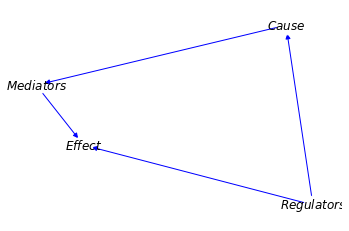

In [29]:
front_door_g = NxMixedGraph.from_edges(directed=[('Cause', 'Mediators'), ('Mediators', 'Effect'),('Regulators', 'Cause'), ('Regulators', 'Effect')])
front_door_g.draw()
                                       

In [30]:
soxS = front_door_genes['soxS'].dropna().drop_duplicates().reset_index().drop('index', axis=1)
HTML(soxS.to_html())

,Cause,Effect,Regulators,Mediators
0,b4062,b1431,b0889,b4396
1,b4062,b0820,b0889,b4396
2,b4062,b1224,b1334,b4396
3,b4062,b3555,b0889,b4396
4,b4062,b2344,b0889,b4396
5,b4062,b1748,b0889,b4396
6,b4062,b1415,b1334,b4396
7,b4062,b0167,b1334,b4396
8,b4062,b0167,b0683,b4396
9,b4062,b0762,b0889,b4396


## front door falsification

In [32]:
front_door_data = {}
front_door_issues = {}
for gene in front_door_genes:
    print(gene)
    issues[gene] = {}
    front_door_data[gene] = {}
    print(f"{len(front_door_genes[gene].index)} motifs with {gene}")

    for i in front_door_genes[gene].index:
        try:
            front_door_data[gene][i] = map_genes_to_nodes(front_door_genes[gene].loc[i], ecoli_ternary)
            issues[gene][i] = falsification.falsifications(front_door_g, front_door_data[gene][i], max_given=2, verbose=True)
        except KeyError:
            pass


d-separation check: 6it [00:00, 941.06it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 141.79it/s]
d-separation check: 6it [00:00, 835.91it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 132.59it/s]
d-separation check: 6it [00:00, 718.90it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 136.24it/s]
d-separation check: 6it [00:00, 727.53it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 125.67it/s]
d-separation check: 6it [00:00, 800.08it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 117.45it/s]
d-separation check: 6it [00:00, 755.39it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 117.12it/s]
d-separation check: 6it [00:00, 786.80it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 136.93it/s]
d-separation check: 0it [00:00, ?it/s]

yeiE
0 motifs with yeiE
purR
0 motifs with purR
yafC
0 motifs with yafC
oxyR
0 motifs with oxyR
ompR
111 motifs with ompR


d-separation check: 6it [00:00, 809.29it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 108.85it/s]
d-separation check: 6it [00:00, 680.27it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 141.91it/s]
d-separation check: 6it [00:00, 715.02it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 131.89it/s]
d-separation check: 6it [00:00, 746.10it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 125.08it/s]
d-separation check: 6it [00:00, 673.62it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 141.84it/s]
d-separation check: 6it [00:00, 790.73it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 131.63it/s]
d-separation check: 6it [00:00, 763.27it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 141.20it/s]
d-separation check: 6it [00:00, 795.10it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 145.77it/s]
d-separation check: 6it [00:00, 729.40it/s]
Checking conditionals: 100%|██████████| 1/1 

mntR
0 motifs with mntR
multi
1333 motifs with multi


d-separation check: 6it [00:00, 1156.25it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 170.80it/s]
d-separation check: 6it [00:00, 838.33it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 149.41it/s]
d-separation check: 6it [00:00, 725.16it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 158.65it/s]
d-separation check: 6it [00:00, 790.21it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 193.20it/s]
d-separation check: 6it [00:00, 695.17it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 158.65it/s]
d-separation check: 6it [00:00, 731.16it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 171.20it/s]
d-separation check: 6it [00:00, 817.66it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 183.97it/s]
d-separation check: 6it [00:00, 767.27it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 187.83it/s]
d-separation check: 0it [00:00, ?it/s]

cra
10 motifs with cra


d-separation check: 6it [00:00, 831.82it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 193.42it/s]
d-separation check: 6it [00:00, 712.51it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 191.64it/s]
d-separation check: 6it [00:00, 780.02it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 181.56it/s]
d-separation check: 6it [00:00, 755.96it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 149.79it/s]
d-separation check: 6it [00:00, 753.85it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 175.87it/s]
d-separation check: 6it [00:00, 810.81it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 158.15it/s]
d-separation check: 6it [00:00, 764.04it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 162.16it/s]
d-separation check: 6it [00:00, 817.13it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 163.11it/s]
d-separation check: 6it [00:00, 759.98it/s]
Checking conditionals: 100%|██████████| 1/1 

fabR
0 motifs with fabR
gadX
292 motifs with gadX


d-separation check: 6it [00:00, 759.98it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 169.75it/s]
d-separation check: 6it [00:00, 772.72it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 138.89it/s]
d-separation check: 6it [00:00, 709.56it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 169.72it/s]
d-separation check: 6it [00:00, 814.30it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 184.54it/s]
d-separation check: 6it [00:00, 805.02it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 115.17it/s]
d-separation check: 6it [00:00, 676.28it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 123.87it/s]
d-separation check: 6it [00:00, 668.13it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 106.36it/s]
d-separation check: 6it [00:00, 759.61it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 192.27it/s]
d-separation check: 6it [00:00, 545.36it/s]
Checking conditionals: 100%|██████████| 1/1 

decR
0 motifs with decR
gadW
55 motifs with gadW



d-separation check: 6it [00:00, 815.33it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 133.42it/s]
d-separation check: 6it [00:00, 621.12it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 139.34it/s]
d-separation check: 6it [00:00, 734.36it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 142.15it/s]
d-separation check: 6it [00:00, 706.29it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 121.77it/s]
d-separation check: 6it [00:00, 723.16it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 111.56it/s]
d-separation check: 6it [00:00, 813.35it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 133.08it/s]
d-separation check: 6it [00:00, 743.41it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 104.47it/s]
d-separation check: 6it [00:00, 688.80it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 140.94it/s]
d-separation check: 6it [00:00, 767.06it/s]
Checking conditionals: 100%|██████████| 1/1

ybaQ
0 motifs with ybaQ
entC
0 motifs with entC
cecR
0 motifs with cecR
fadR
0 motifs with fadR
yheO
0 motifs with yheO
yieP
0 motifs with yieP
crp
167 motifs with crp


Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 171.86it/s]
d-separation check: 6it [00:00, 784.20it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 182.85it/s]
d-separation check: 6it [00:00, 837.74it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 187.05it/s]
d-separation check: 6it [00:00, 763.64it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 195.44it/s]
d-separation check: 6it [00:00, 772.17it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 168.97it/s]
d-separation check: 6it [00:00, 728.41it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 191.76it/s]
d-separation check: 6it [00:00, 745.72it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 180.63it/s]
d-separation check: 6it [00:00, 762.18it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 189.15it/s]
d-separation check: 6it [00:00, 817.68it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 177.06it/s]
d-separation check

cbl
0 motifs with cbl
nac
194 motifs with nac


Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 200.92it/s]
d-separation check: 6it [00:00, 826.11it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 188.33it/s]
d-separation check: 6it [00:00, 657.60it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 184.36it/s]
d-separation check: 6it [00:00, 753.02it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 173.52it/s]
d-separation check: 6it [00:00, 772.29it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 194.89it/s]
d-separation check: 6it [00:00, 730.46it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 182.28it/s]
d-separation check: 6it [00:00, 812.27it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 162.47it/s]
d-separation check: 6it [00:00, 682.22it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 191.42it/s]
d-separation check: 6it [00:00, 760.07it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 154.47it/s]
d-separation check

yddM
0 motifs with yddM
fur
255 motifs with fur


Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 209.89it/s]
d-separation check: 6it [00:00, 796.92it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 184.80it/s]
d-separation check: 6it [00:00, 665.25it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 199.97it/s]
d-separation check: 6it [00:00, 745.79it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 157.26it/s]
d-separation check: 6it [00:00, 727.36it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 192.20it/s]
d-separation check: 6it [00:00, 834.72it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 162.39it/s]
d-separation check: 6it [00:00, 642.61it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 185.42it/s]
d-separation check: 6it [00:00, 765.38it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 177.59it/s]
d-separation check: 6it [00:00, 714.80it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 164.50it/s]
d-separation check

soxS
113 motifs with soxS


d-separation check: 6it [00:00, 820.43it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 146.86it/s]
d-separation check: 6it [00:00, 747.20it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 142.51it/s]
d-separation check: 6it [00:00, 828.70it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 120.53it/s]
d-separation check: 6it [00:00, 761.63it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 143.29it/s]
d-separation check: 6it [00:00, 771.79it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 114.20it/s]
d-separation check: 6it [00:00, 769.95it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 134.23it/s]
d-separation check: 6it [00:00, 741.85it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 148.33it/s]
d-separation check: 6it [00:00, 857.64it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 138.68it/s]
d-separation check: 6it [00:00, 712.23it/s]
Checking conditionals: 100%|██████████| 1/1 

gadE
171 motifs with gadE


d-separation check: 6it [00:00, 715.04it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 109.41it/s]
d-separation check: 6it [00:00, 466.63it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 100.13it/s]
d-separation check: 6it [00:00, 487.02it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 88.49it/s]
d-separation check: 6it [00:00, 540.10it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 149.79it/s]
d-separation check: 6it [00:00, 558.03it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 117.39it/s]
d-separation check: 6it [00:00, 548.41it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 161.42it/s]
d-separation check: 6it [00:00, 788.85it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 158.15it/s]
d-separation check: 6it [00:00, 770.80it/s]
Checking conditionals: 100%|██████████| 1/1 [00:00<00:00, 182.19it/s]
d-separation check: 6it [00:00, 686.90it/s]
Checking conditionals: 100%|██████████| 1/1 [

plaR
0 motifs with plaR
menF
0 motifs with menF
soxR
0 motifs with soxR
ydcI
0 motifs with ydcI
pgi
0 motifs with pgi


In [35]:
front_door_falsified = {}
front_door_total = {}
for gene in front_door_genes:
    front_door_falsified[gene] = falsify_motif( front_door_genes[gene], issues[gene] )
    front_door_total[gene] = len(front_door_genes[gene].index)
    if front_door_total[gene] > 0:
        print(f"{gene}: {front_door_falsified[gene]} falsified out of {front_door_total[gene]}: {front_door_falsified[gene]/front_door_total[gene]*100:0.1f}%")

ompR: 10 falsified out of 111: 9.0%
multi: 0 falsified out of 1333: 0.0%
cra: 10 falsified out of 10: 100.0%
gadX: 39 falsified out of 292: 13.4%
gadW: 8 falsified out of 55: 14.5%
crp: 20 falsified out of 167: 12.0%
nac: 16 falsified out of 194: 8.2%
fur: 21 falsified out of 255: 8.2%
soxS: 24 falsified out of 113: 21.2%
gadE: 43 falsified out of 171: 25.1%


In [ ]:
for i in issues:
    display( soxS.loc[i].to_frame())
    display(issues[i].evidence)